In [1]:
import matplotlib
matplotlib.use('Agg')

import numpy as np
import collections
from os.path import expanduser
from tqdm import tqdm
import csv

from scipy.stats import sem
from scipy.stats import pearsonr

# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

plt.style.use('deepretina')

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

/home/lane/.local/lib/python3.5/site-packages/matplotlib-2.0.0-py3.5-linux-x86_64.egg/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/lane/.local/lib/python3.5/site-packages/matplotlib-2.0.0-py3.5-linux-x86_64.egg/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")
/home/lane/.local/lib/python3.5/site-packages/matplotlib-2.0.0-py3.5-linux-x86_64.egg/matplotlib/style/core.py:53: UserWarning: Style includes a parameter, 'interactive', that is not related to style.  Ignoring
  "to style.  Ignoring".format(key))
/home/lane/.local/lib/python3.5/site-packages/matplotlib-2.0.0-py3.5-linux-x86_64.egg/matplotlib/style/core.py:53: UserWarning: Style includes a parameter, 'timezone', that is not related to style.  Ignoring
  "to style.  Ignoring".format(key))


In [2]:
data_path = expanduser('~/data/katie/')
control_name = '010917_control_normalized.csv'
experimental_name = '010917_experimental_normalized.csv'

In [3]:
# control_list = []
# with open(data_path + control_name, 'rb') as controlfile:
#     control_reader = csv.reader(controlfile)
#     for row in control_reader:
#         control_list.append(row)

In [4]:
controlfile = open(data_path + control_name, 'r')
control_reader = csv.reader(controlfile)

In [5]:
control_list = collections.defaultdict(list)
labels = []
for idl,line in enumerate(control_reader):
    if idl == 0:
        for l in line:
            labels.append(l)
    else:
        if line[0] != '':
            print(line[0])
            for idi,l in enumerate(line):
                if l == '':
                    control_list[labels[idi]].append(np.nan)
                elif idi > 0:
                    control_list[labels[idi]].append(float(l))
                elif idi == 0:
                    control_list[labels[idi]].append(l)

1
2
3
4
5
6
7
6.1
7.1
6.2
7.2
6.3
7.3
6.4
7.4
6.5
7.5
6.6
7.6
6.7
7.7
6.8
7.8
6.9
7.9
6.10
7.10
6.11
7.11
6.12
7.12
6.13
7.13
6.14
7.14
6.15
7.15
6.16
7.16
6.17
7.17
6.18
7.18
6.19
7.19
6.20
7.20
6.21
7.21
6.22
7.22
6.23
7.23
6.24
7.24
6.25
7.25


In [6]:
for m in control_list['Mouse']:
    # mouse id x day
    this_split = m.split('.')
    control_list['mouse_id'] = this_split[0]

In [7]:
variables = [k for k in control_list.keys() if k not in ['mouse_id', 'Mouse', 'DPI', 'Infected (1/0)',
                                                        'Parasitemia', 'Parasite Density', 'Accuri', 'Cells',
                                                        'palmitoyl-arachidonoyl-glycerol (16:0/20:4) [2]*',
                                                        'palmitoyl-linoleoyl-glycerol (16:0/18:2) [1]*']]

In [8]:
variables

['sphingomyelin (d18:1/20:1, d18:2/20:0)*',
 'phenylpyruvate',
 'IL-12P70',
 'caffeic acid sulfate',
 'myristate (14:0)',
 '1-palmitoleoyl-GPC (16:1)*',
 '7-alpha-hydroxy-3-oxo-4-cholestenoate (7-Hoca)',
 'eicosapentaenoate (EPA; 20:5n3)',
 '2-hydroxyoctanoate',
 'perfluorooctanesulfonic acid (PFOS)',
 '3-(4-hydroxyphenyl)lactate',
 'pantothenate',
 '4-hydroxyphenylpyruvate',
 'hexanoylcarnitine (C6)',
 'IL-1b',
 'palmitoyl-linoleoyl-glycerol (16:0/18:2) [2]*',
 'IL-10',
 'gamma-glutamylglycine',
 'N6-carboxymethyllysine',
 '4-methylcatechol sulfate',
 'linoleoyl-linolenoyl-glycerol (18:2/18:3) [1]*',
 'diacylglycerol (16:1/18:2 [2], 16:0/18:3 [1])*',
 '3-methylhistidine',
 '10-undecenoate (11:1n1)',
 '3-hydroxyoctanoate',
 'oleoyl-arachidonoyl-glycerol (18:1/20:4) [2]*',
 'laurylcarnitine (C12)',
 '1-oleoyl-GPC (18:1)',
 'daidzein',
 'trimethylamine N-oxide',
 '1-methylhistidine',
 '2-hydroxystearate',
 'orotate',
 '3-hydroxybutyrylcarnitine (2)',
 'histidine',
 'N-acetyl-aspartyl-glu

In [9]:
control_list[variables[6]]

[1.7854,
 0.646,
 2.6538,
 0.8116,
 1.1929,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.8824,
 0.8089,
 nan,
 nan,
 nan,
 nan,
 0.98,
 0.9241,
 nan,
 nan,
 0.914,
 2.5727,
 nan,
 nan,
 0.9591,
 0.7285,
 nan,
 nan,
 nan,
 nan,
 0.8897,
 1.2277,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 2.624,
 1.1847,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 1.997,
 0.9774]

In [10]:
time = control_list['DPI']

In [11]:
from aesthetics import plotting

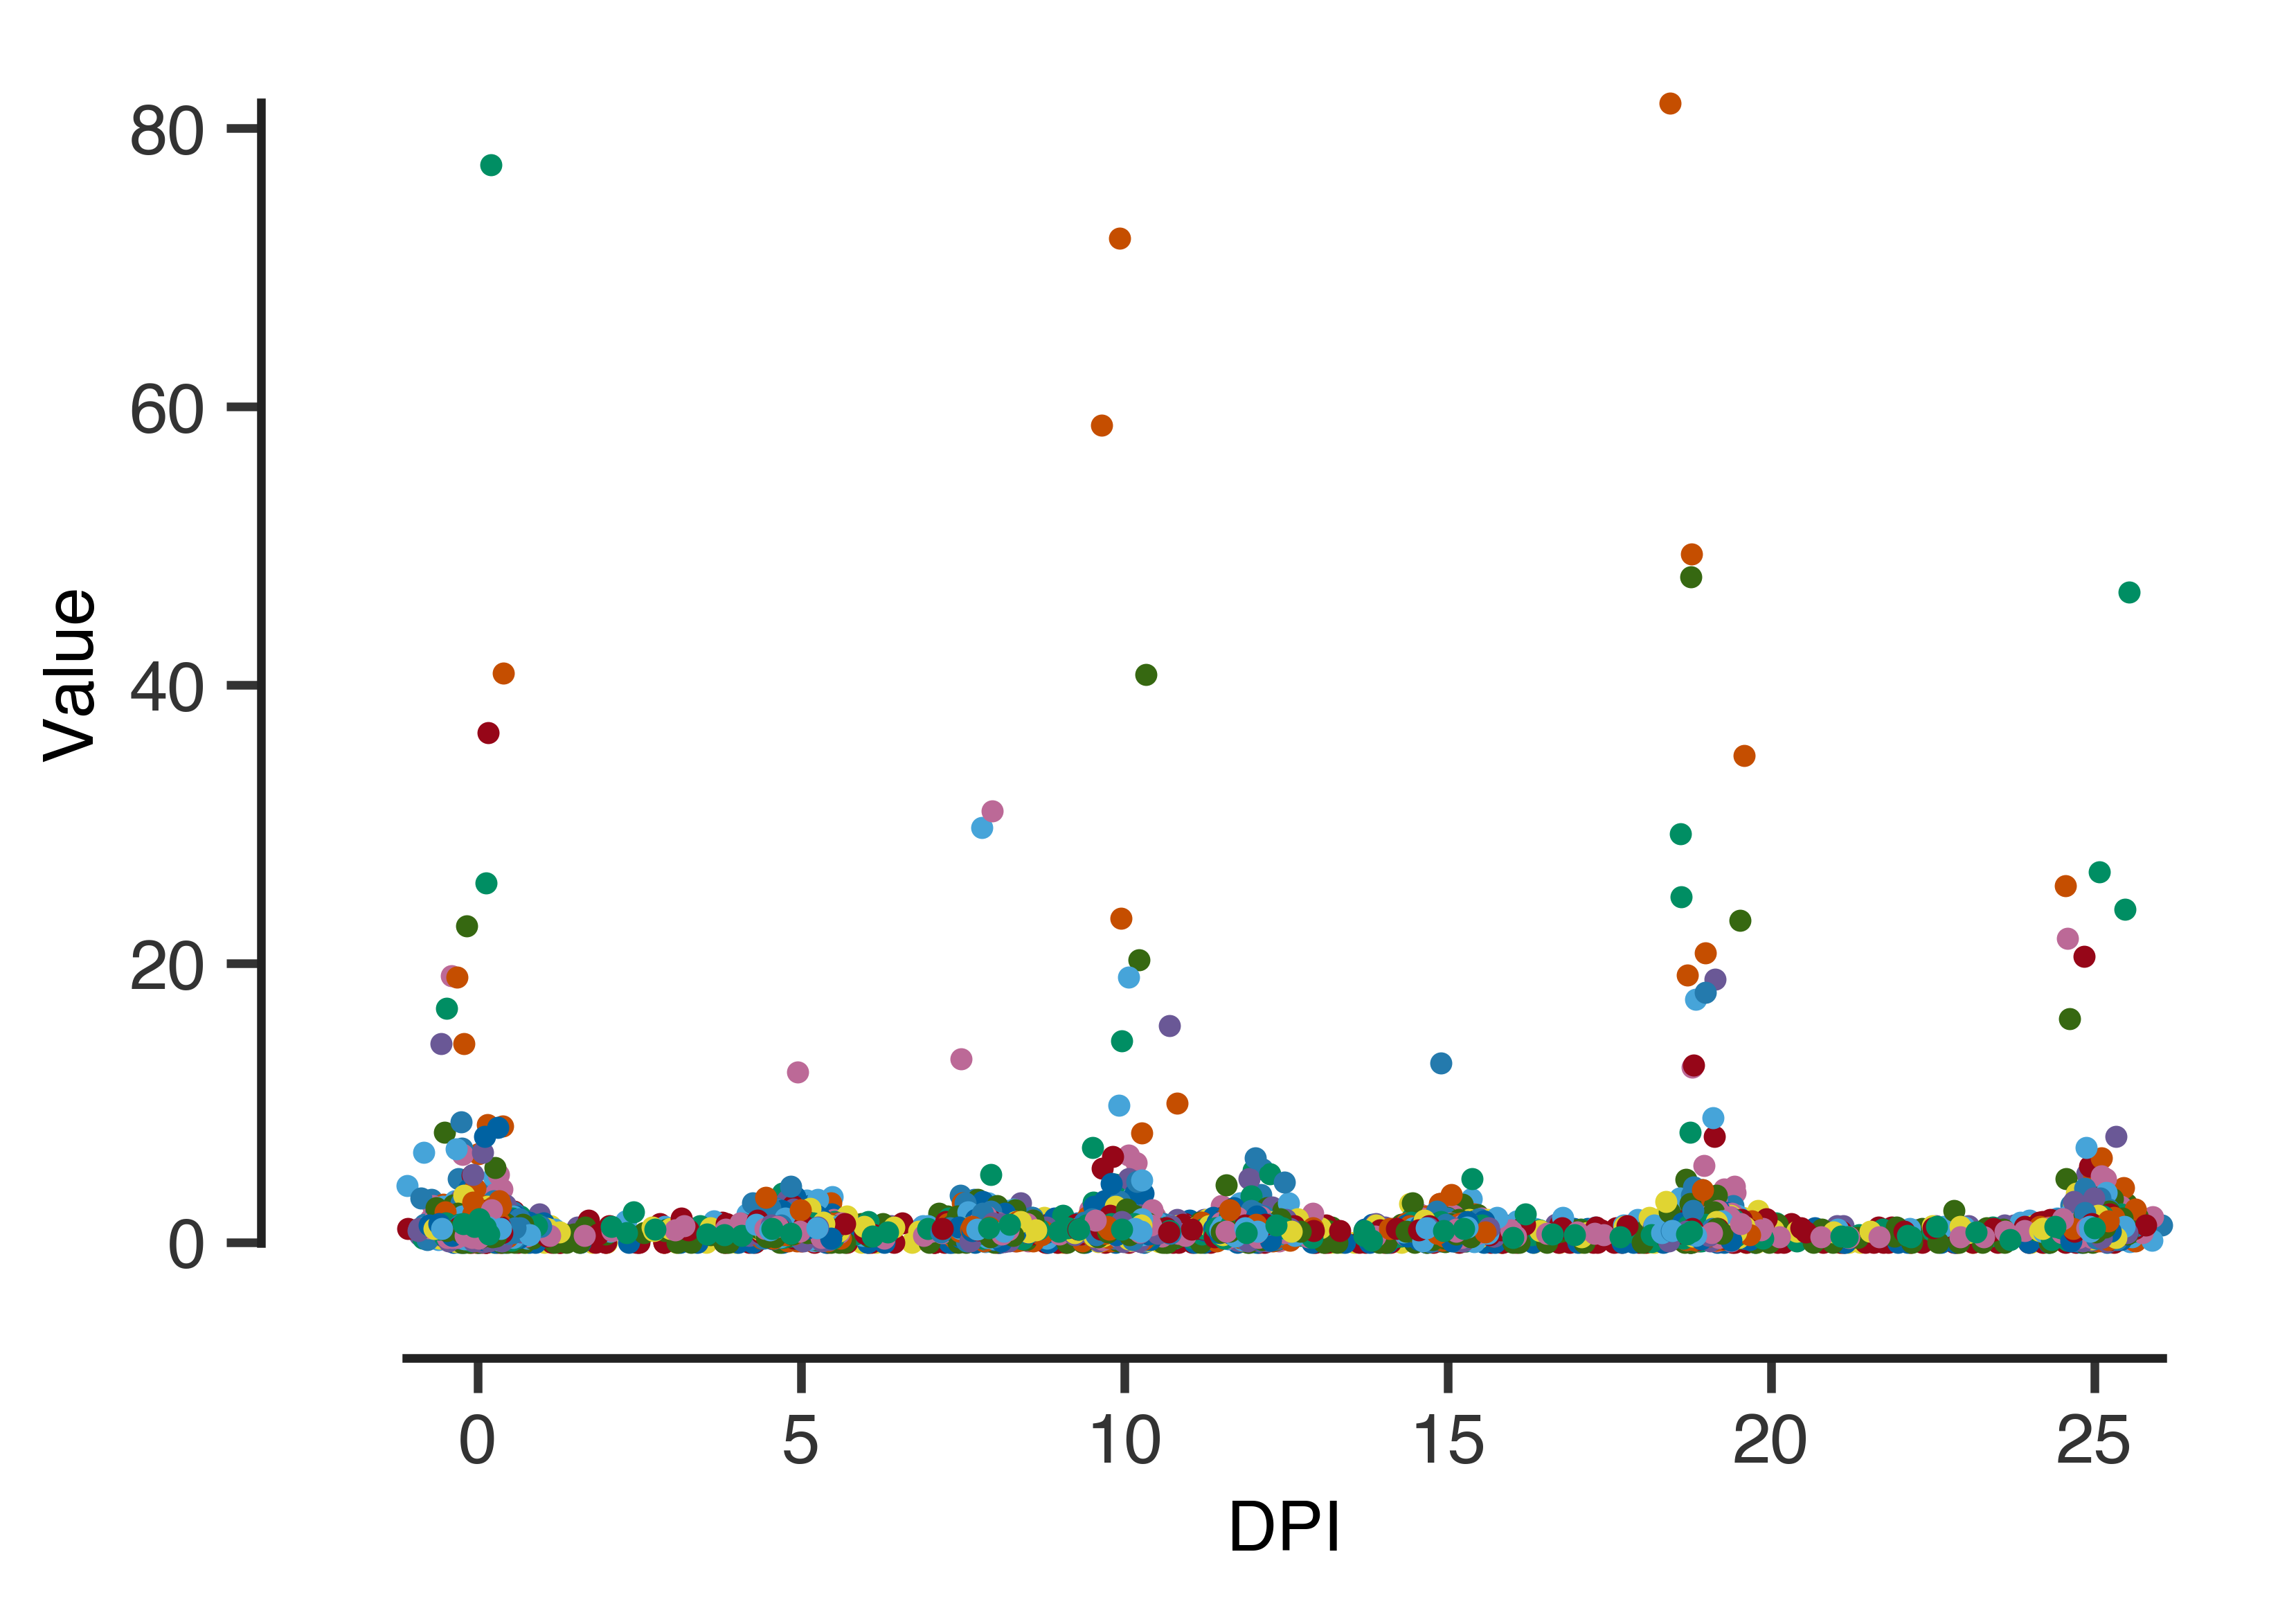

In [12]:
size = 8
for v in variables:
    plt.scatter(time+0.3*np.random.randn(len(control_list[v])), control_list[v], s=size)
    
# plt.scatter(time, control_list[variables[2]], s=size)
# plt.scatter(time, control_list[variables[6]], s=size)
plt.xlabel('DPI')
plt.ylabel('Value')
plotting.adjust_spines(plt.gca())

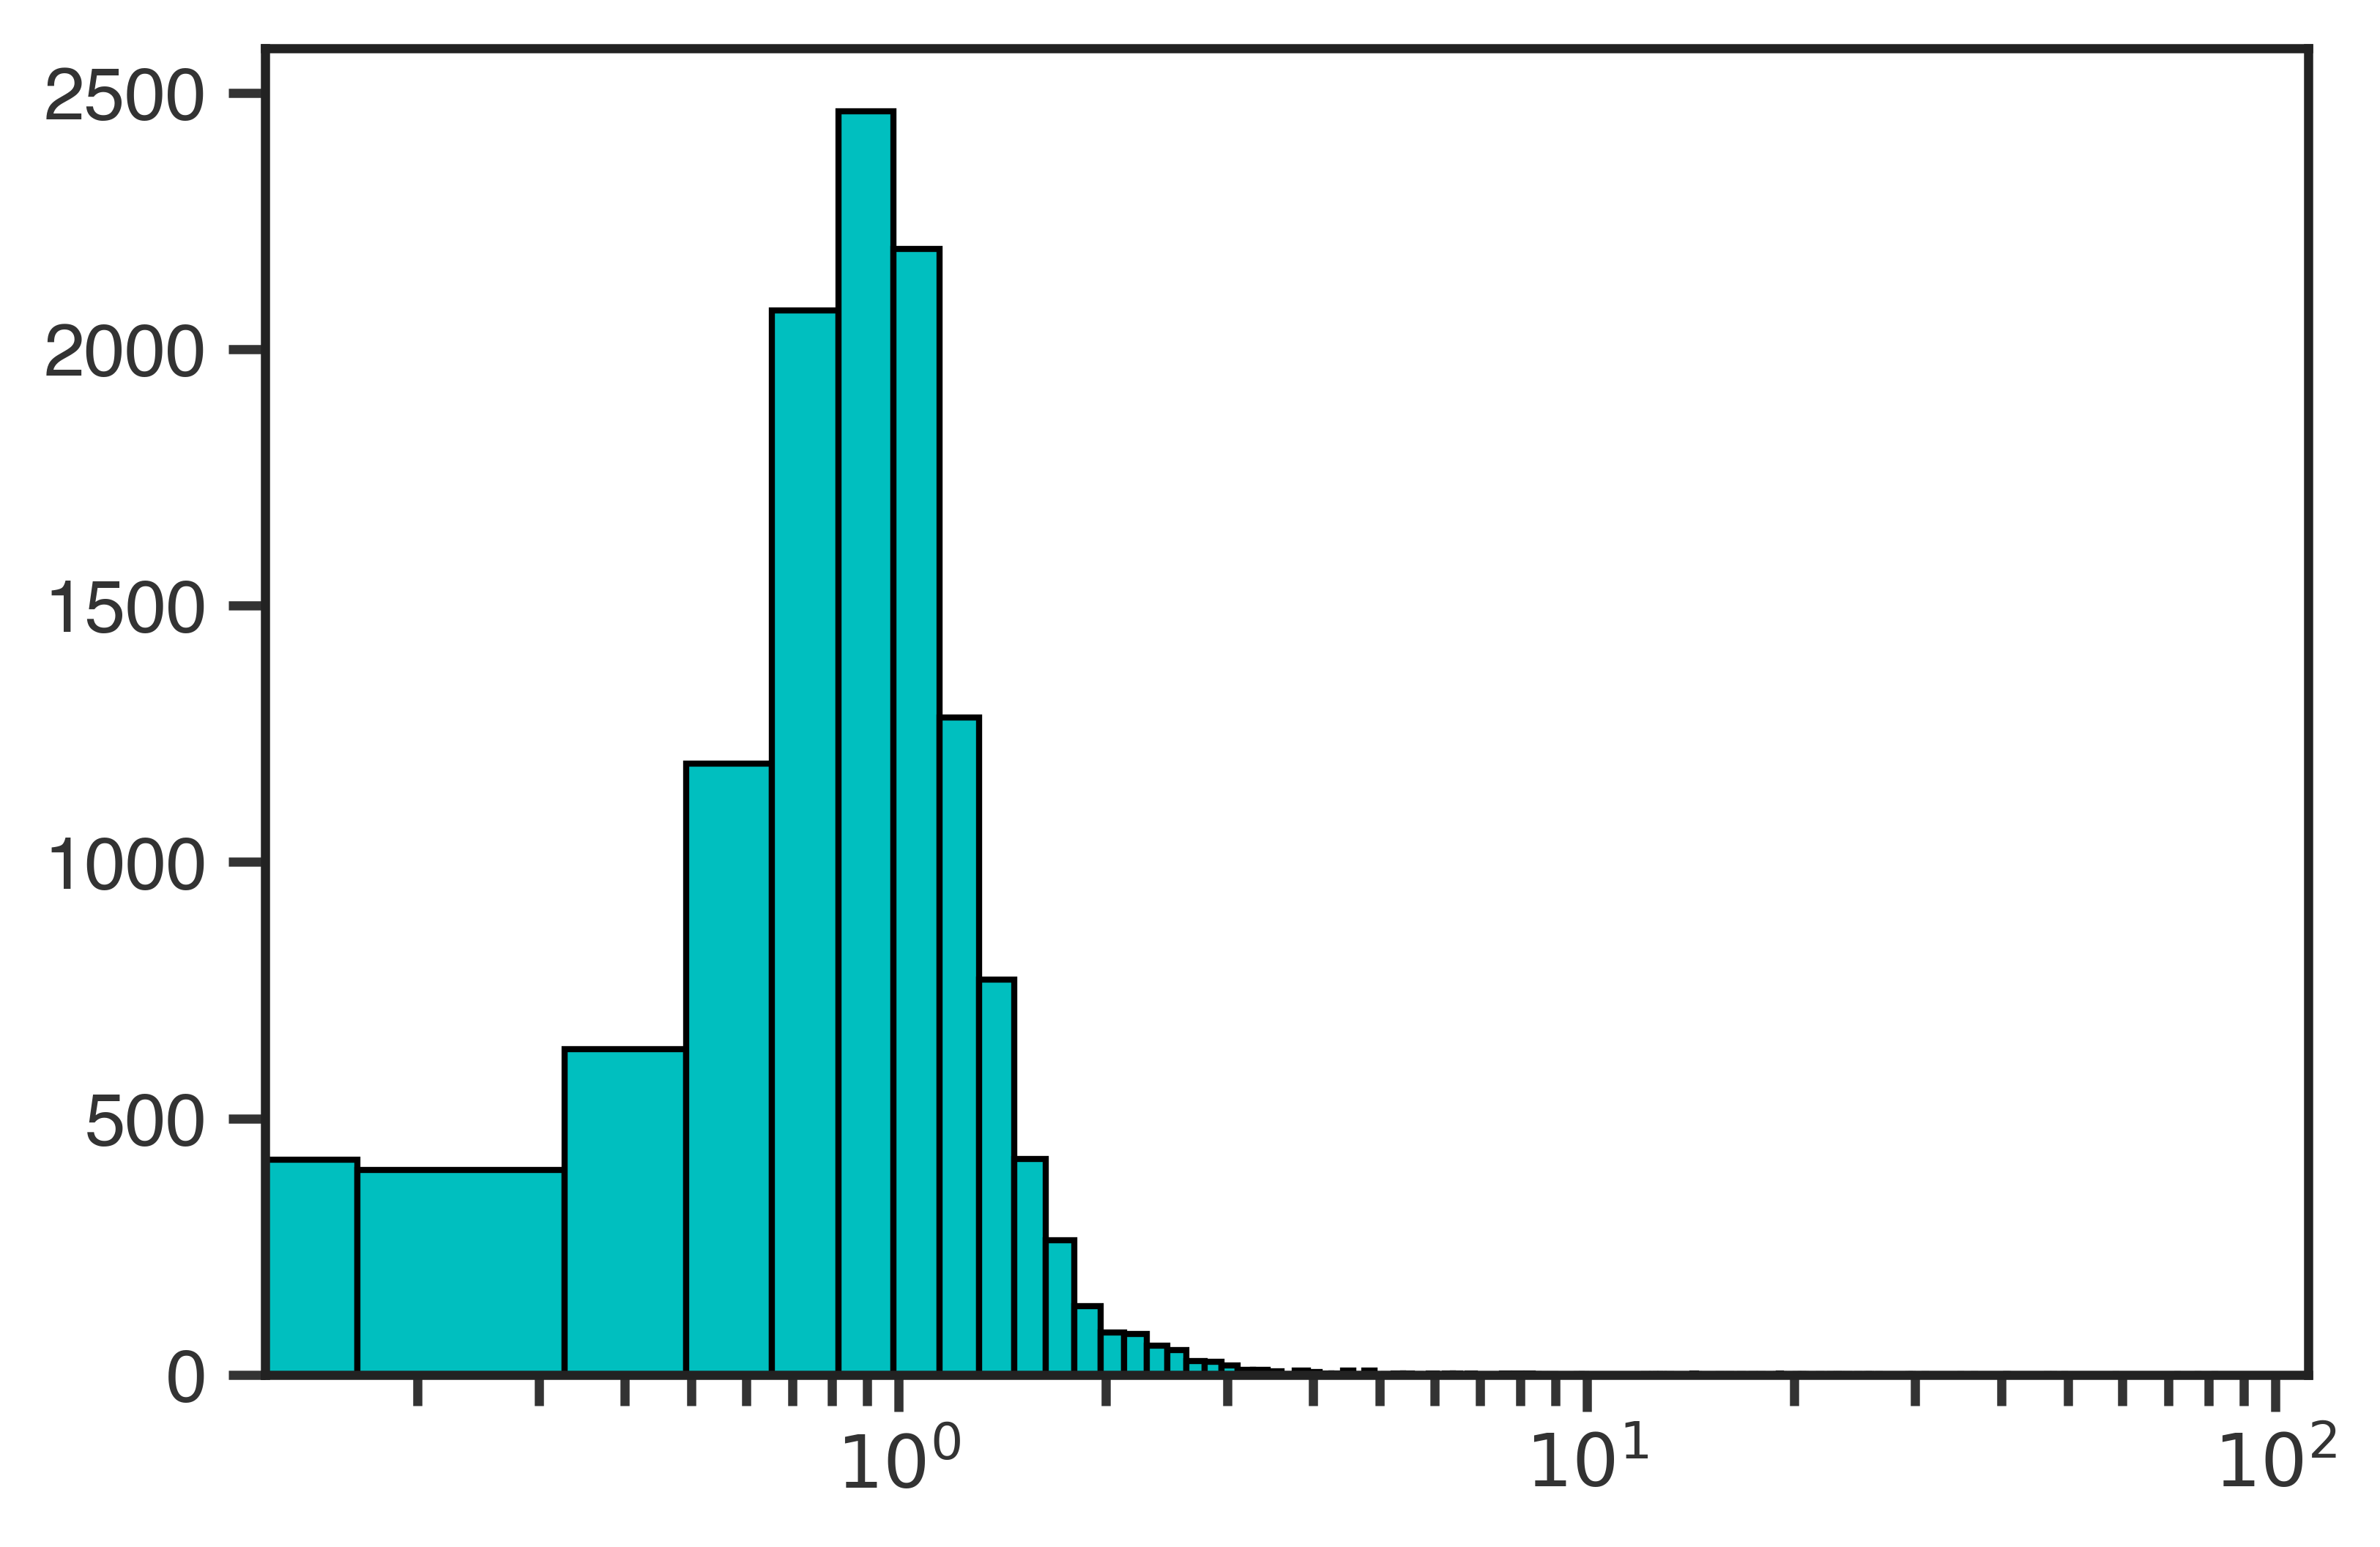

In [13]:
all_control_values = np.array([control_list[v] for v in variables]).flatten()
all_control_values = all_control_values[~np.isnan(all_control_values)]
count, bins = np.histogram(all_control_values, bins=500)
bin_width = np.mean(np.diff(bins))
plt.bar(bins[:-1] + bin_width/2.0, count, width=bin_width, color='c', edgecolor='k')
plt.xscale('log')

In [14]:
control_means = collections.defaultdict(list)
control_std = collections.defaultdict(list)
control_variance = collections.defaultdict(list)
for v in variables:
    control_means[v] = np.nanmean(control_list[v])
    control_std[v] = np.nanstd(control_list[v])
    control_variance[v] = np.nanvar(control_list[v])

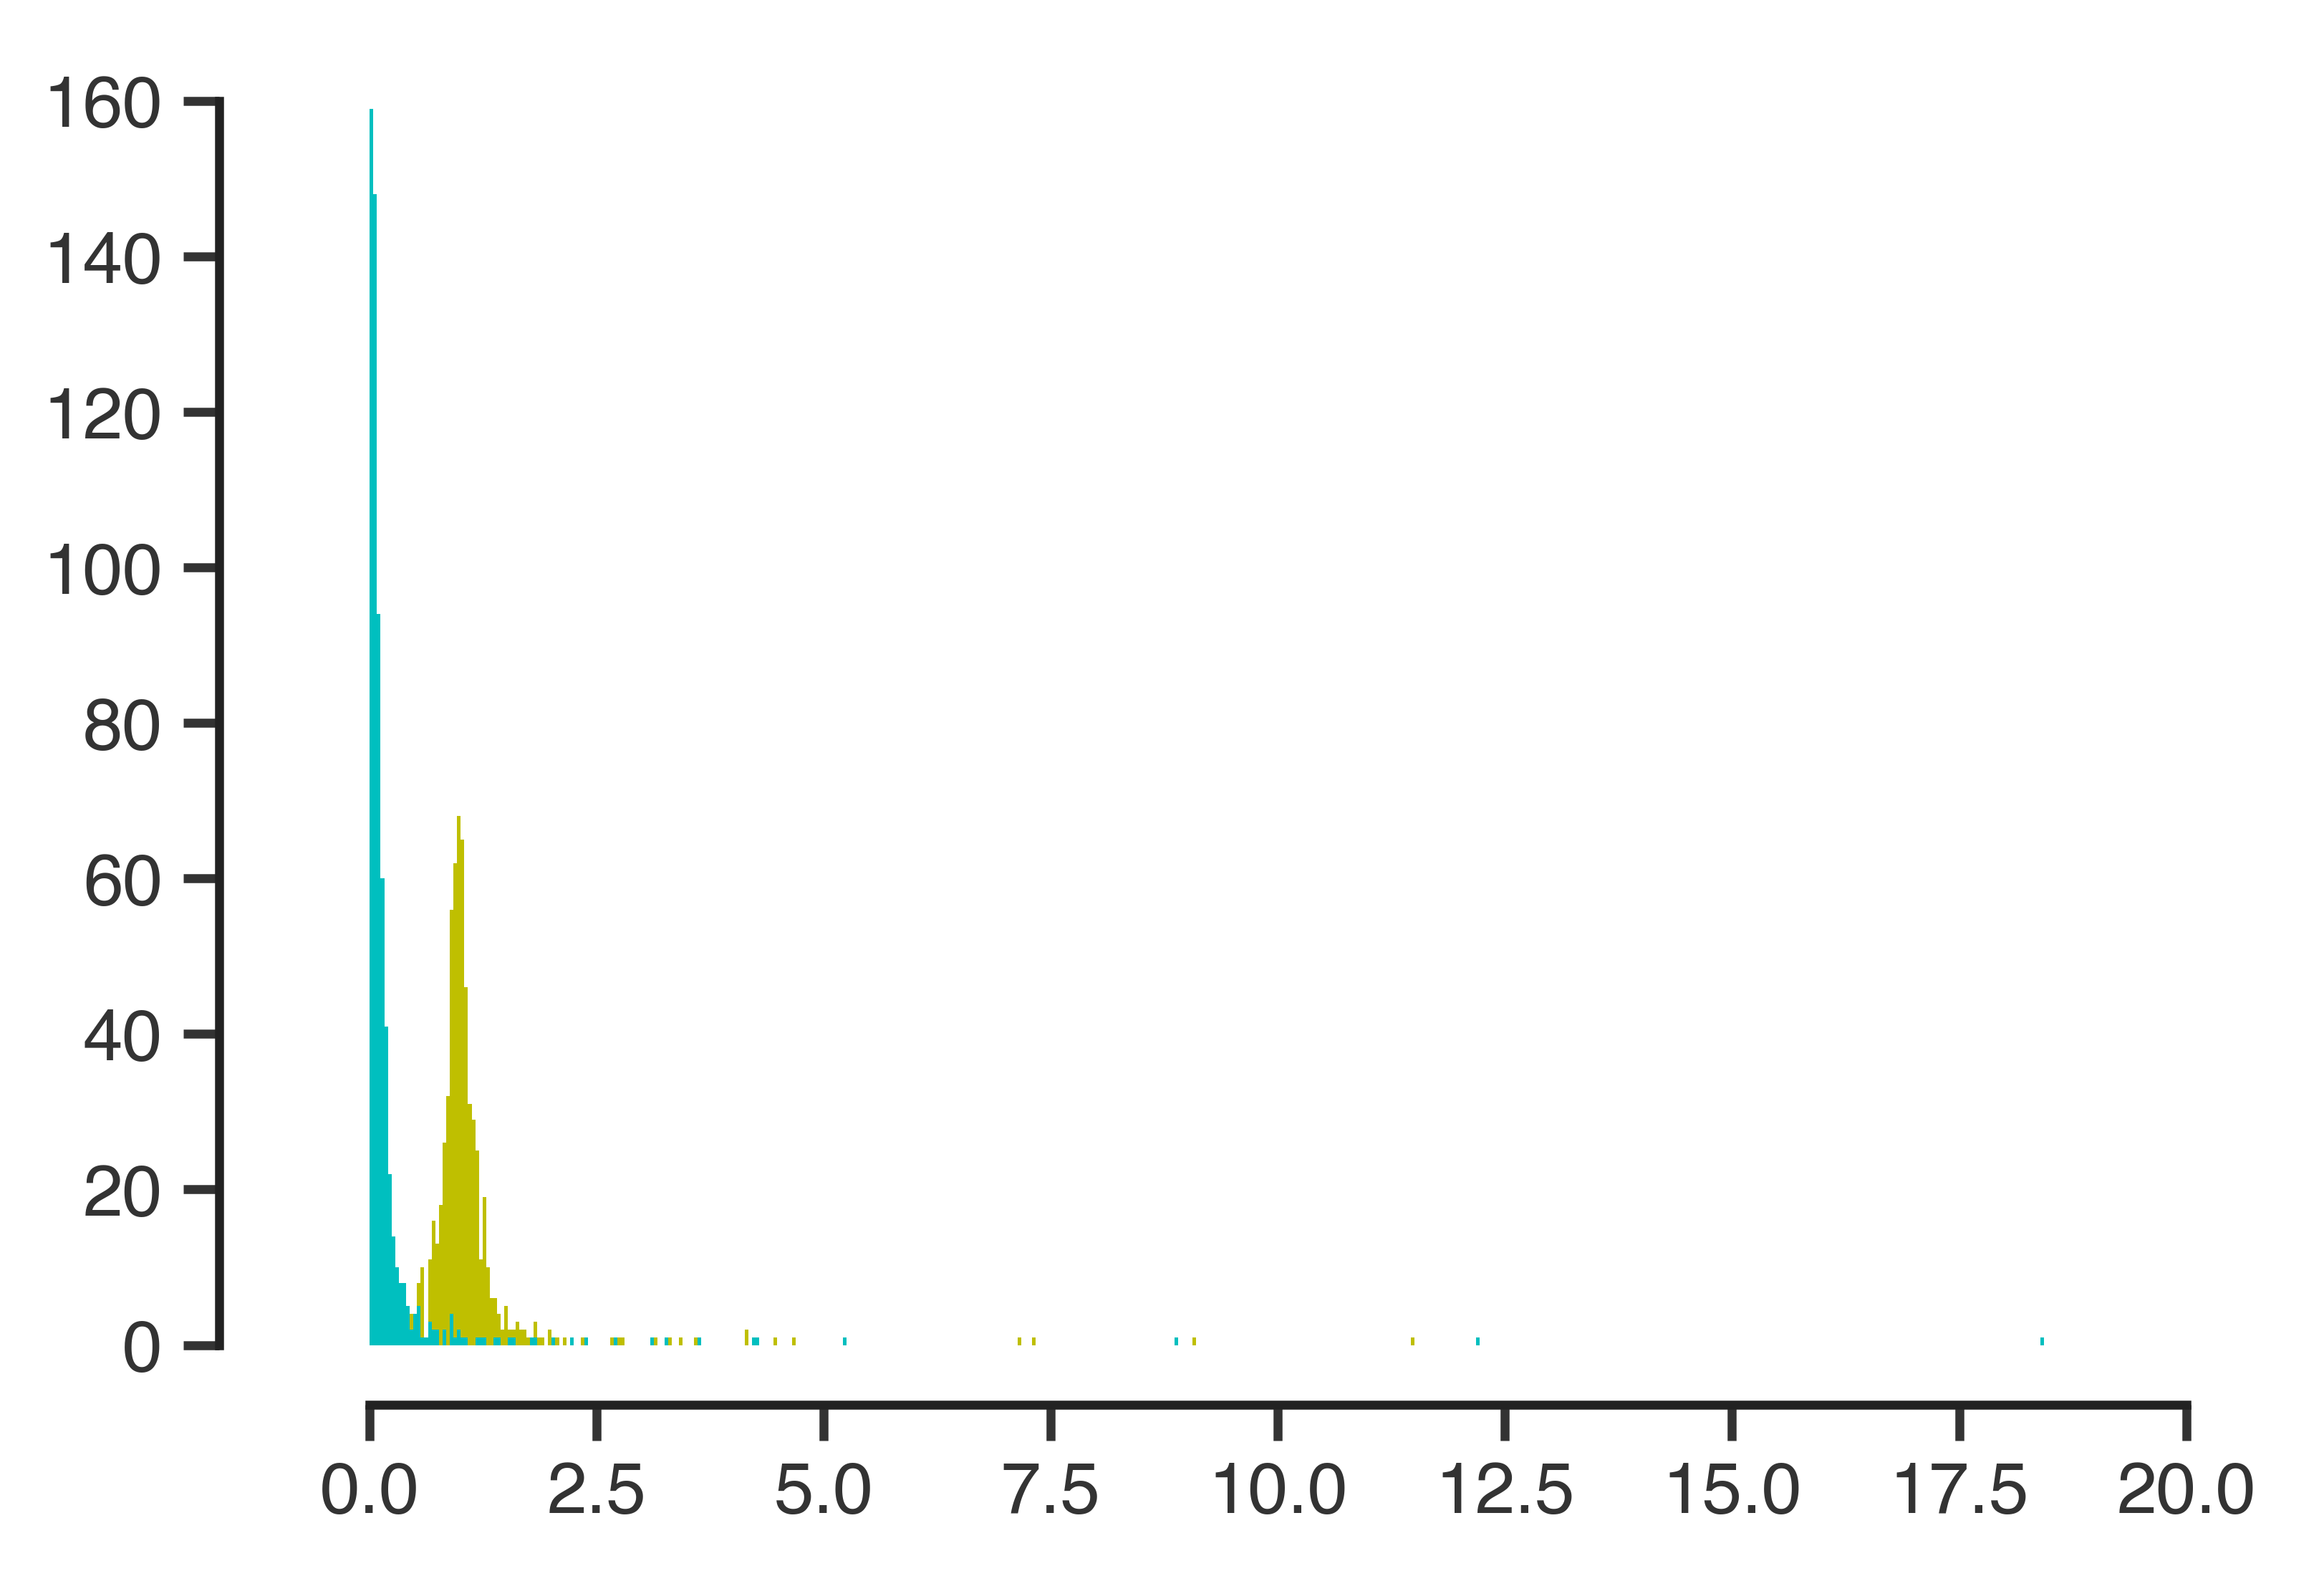

In [15]:
all_control_means = np.array([control_means[v] for v in variables]).flatten()
all_control_variances = np.array([control_variance[v] for v in variables]).flatten()

bins = np.linspace(0,20,500)
bin_width = np.mean(np.diff(bins))

count_means, bins = np.histogram(all_control_means, bins=bins)
count_variances, bins = np.histogram(all_control_variances, bins=bins)

plt.bar(bins[:-1] + bin_width/2.0, count_means, width=bin_width, color='y')
plt.bar(bins[:-1] + bin_width/2.0, count_variances, width=bin_width, color='c')
# plt.xscale('log')
plotting.adjust_spines(plt.gca())

In [16]:
np.min(all_control_variances)

0.0

In [17]:
for v in variables:
    if control_variance[v] == 0.0:
        print(v)

Direct Bilirubin
cerotoylcarnitine (C26)*
lactosyl-N-palmitoyl-sphingosine (d18:1/16:0)
GGT


### Modify variables to include variables that have zero variance

In [18]:
variables = [k for k in control_list.keys() if k not in ['mouse_id', 'Mouse', 'DPI', 'Infected (1/0)',
                                                        'Parasitemia', 'Parasite Density', 'Accuri', 'Cells',
                                                        'palmitoyl-arachidonoyl-glycerol (16:0/20:4) [2]*',
                                                        'palmitoyl-linoleoyl-glycerol (16:0/18:2) [1]*',
                                                        'Direct Bilirubin', 
                                                         'lactosyl-N-palmitoyl-sphingosine (d18:1/16:0)',
                                                         'cerotoylcarnitine (C26)*', 'GGT']]

# Z-score these babies

In [19]:
from scipy.stats import zscore

In [20]:
normalized_control = collections.defaultdict(list)
for v in variables:
    normalized_control[v] = (control_list[v] - np.nanmean(control_list[v]))/np.nanstd(control_list[v])

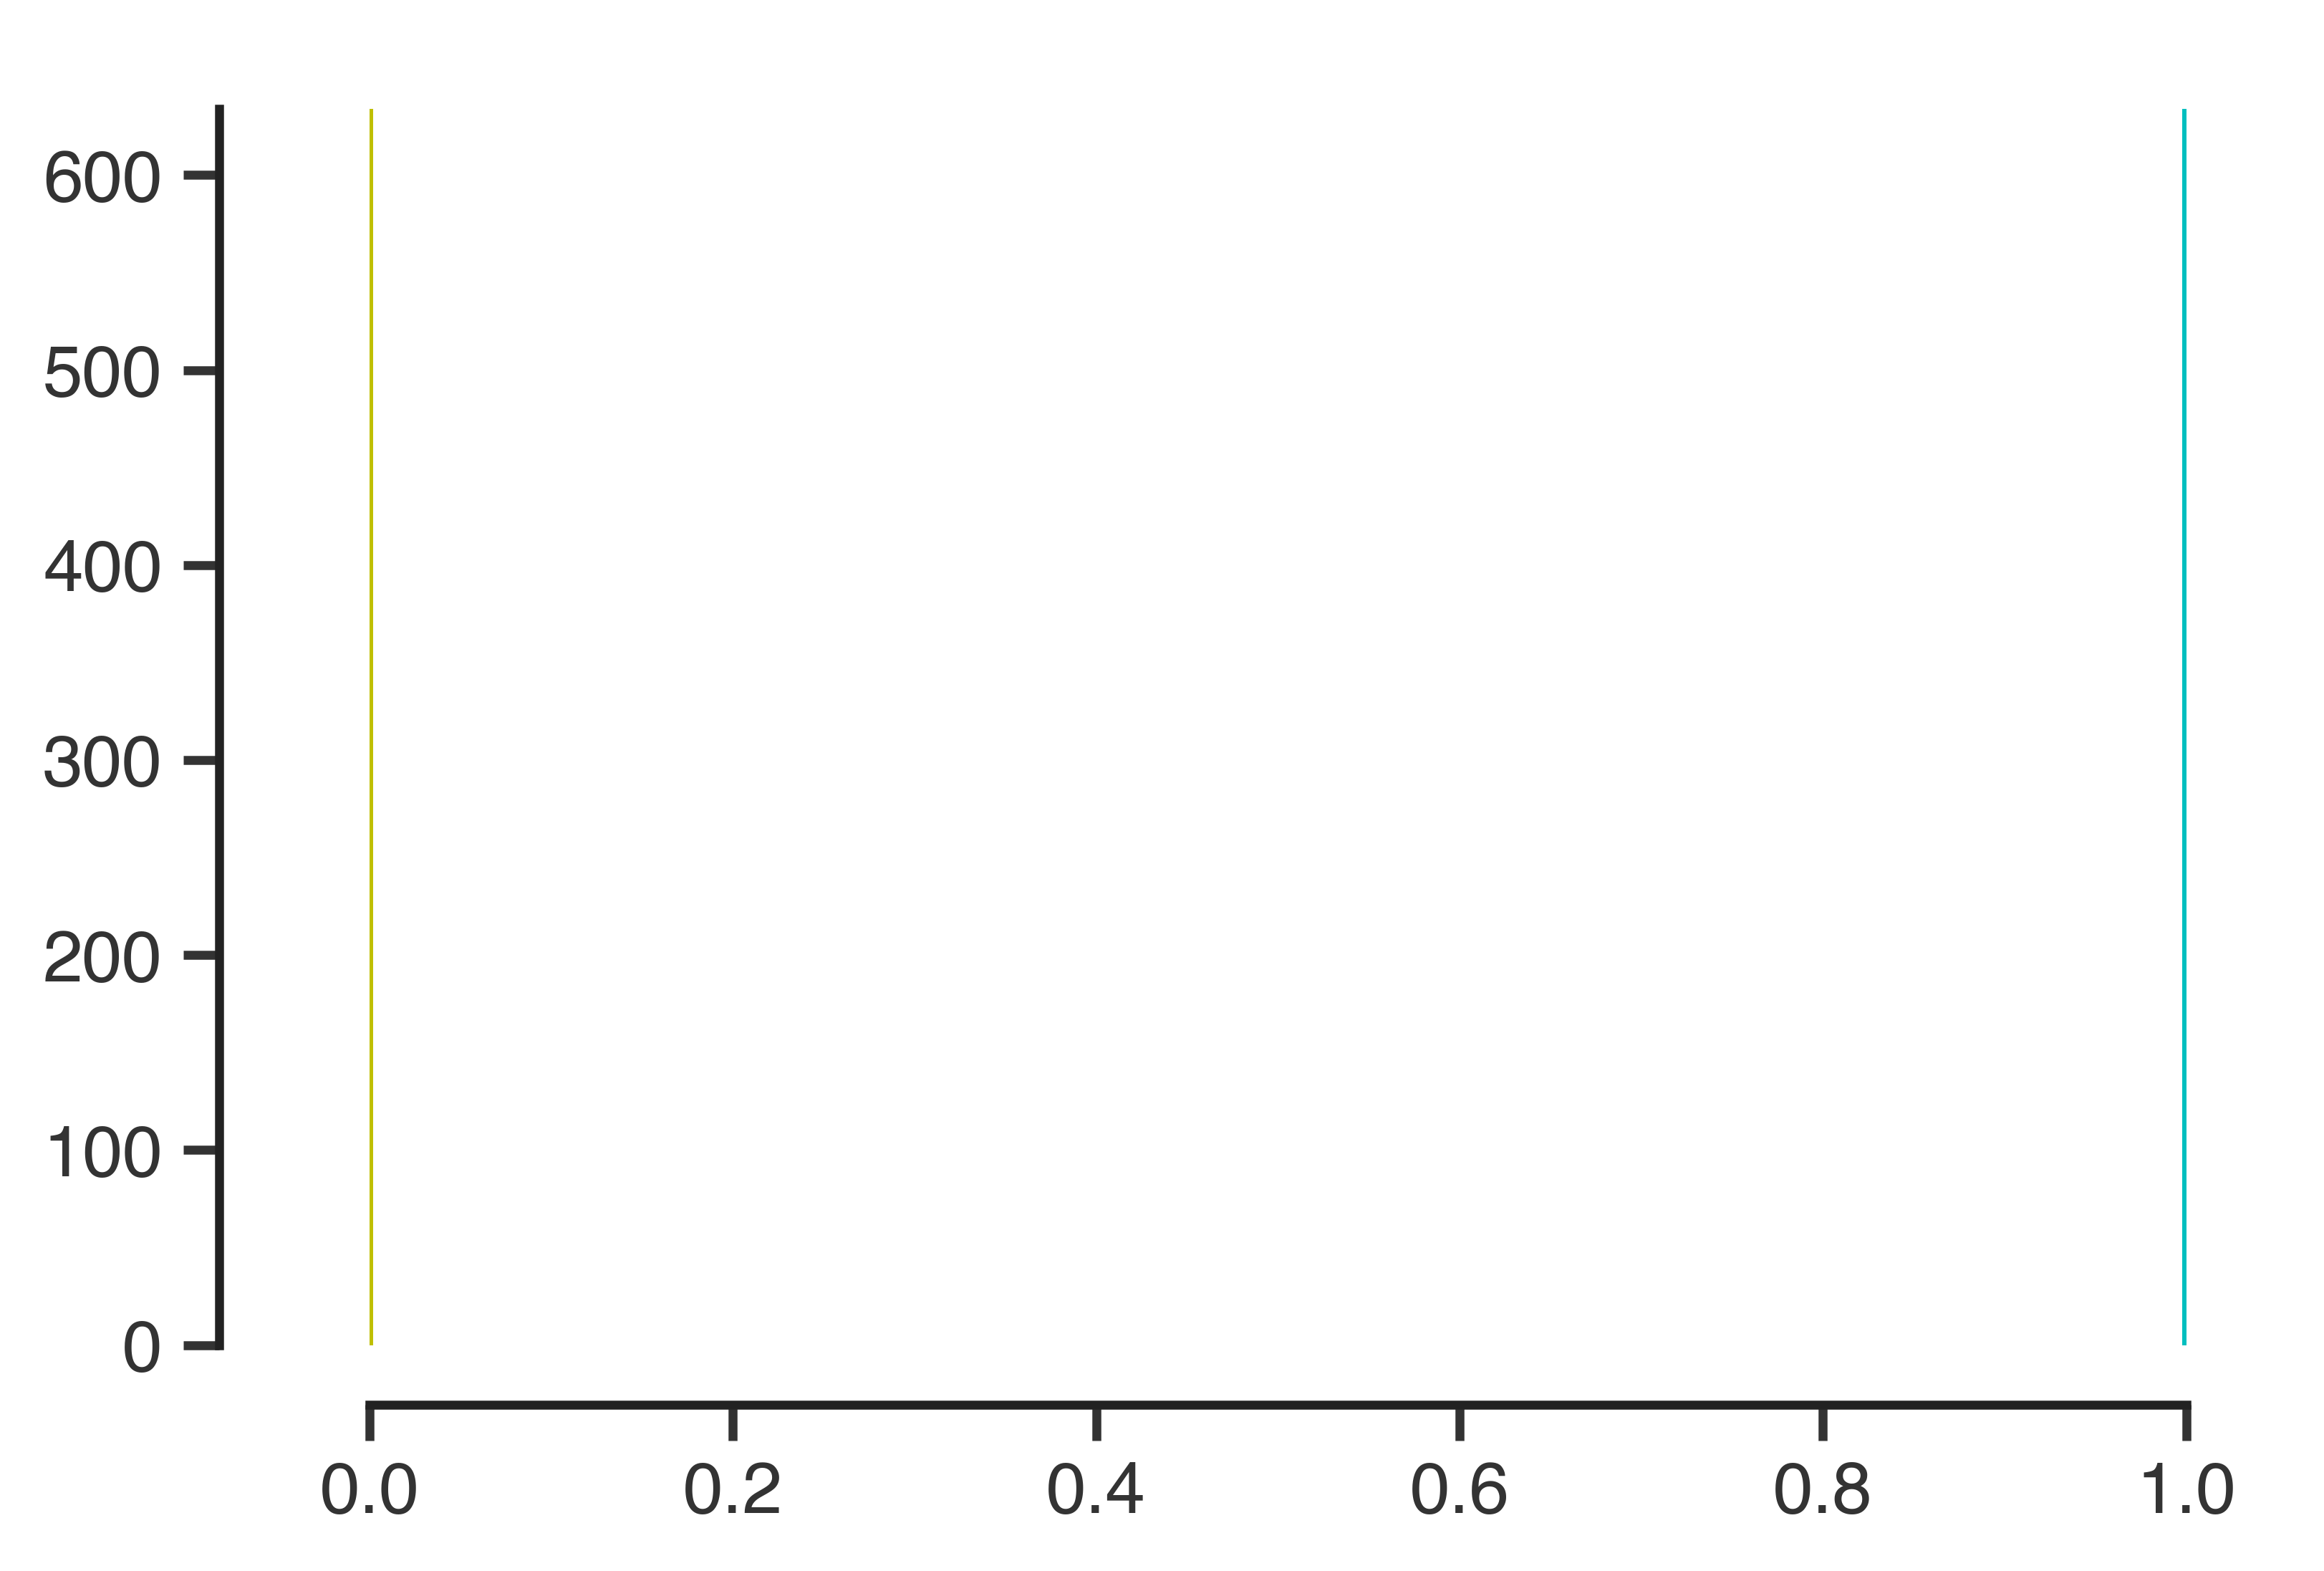

In [21]:
all_control_means = np.array([np.nanmean(normalized_control[v]) for v in variables]).flatten()
all_control_variances = np.array([np.nanvar(normalized_control[v]) for v in variables]).flatten()

bins = np.linspace(min([min(all_control_means), min(all_control_variances)]),
                   max([max(all_control_means), max(all_control_variances)]),500)

bin_width = np.mean(np.diff(bins))

count_means, bins = np.histogram(all_control_means, bins=bins)
count_variances, bins = np.histogram(all_control_variances, bins=bins)

plt.bar(bins[:-1] + bin_width/2.0, count_means, width=bin_width, color='y')
plt.bar(bins[:-1] + bin_width/2.0, count_variances, width=bin_width, color='c')
# plt.xscale('log')
plotting.adjust_spines(plt.gca())

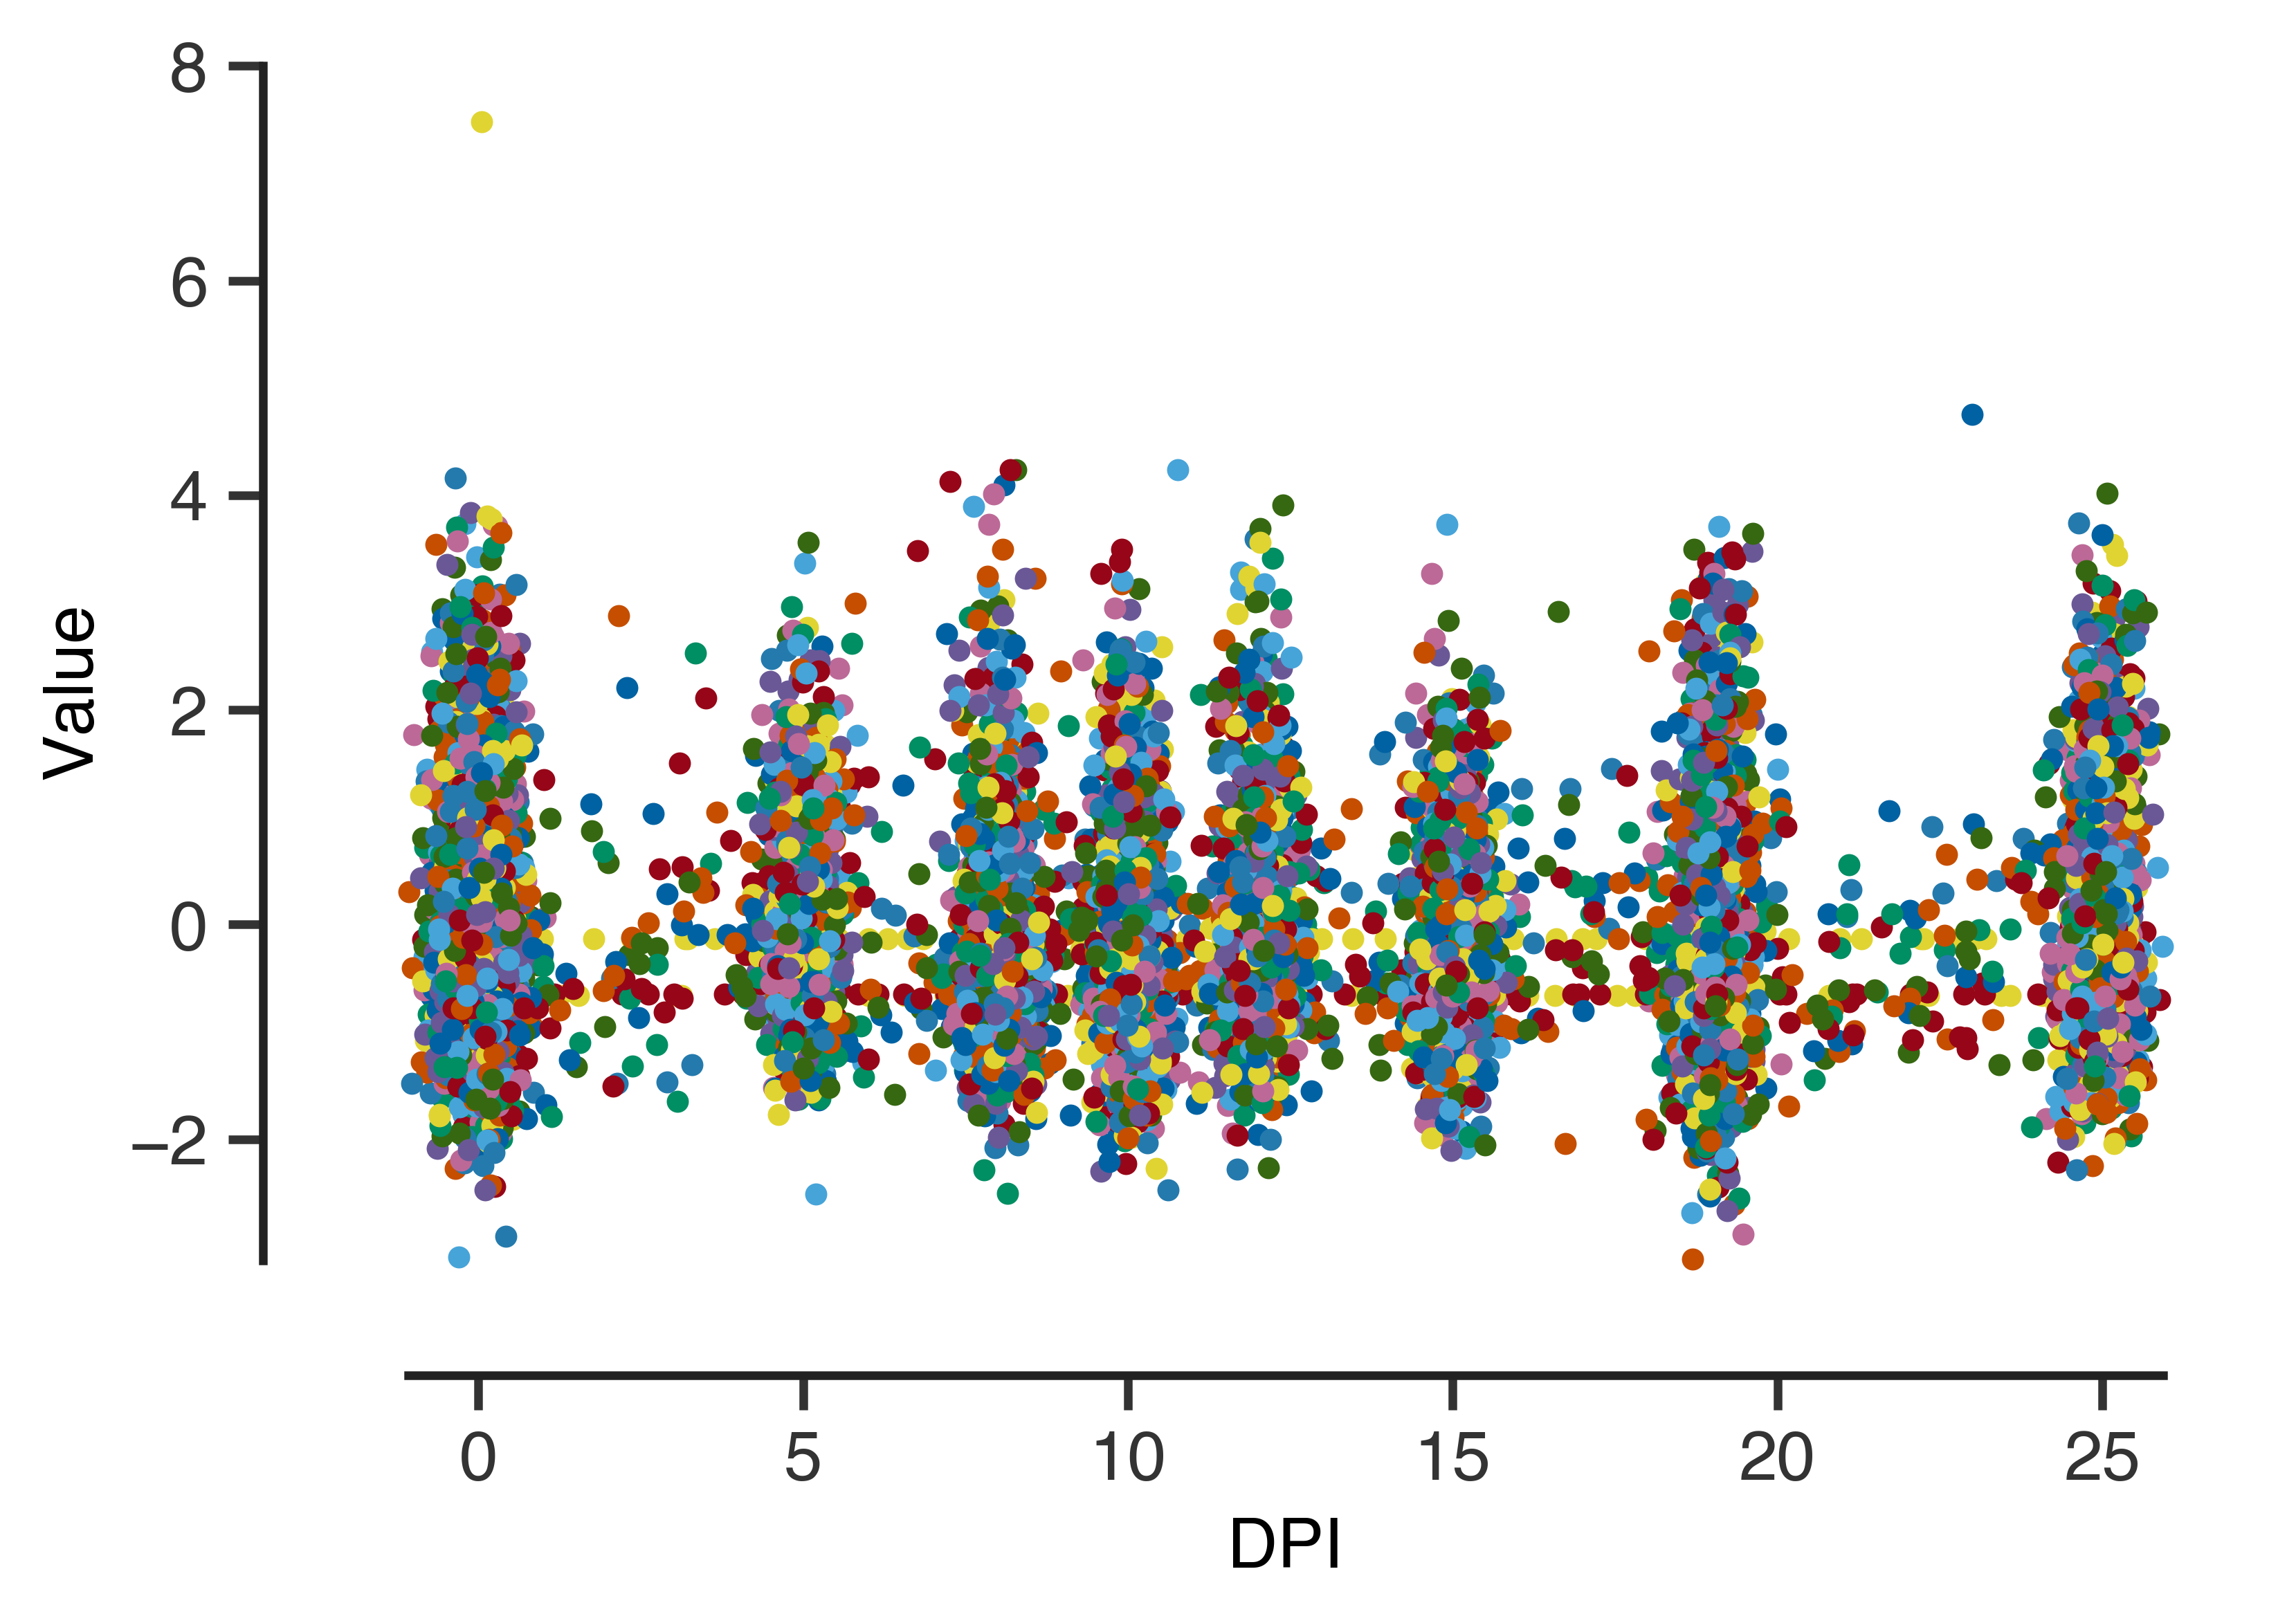

In [22]:
size = 8
for v in variables:
    plt.scatter(time+0.3*np.random.randn(len(normalized_control[v])), normalized_control[v], s=size)
    
# plt.scatter(time, control_list[variables[2]], s=size)
# plt.scatter(time, control_list[variables[6]], s=size)
plt.xlabel('DPI')
plt.ylabel('Value')
plotting.adjust_spines(plt.gca())

# Load the experimental data!!!

In [23]:
experimental_file = open(data_path + experimental_name, 'r')
experimental_reader = csv.reader(experimental_file)

In [24]:
experimental_list = collections.defaultdict(list)
labels = []
for idl,line in enumerate(experimental_reader):
    if idl == 0:
        for l in line:
            labels.append(l)
    else:
        if line[0] != '':
            print(line[0])
            for idi,l in enumerate(line):
                if l == '':
                    experimental_list[labels[idi]].append(np.nan)
                elif idi > 0:
                    experimental_list[labels[idi]].append(float(l))
                elif idi == 0:
                    experimental_list[labels[idi]].append(l)

1.1
2.1
3.1
4.1
5.1
1.2
2.2
3.2
4.2
5.2
1.3
2.3
3.3
4.3
5.3
1.4
2.4
3.4
4.4
5.4
1.5
2.5
3.5
4.5
5.5
1.6
2.6
3.6
4.6
5.6
1.7
2.7
3.7
4.7
5.7
1.8
2.8
3.8
4.8
5.8
1.9
2.9
3.9
4.9
5.9
1.10
2.10
3.10
4.10
5.10
1.11
2.11
3.11
4.11
5.11
1.12
2.12
3.12
4.12
5.12
1.13
2.13
3.13
4.13
5.13
1.14
2.14
3.14
4.14
5.14
1.15
2.15
3.15
4.15
5.15
1.16
2.16
3.16
4.16
5.16
1.17
2.17
3.17
4.17
5.17
1.18
2.18
3.18
4.18
5.18
1.19
2.19
3.19
4.19
5.19
1.20
2.20
3.20
4.20
5.20
1.21
2.21
3.21
4.21
5.21
1.22
2.22
3.22
4.22
5.22
1.23
2.23
3.23
4.23
5.23
1.24
2.24
3.24
4.24
5.24
1.25
2.25
3.25
4.25
5.25


In [25]:
for m in experimental_list['Mouse']:
    # mouse id x day
    this_split = m.split('.')
    experimental_list['mouse_id'] = this_split[0]

In [26]:
experimental_means = collections.defaultdict(list)
experimental_variance = collections.defaultdict(list)
for v in variables:
    experimental_means[v] = np.nanmean(experimental_list[v])
    experimental_variance[v] = np.nanvar(experimental_list[v])

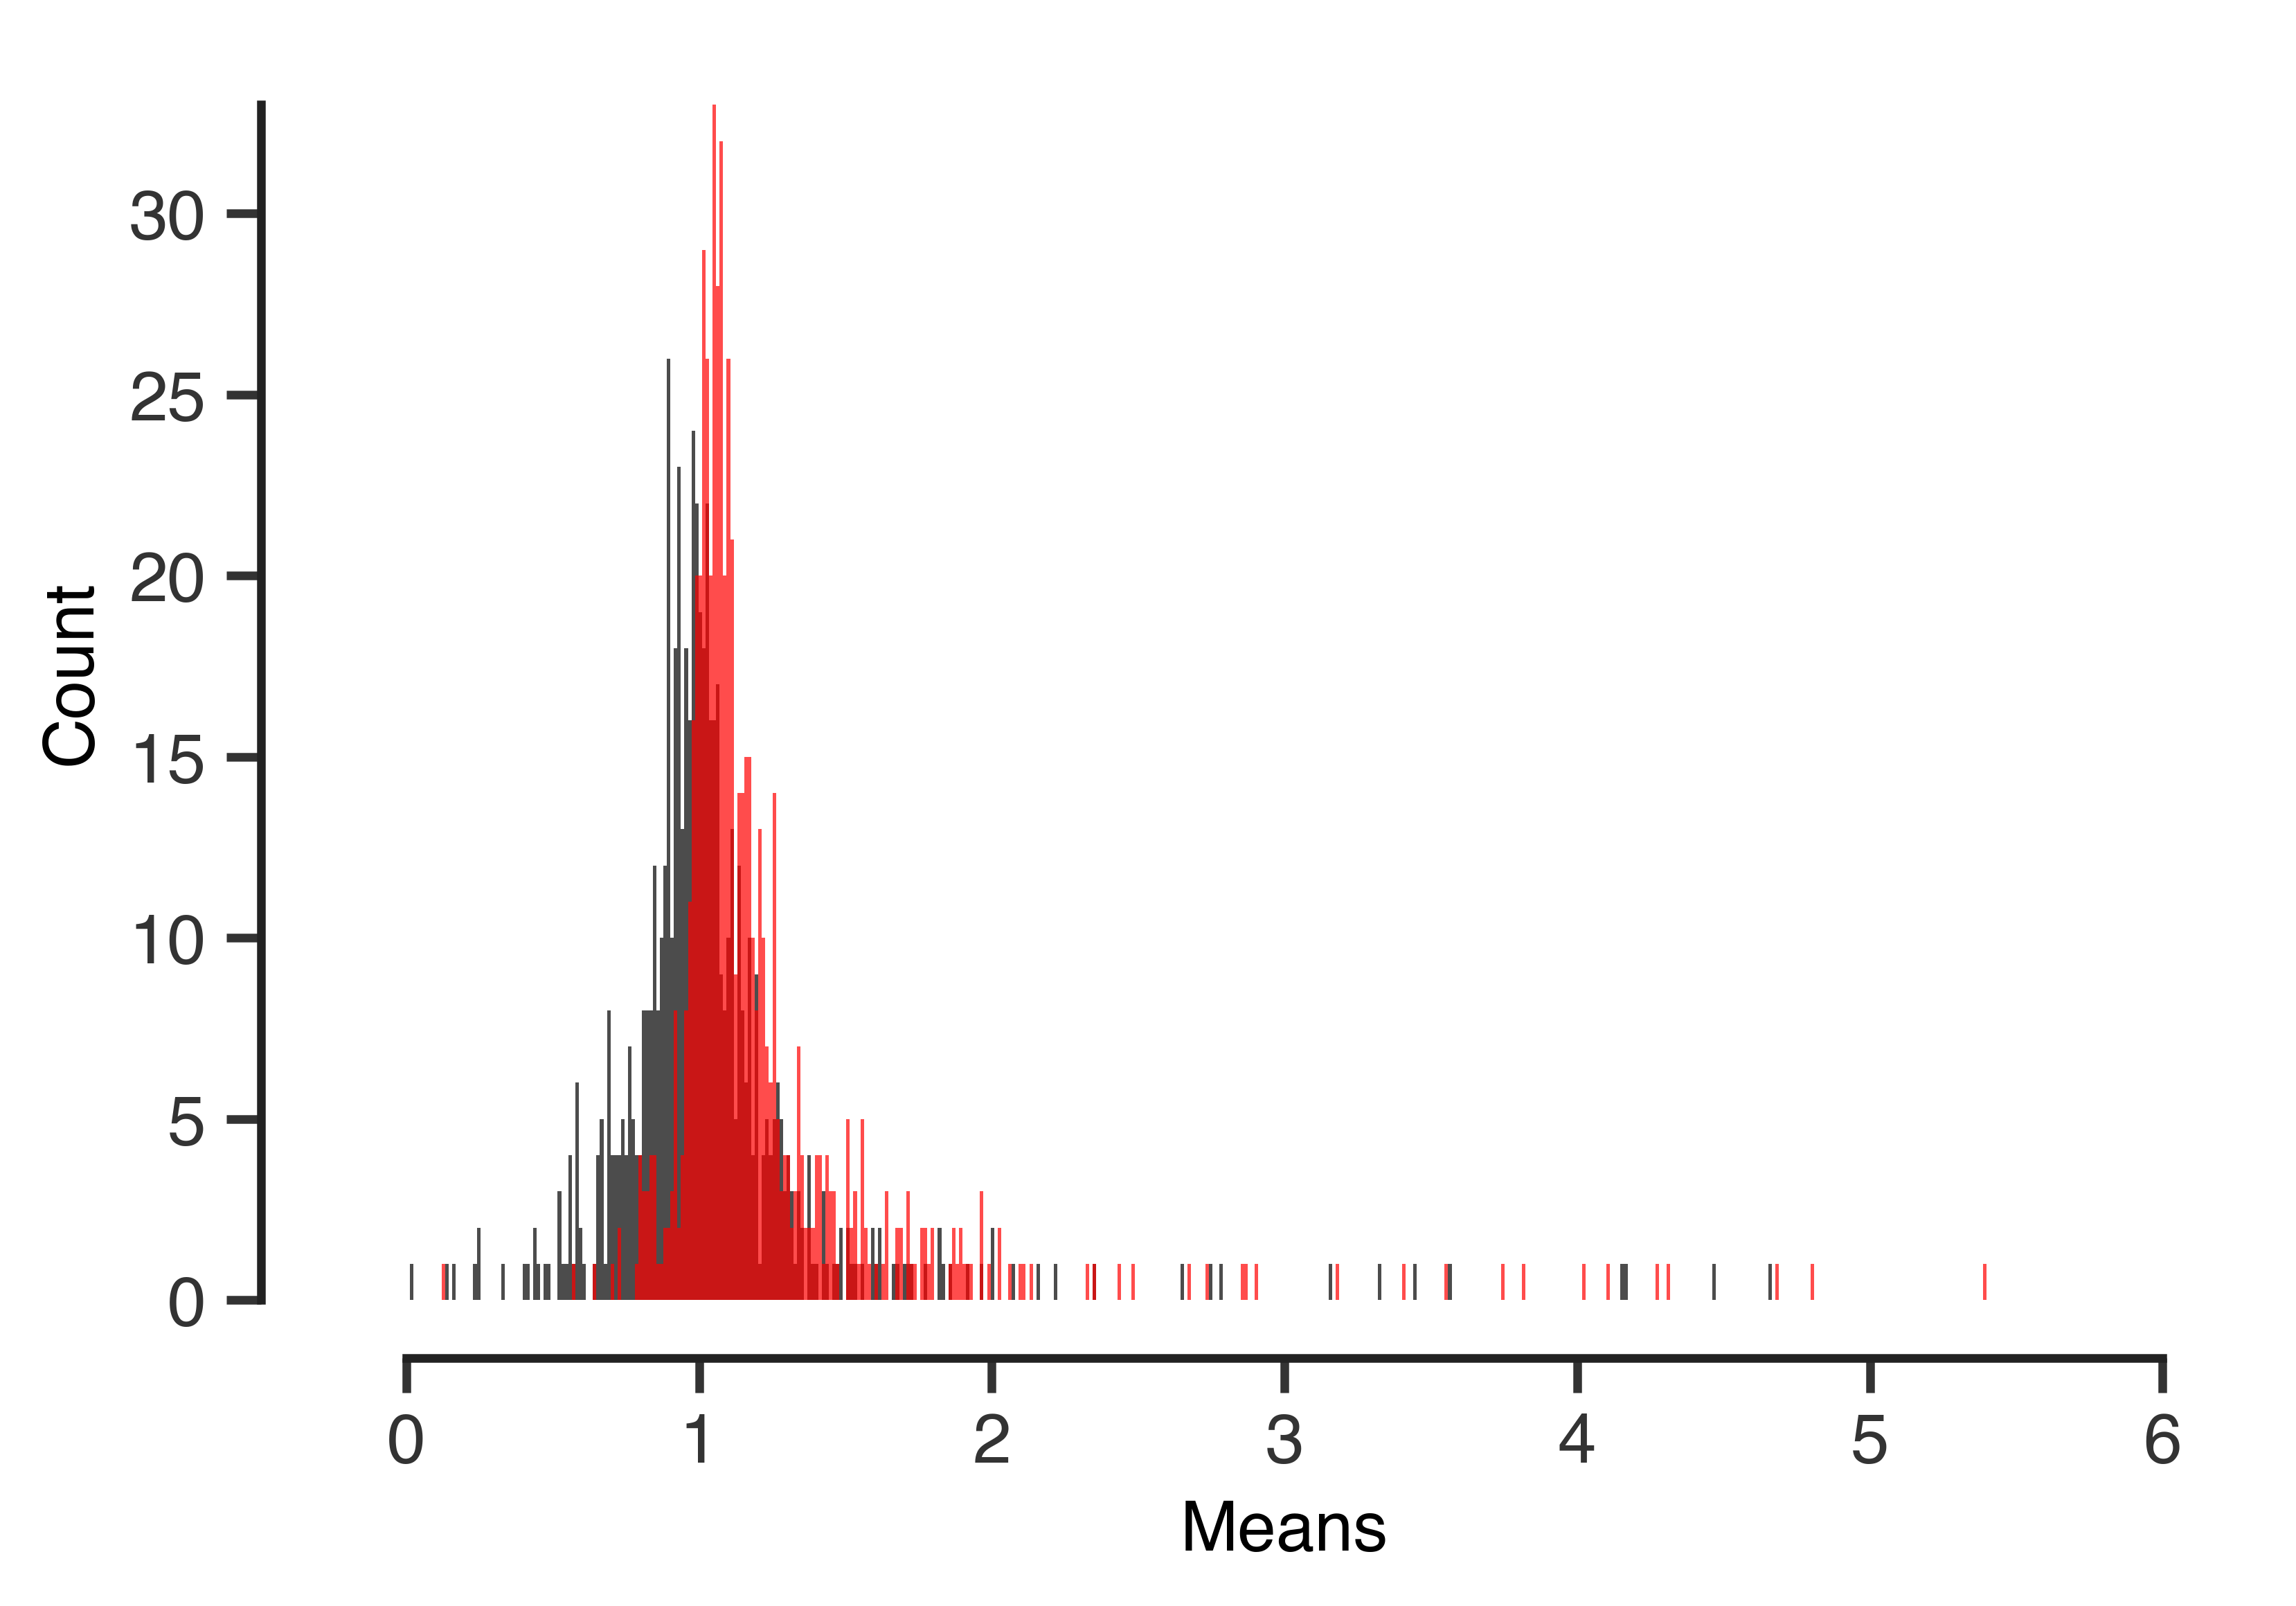

In [27]:
all_control_means = np.array([control_means[v] for v in variables]).flatten()
all_experimental_means = np.array([experimental_means[v] for v in variables]).flatten()
# all_control_variances = np.array([control_variance[v] for v in variables]).flatten()

bins = np.linspace(0,6,500)
bin_width = np.mean(np.diff(bins))

count_control, bins = np.histogram(all_control_means, bins=bins)
count_experimental, bins = np.histogram(all_experimental_means, bins=bins)

plt.bar(bins[:-1] + bin_width/2.0, count_control, width=bin_width, color='k', alpha=.7)
plt.bar(bins[:-1] + bin_width/2.0, count_experimental, width=bin_width, color='r', alpha=.7)
# plt.xscale('log')
plotting.adjust_spines(plt.gca())
plt.xlabel('Means')
plt.ylabel('Count')

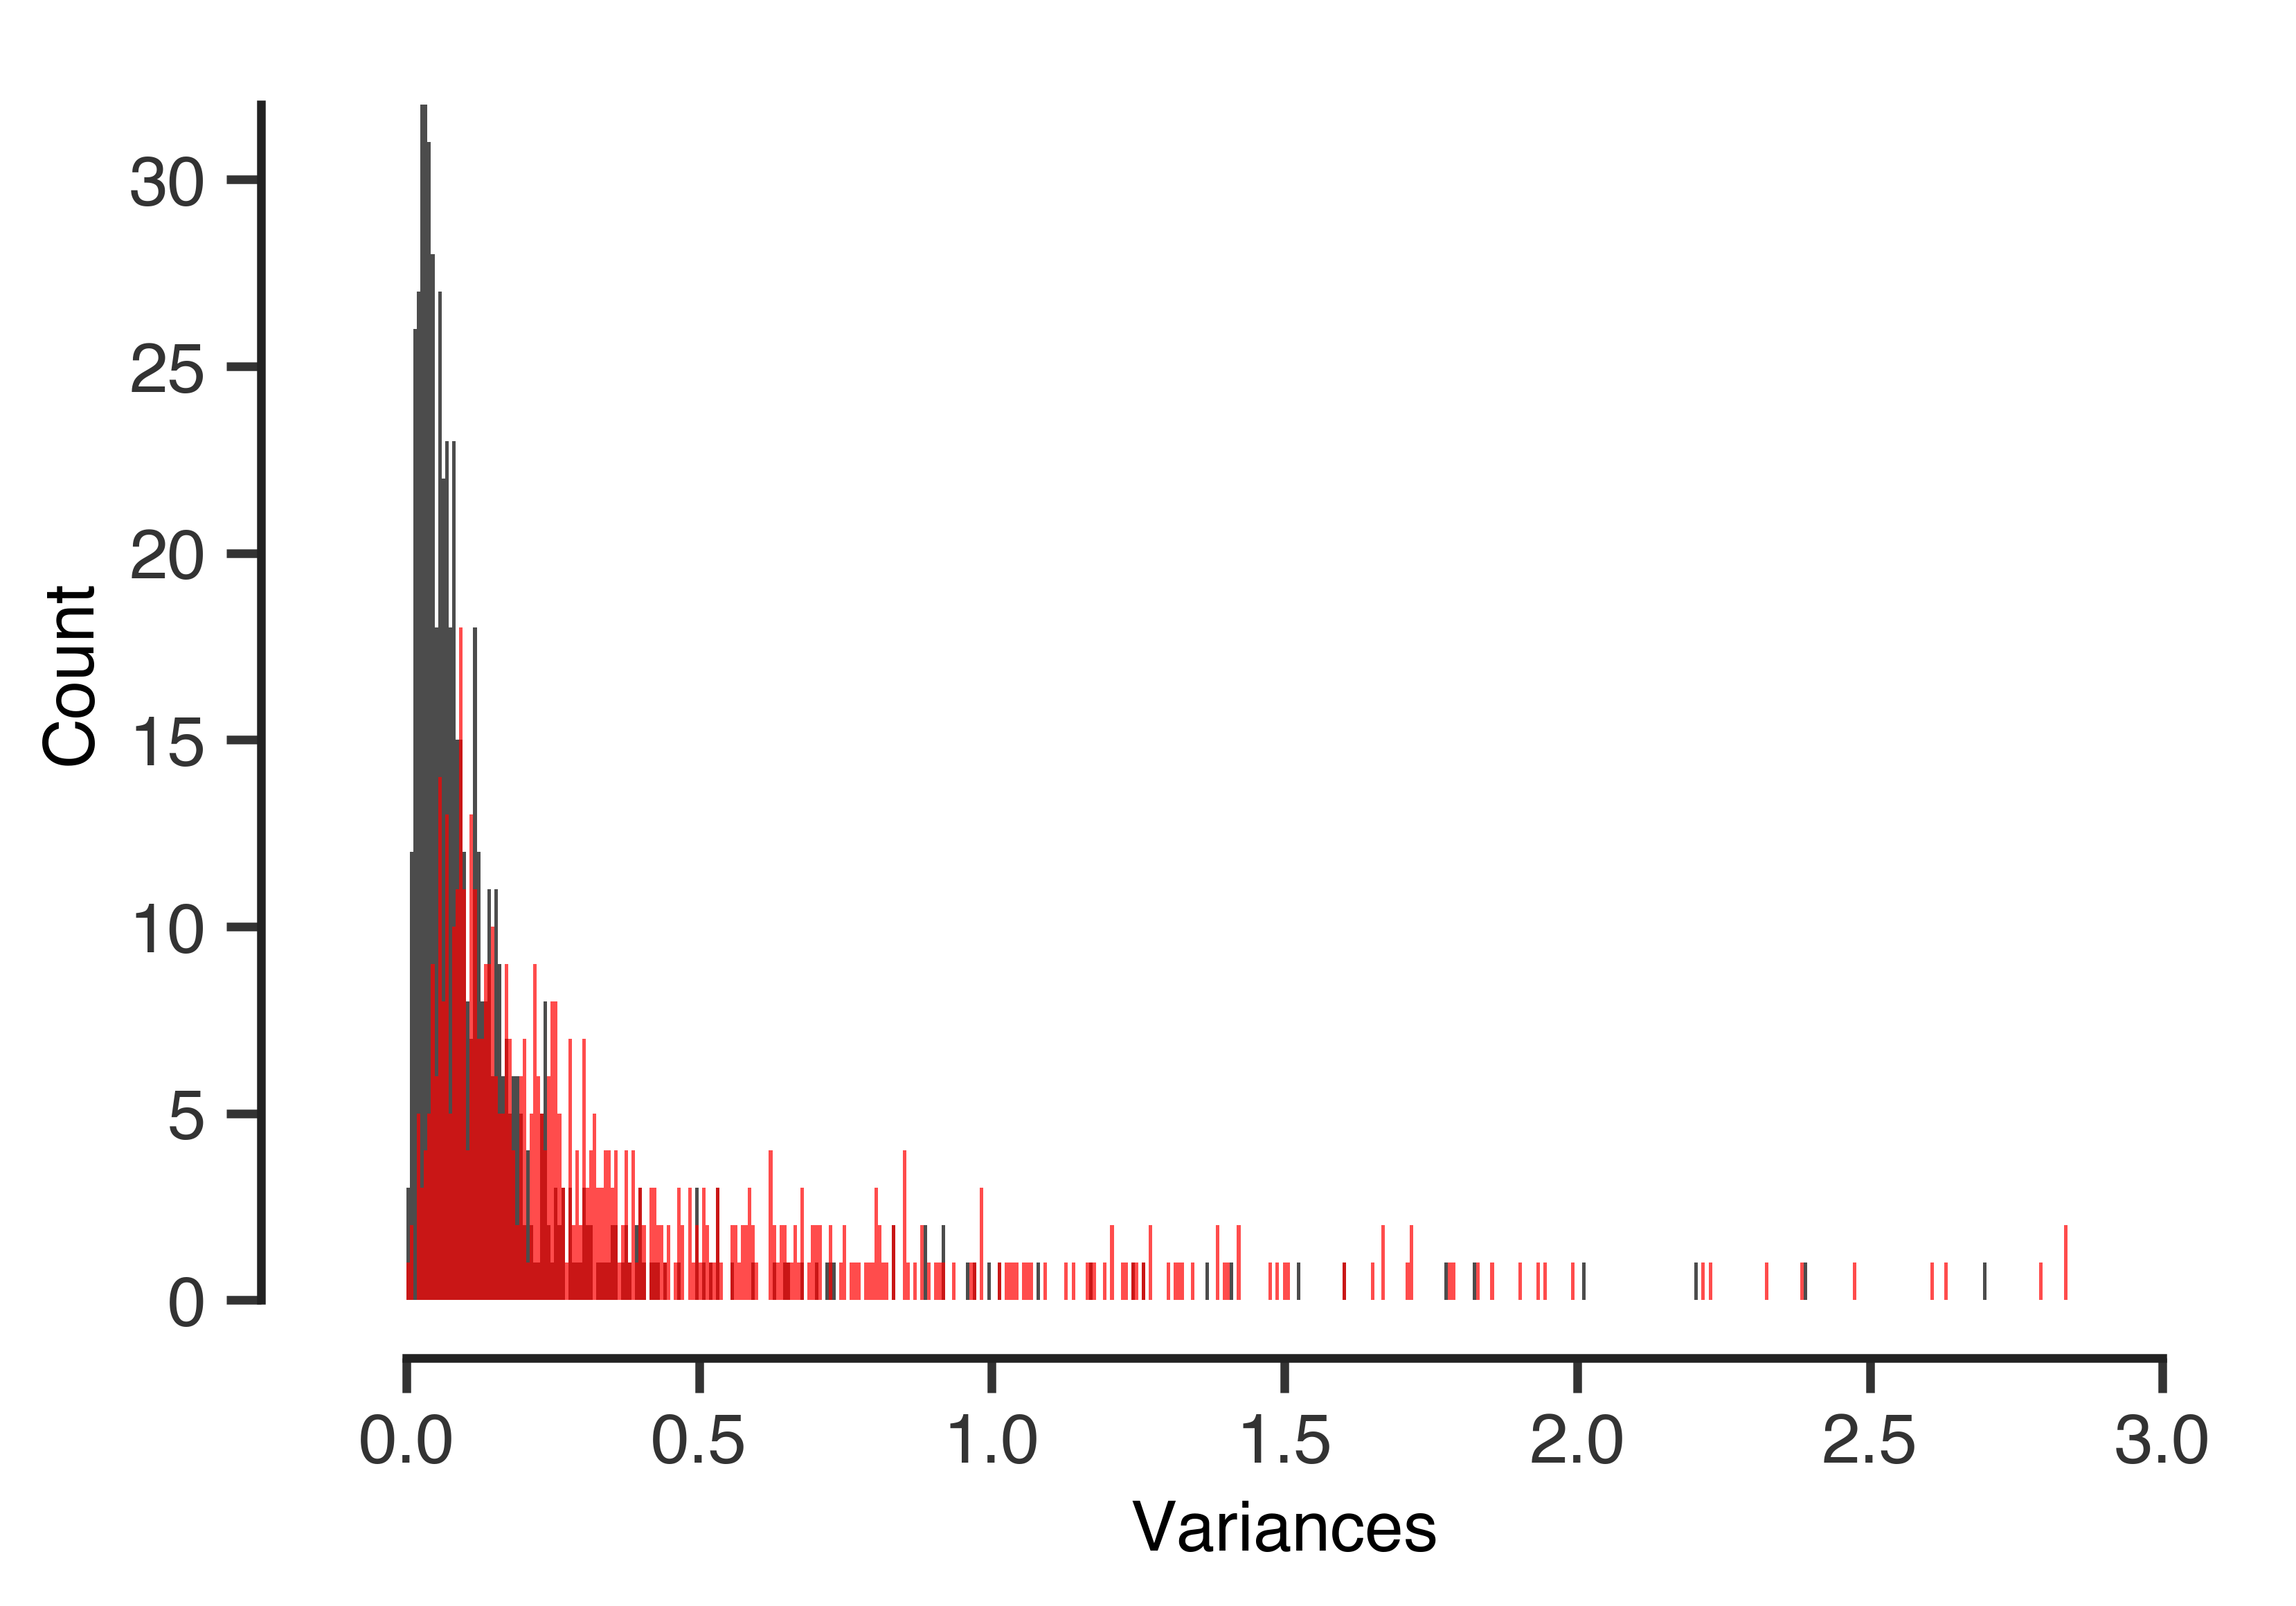

In [28]:
all_control_variances = np.array([control_variance[v] for v in variables]).flatten()
all_experimental_variances = np.array([experimental_variance[v] for v in variables]).flatten()
# all_control_variances = np.array([control_variance[v] for v in variables]).flatten()

bins = np.linspace(0,3,500)
bin_width = np.mean(np.diff(bins))

count_control, bins = np.histogram(all_control_variances, bins=bins)
count_experimental, bins = np.histogram(all_experimental_variances, bins=bins)

plt.bar(bins[:-1] + bin_width/2.0, count_control, width=bin_width, color='k', alpha=.7)
plt.bar(bins[:-1] + bin_width/2.0, count_experimental, width=bin_width, color='r', alpha=.7)
# plt.xscale('log')
plotting.adjust_spines(plt.gca())
plt.xlabel('Variances')
plt.ylabel('Count')

#### So far so good!

Zscore now the experimental data

In [29]:
normalized_experimental = collections.defaultdict(list)
for v in variables:
    normalized_experimental[v] = (experimental_list[v] - control_means[v])/control_std[v]

In [30]:
time_experimental = experimental_list['DPI']

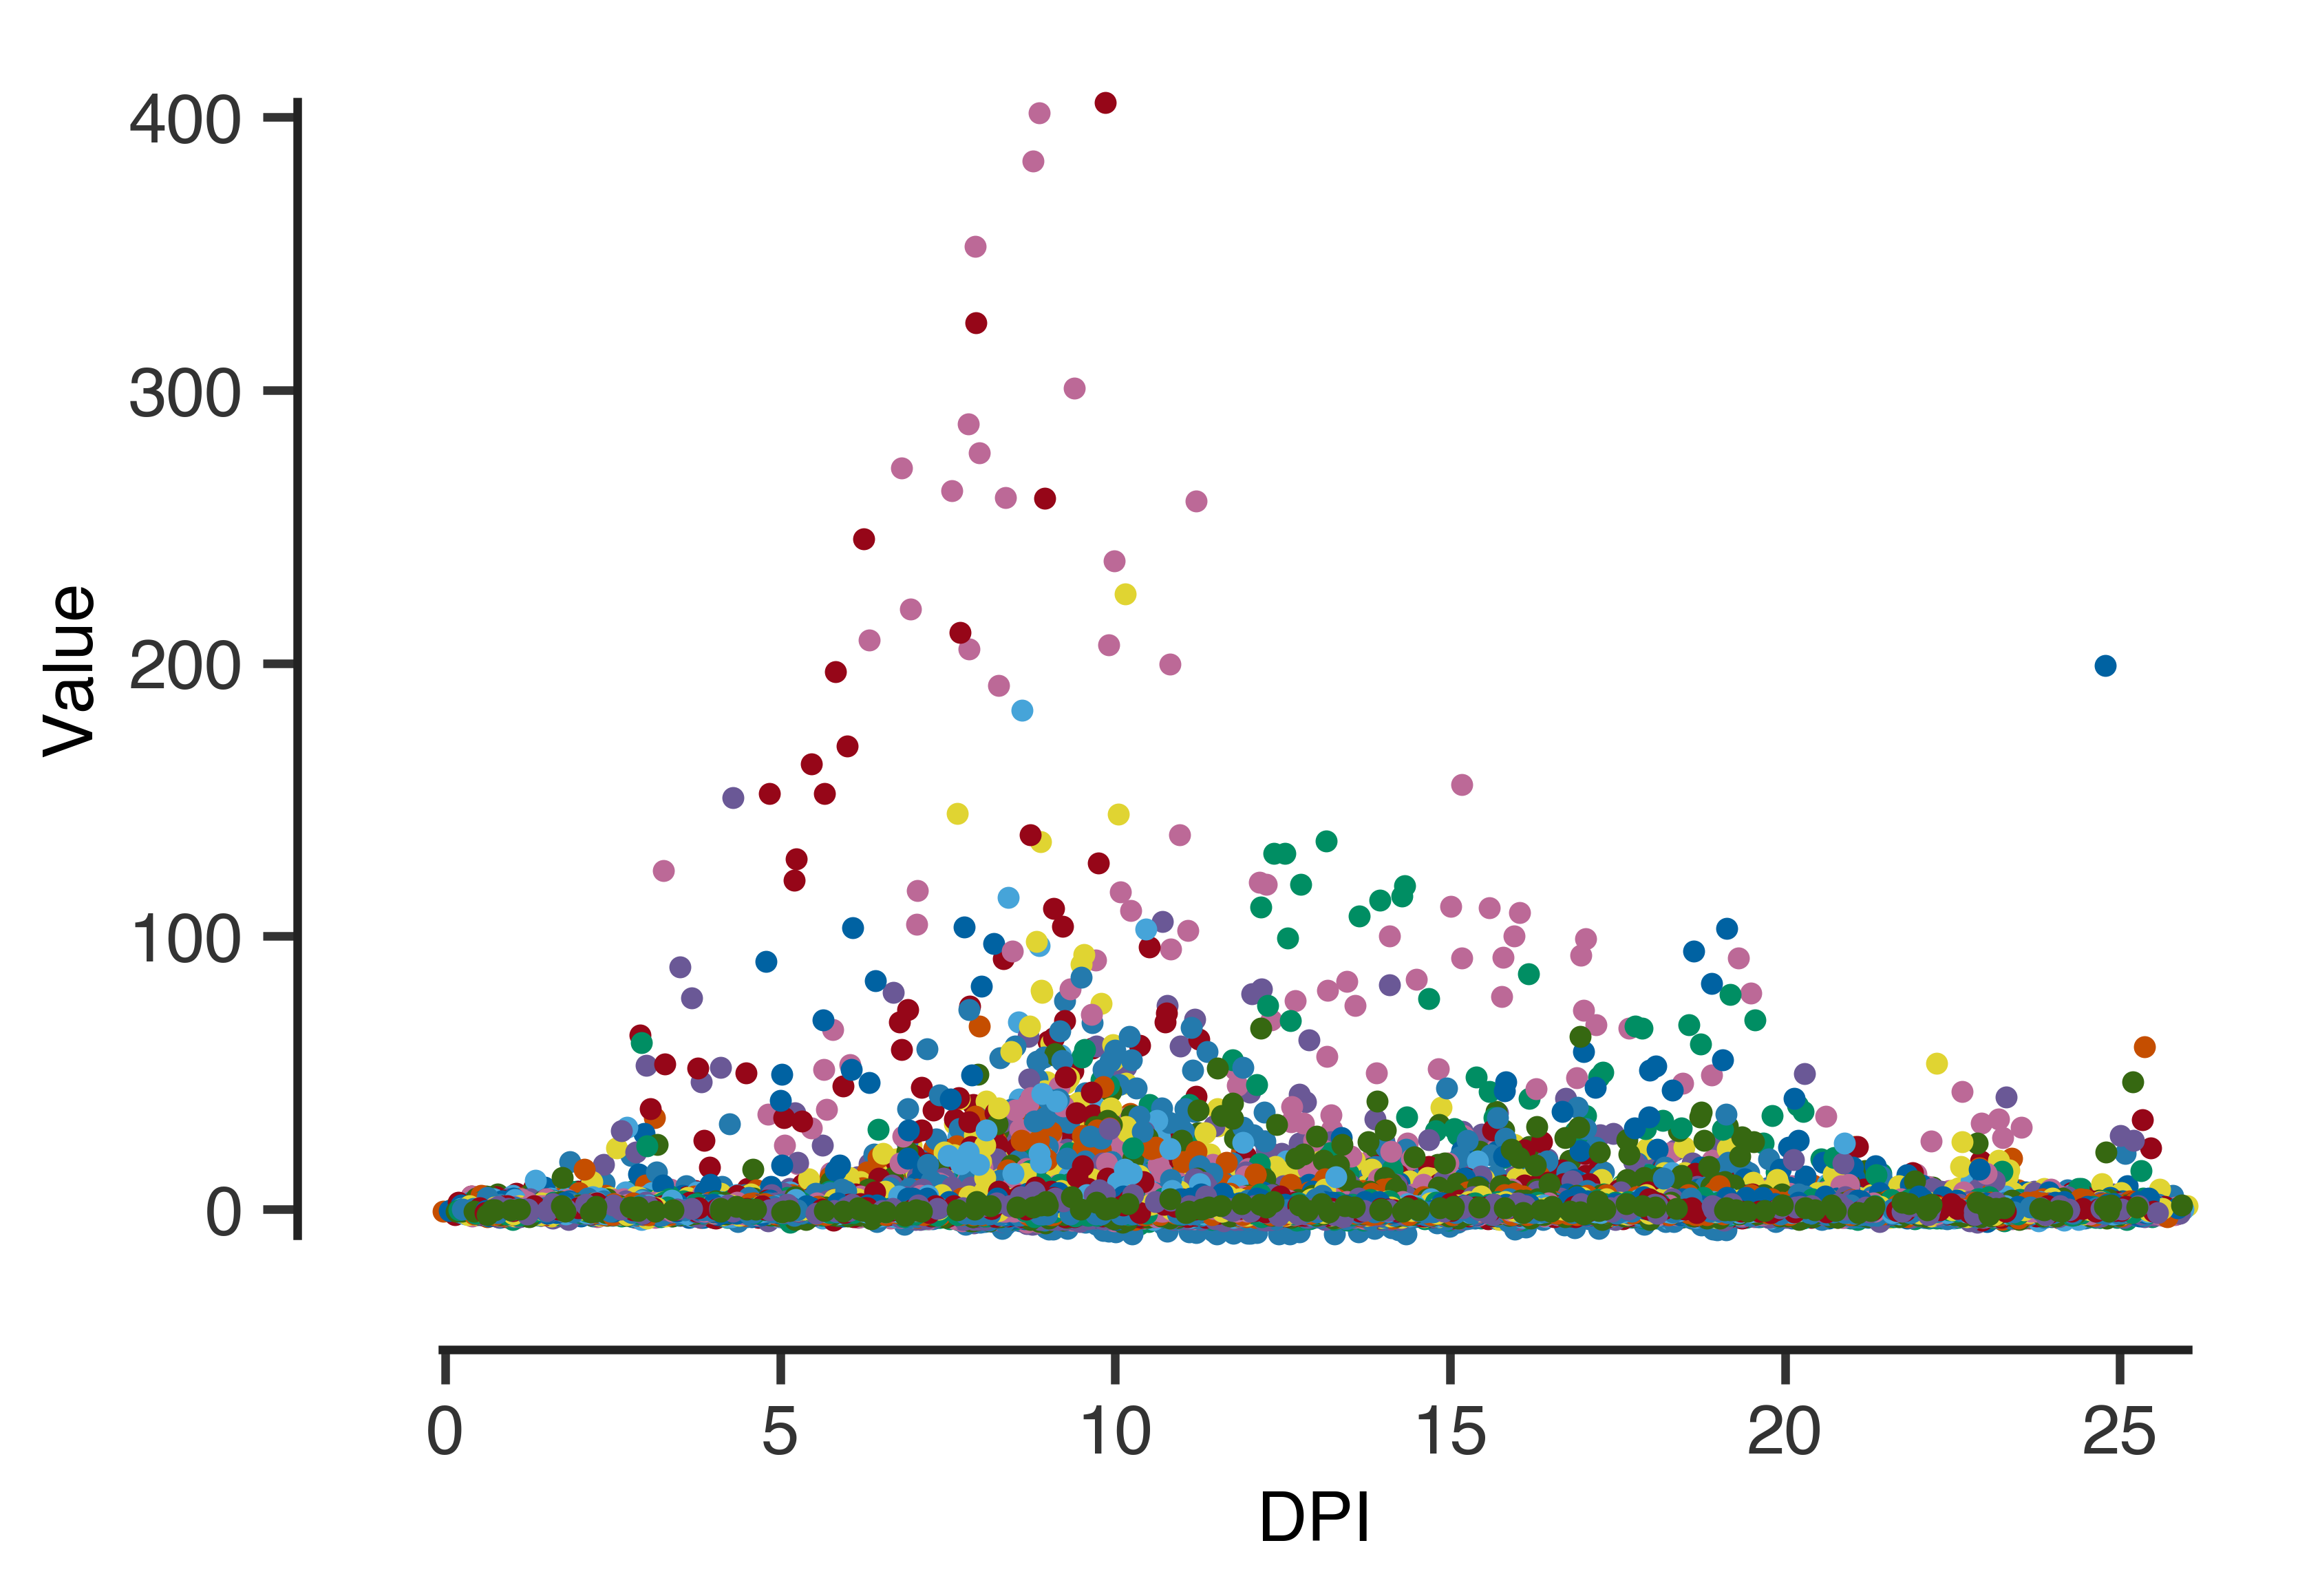

In [31]:
size = 8
for v in variables:
    plt.scatter(time_experimental+0.3*np.random.randn(len(normalized_experimental[v])),
                normalized_experimental[v], s=size)
    
# plt.scatter(time, control_list[variables[2]], s=size)
# plt.scatter(time, control_list[variables[6]], s=size)
plt.xlabel('DPI')
plt.ylabel('Value')
plotting.adjust_spines(plt.gca())

In [32]:
max(all_experimental_variances)

425.59027147242404

In [33]:
for v in variables:
    if experimental_variance[v] > 100:
        print('%s has variance %0.2f' %(v, experimental_variance[v]))

AST has variance 106.02
ALT has variance 425.59
inosine has variance 135.99
IFN-g has variance 150.67
taurochenodeoxycholate has variance 140.79


After zscoring...

In [34]:
for v in variables:
    if np.nanvar(normalized_experimental[v]) > 100:
        print('%s has variance %0.2f' %(v, np.nanvar(normalized_experimental[v])))

IL-12P70 has variance 335.20
orotate has variance 425.65
arachidoylcarnitine (C20)* has variance 105.58
itaconate has variance 8305.00
AST has variance 832.14
ALT has variance 3070.93
isobutyrylcarnitine (C4) has variance 118.32
Total Bilirubin has variance 135.88
eicosenoylcarnitine (C20:1)* has variance 289.58
bilirubin (Z,Z) has variance 162.54
Erythrocyte-B has variance 1283.37
2-docosahexaenoylglycerol (22:6)* has variance 111.49
formiminoglutamate has variance 300.95
IFN-g has variance 2098.81
IL-1a has variance 114.69
glycosyl-N-palmitoyl-sphingosine (d18:1/16:0) has variance 227.26
methylsuccinate has variance 265.28
IL-2 has variance 277.02
g/d T Cells has variance 338.77
pipecolate has variance 201.16
IL-23 has variance 333.02
IL-3 has variance 170.30
MCP-1 has variance 442.20
margaroylcarnitine* has variance 191.28
stearoylcarnitine (C18) has variance 276.38
Erythrocyte-A has variance 186.70
dihomo-linoleoylcarnitine (C20:2)* has variance 144.13


In [35]:
np.max(all_experimental_variances)

425.59027147242404

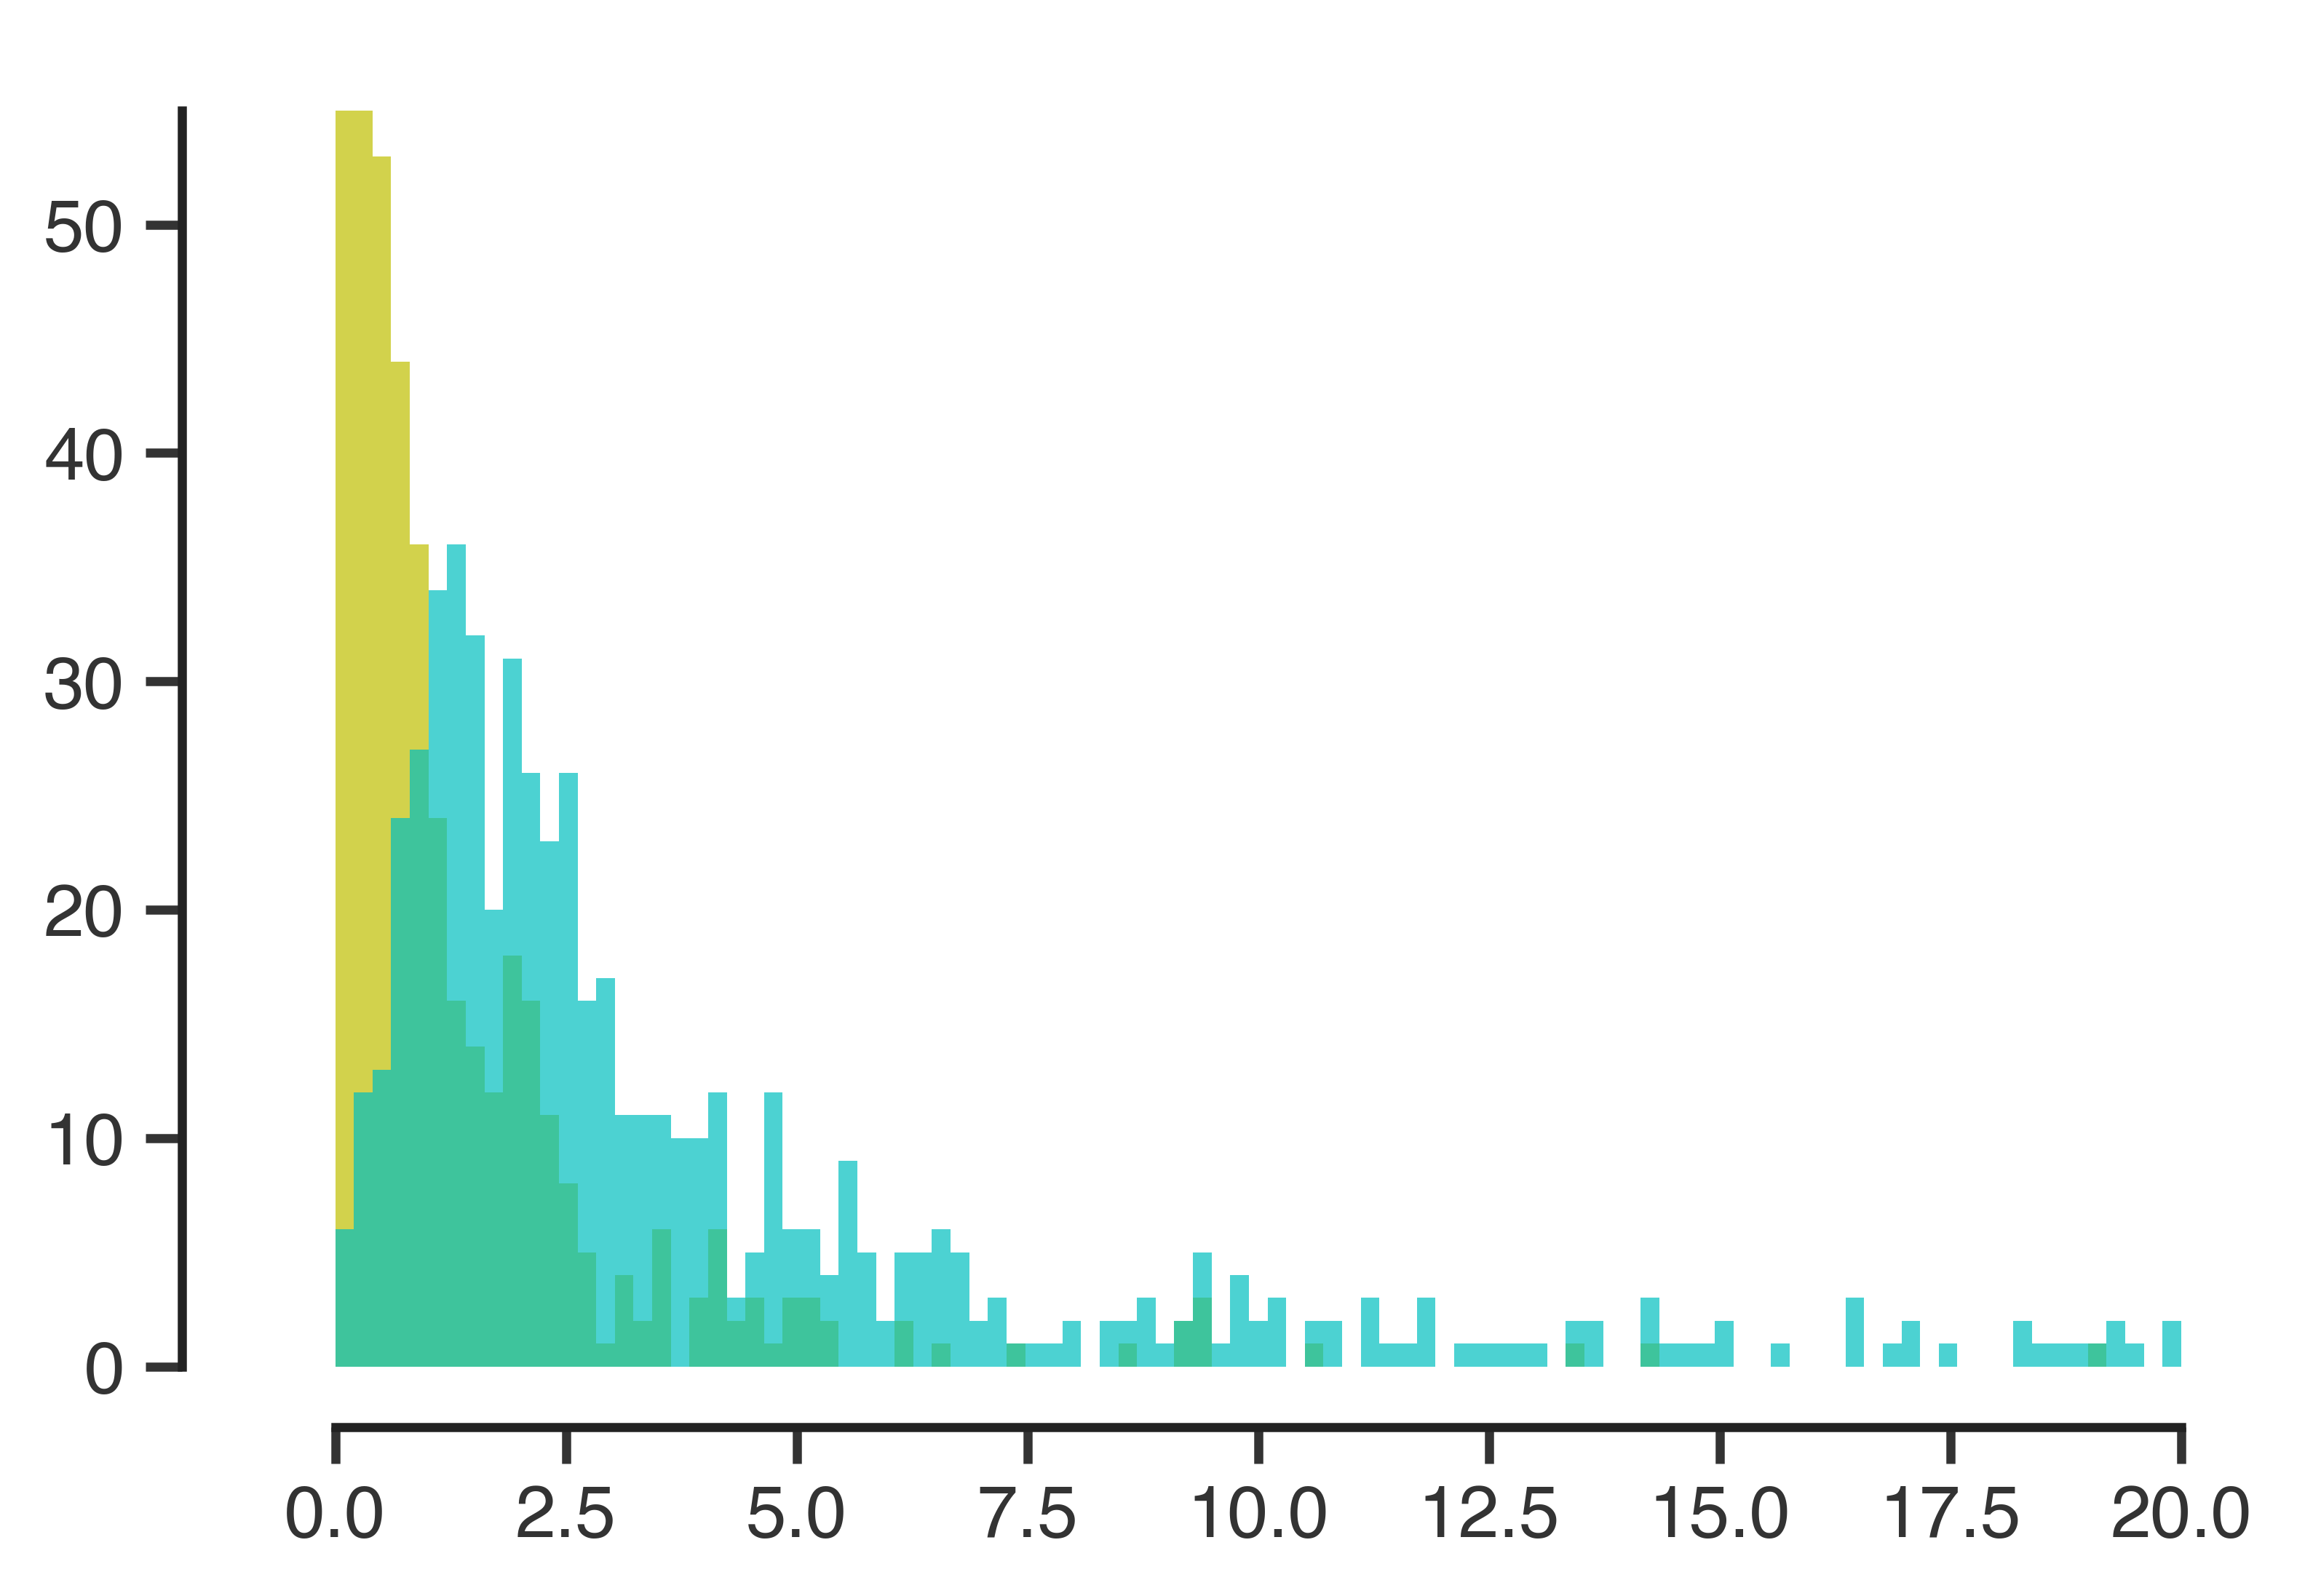

In [36]:
all_experimental_means = np.array([np.nanmean(normalized_experimental[v]) for v in variables]).flatten()
all_experimental_variances = np.array([np.nanvar(normalized_experimental[v]) for v in variables]).flatten()

# bins = np.linspace(min([min(all_experimental_means), min(all_experimental_variances)]),
#                    max([max(all_experimental_means), max(all_experimental_variances)]),500)

bins = np.linspace(0,20,100)
bin_width = np.mean(np.diff(bins))

count_means, bins = np.histogram(all_experimental_means, bins=bins)
count_variances, bins = np.histogram(all_experimental_variances, bins=bins)

plt.bar(bins[:-1] + bin_width/2.0, count_means, width=bin_width, color='y', alpha=0.7)
plt.bar(bins[:-1] + bin_width/2.0, count_variances, width=bin_width, color='c', alpha=0.7)
# plt.xscale('log')
plotting.adjust_spines(plt.gca())

# negative log likelihood

\begin{align}
- \log p(\mbox{data} | \theta) &= -\log (\exp (-(x - \mu)^2/\sigma^2)) \\
&= (x - \mu)^2 / \sigma^2
\end{align}

In [37]:
import scipy.stats as ss

In [38]:
my_gaussian = ss.norm(loc=0., scale=1.)

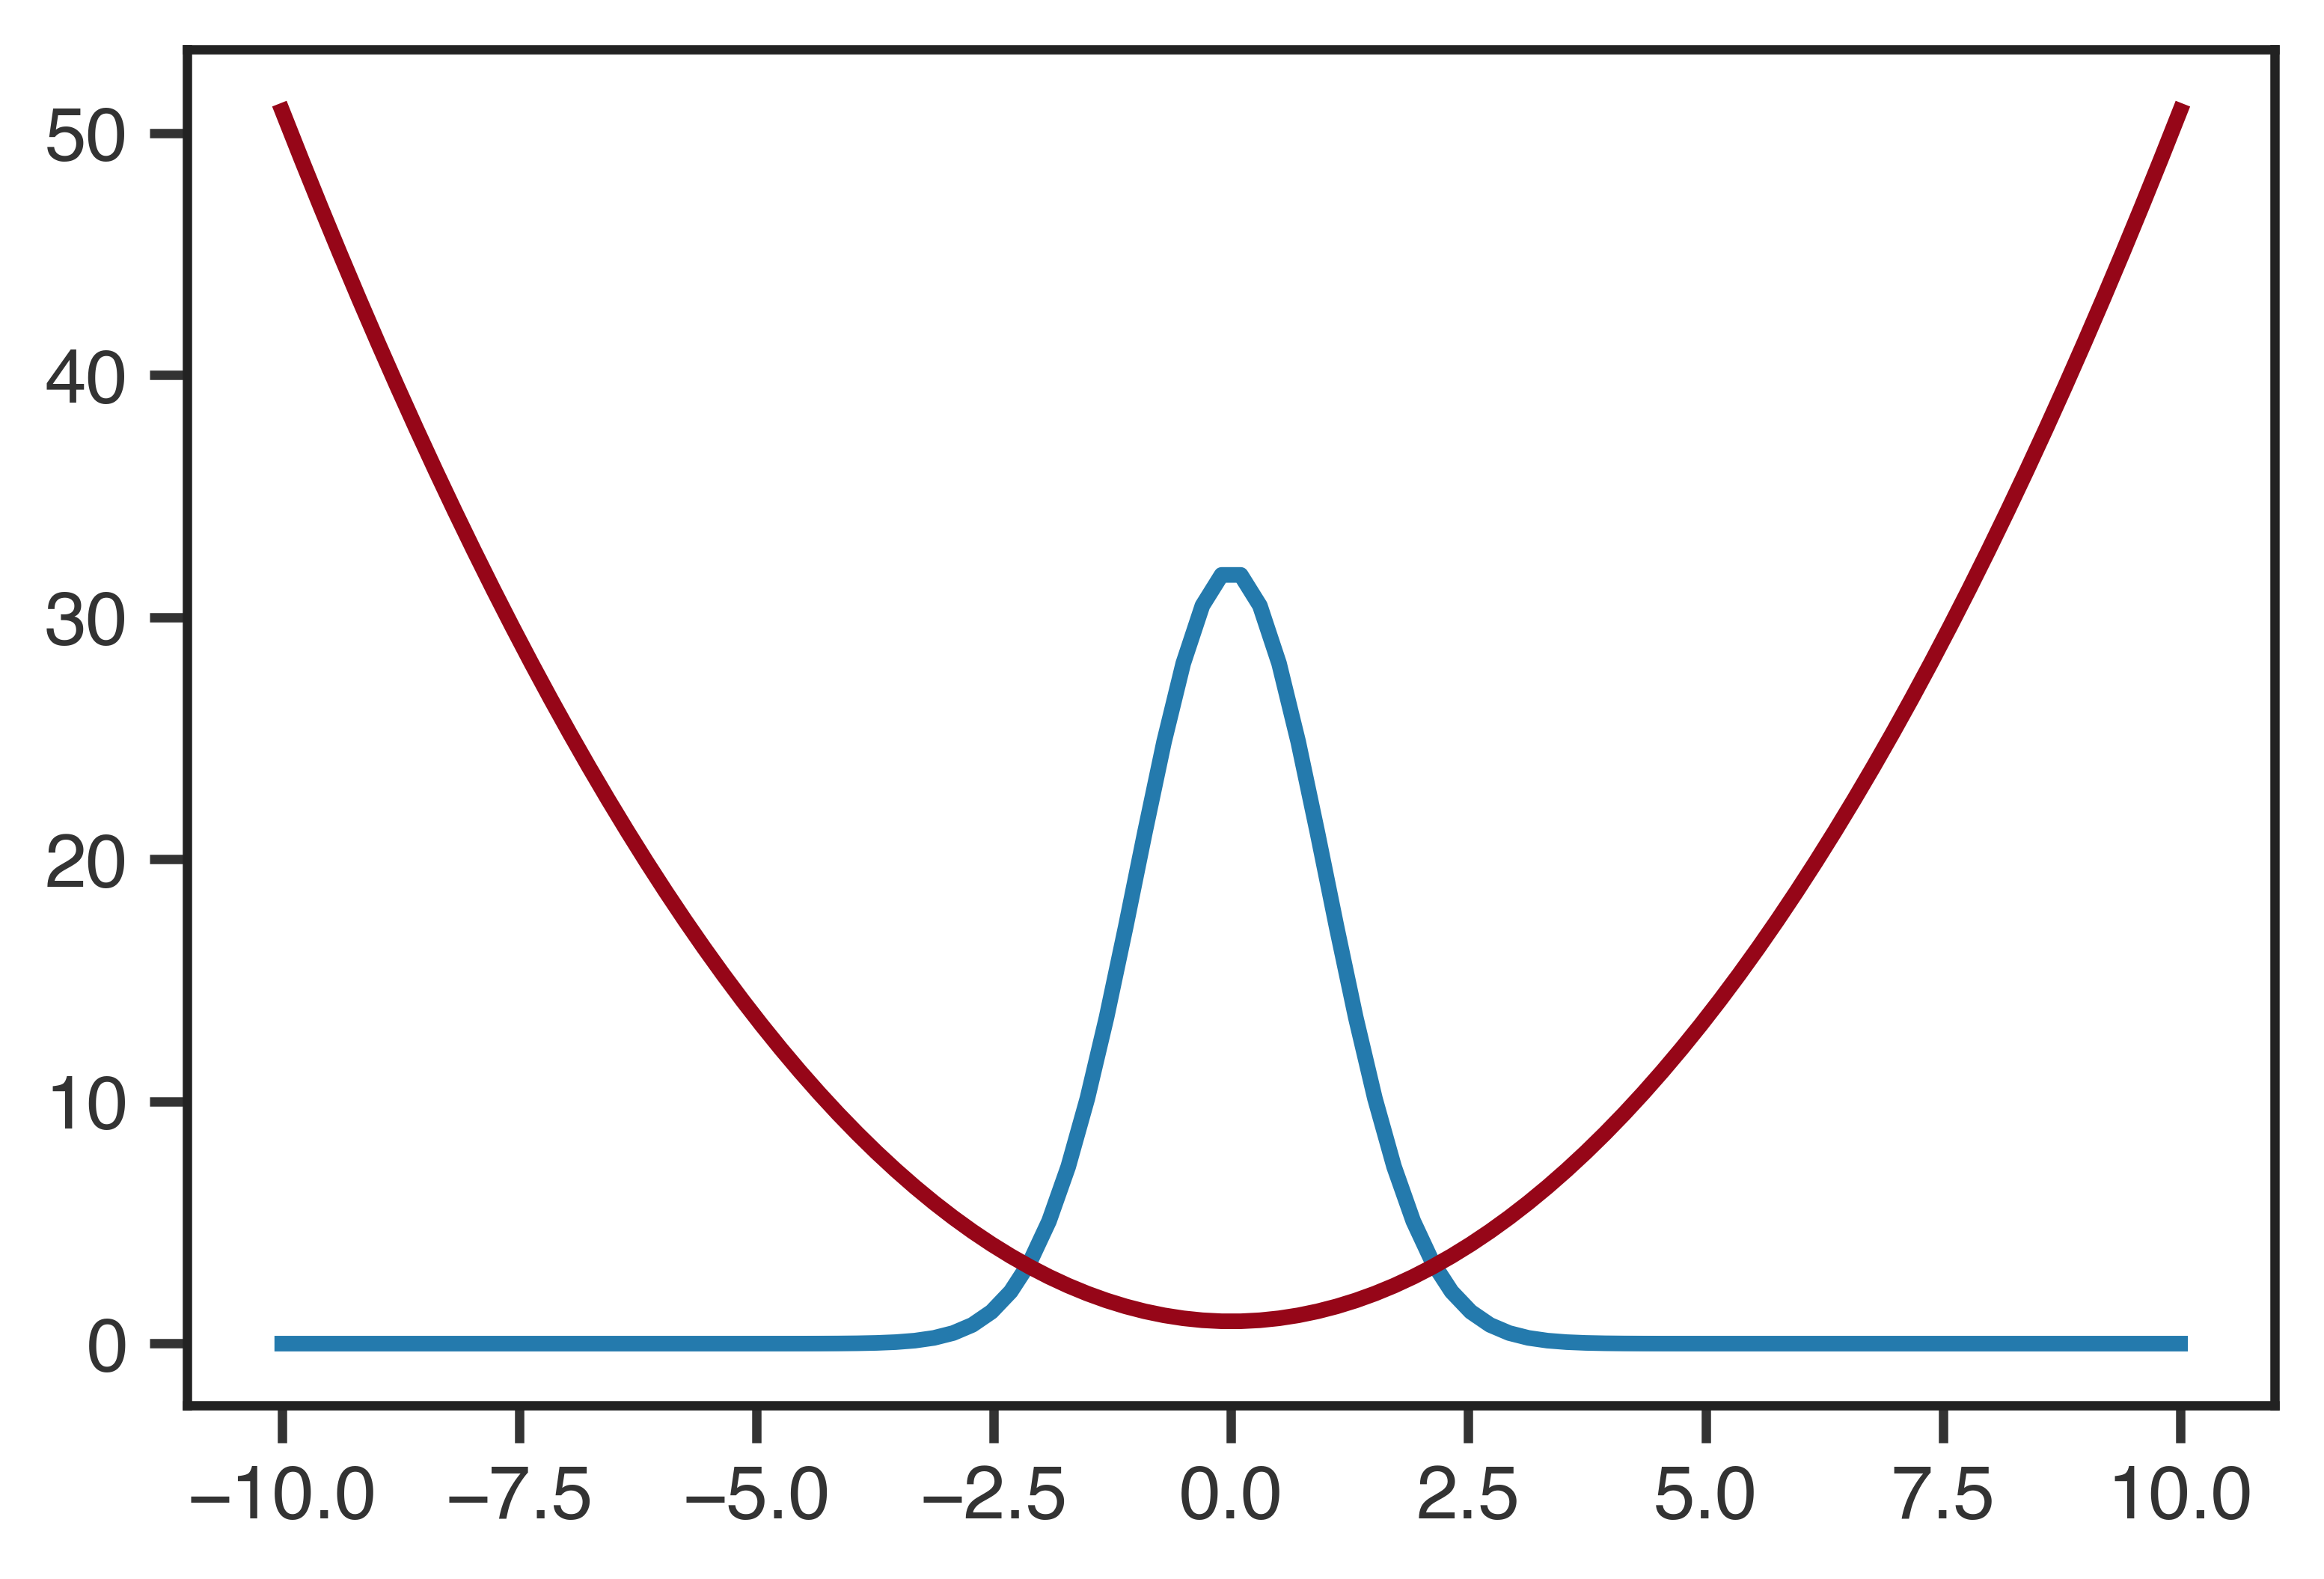

In [39]:
log_vals = [my_gaussian.logpdf([x]) for x in np.linspace(-10,10,100)]
vals = [my_gaussian.pdf([x]) for x in np.linspace(-10,10,100)]
plt.plot(np.linspace(-10,10,100), 80*np.array(vals))
plt.plot(np.linspace(-10,10,100), -np.array(log_vals))

In [40]:
np.min(-np.array(log_vals))

0.92404005345770801

In [41]:
neg_ll = collections.defaultdict(list)
# fit gaussian to control data for each variable!
# but wait, we don't have to! we already normalized
standard_normal = ss.norm(loc=0., scale=1.0)

for v in variables:
    neg_logpdf = -standard_normal.logpdf(normalized_experimental[v])
    neg_ll[v] = neg_logpdf

# Histogram of negative log likelihoods

In [42]:
neg_ll[v]

array([  0.93145602,   2.63396669,   0.93990561,   0.93675441,
         0.92808499,   1.11932993,   1.4430954 ,   1.26222786,
         1.6456963 ,   1.094675  ,   1.30296756,   0.97710908,
         1.22482891,   1.19797143,   0.96727452,   1.46311166,
         0.92184858,   1.00196602,   1.09291307,   0.91898599,
         1.32437031,   0.92514526,   1.04945646,   1.01662801,
         1.10725708,   1.32638501,   0.92182917,   1.09137866,
         1.01223381,   1.05567798,   1.11024014,   2.63051963,
         0.93907508,   3.51551076,   1.30580727,   1.2210537 ,
         0.92033385,   5.29354457,   1.90733721,   0.92266628,
        11.28397581,   2.0353337 ,   2.03867523,   5.22441799,
         1.32884828,   0.91901478,   3.09395454,   1.15582489,
         4.30378293,   0.9197451 ,   1.1303224 ,   1.73351178,
         1.6865232 ,   0.92001943,   8.58276505,   3.23762383,
         2.7087873 ,   1.17119088,   4.67793718,   1.24405657,
         1.39167938,   2.10540682,   1.9252209 ,   1.05

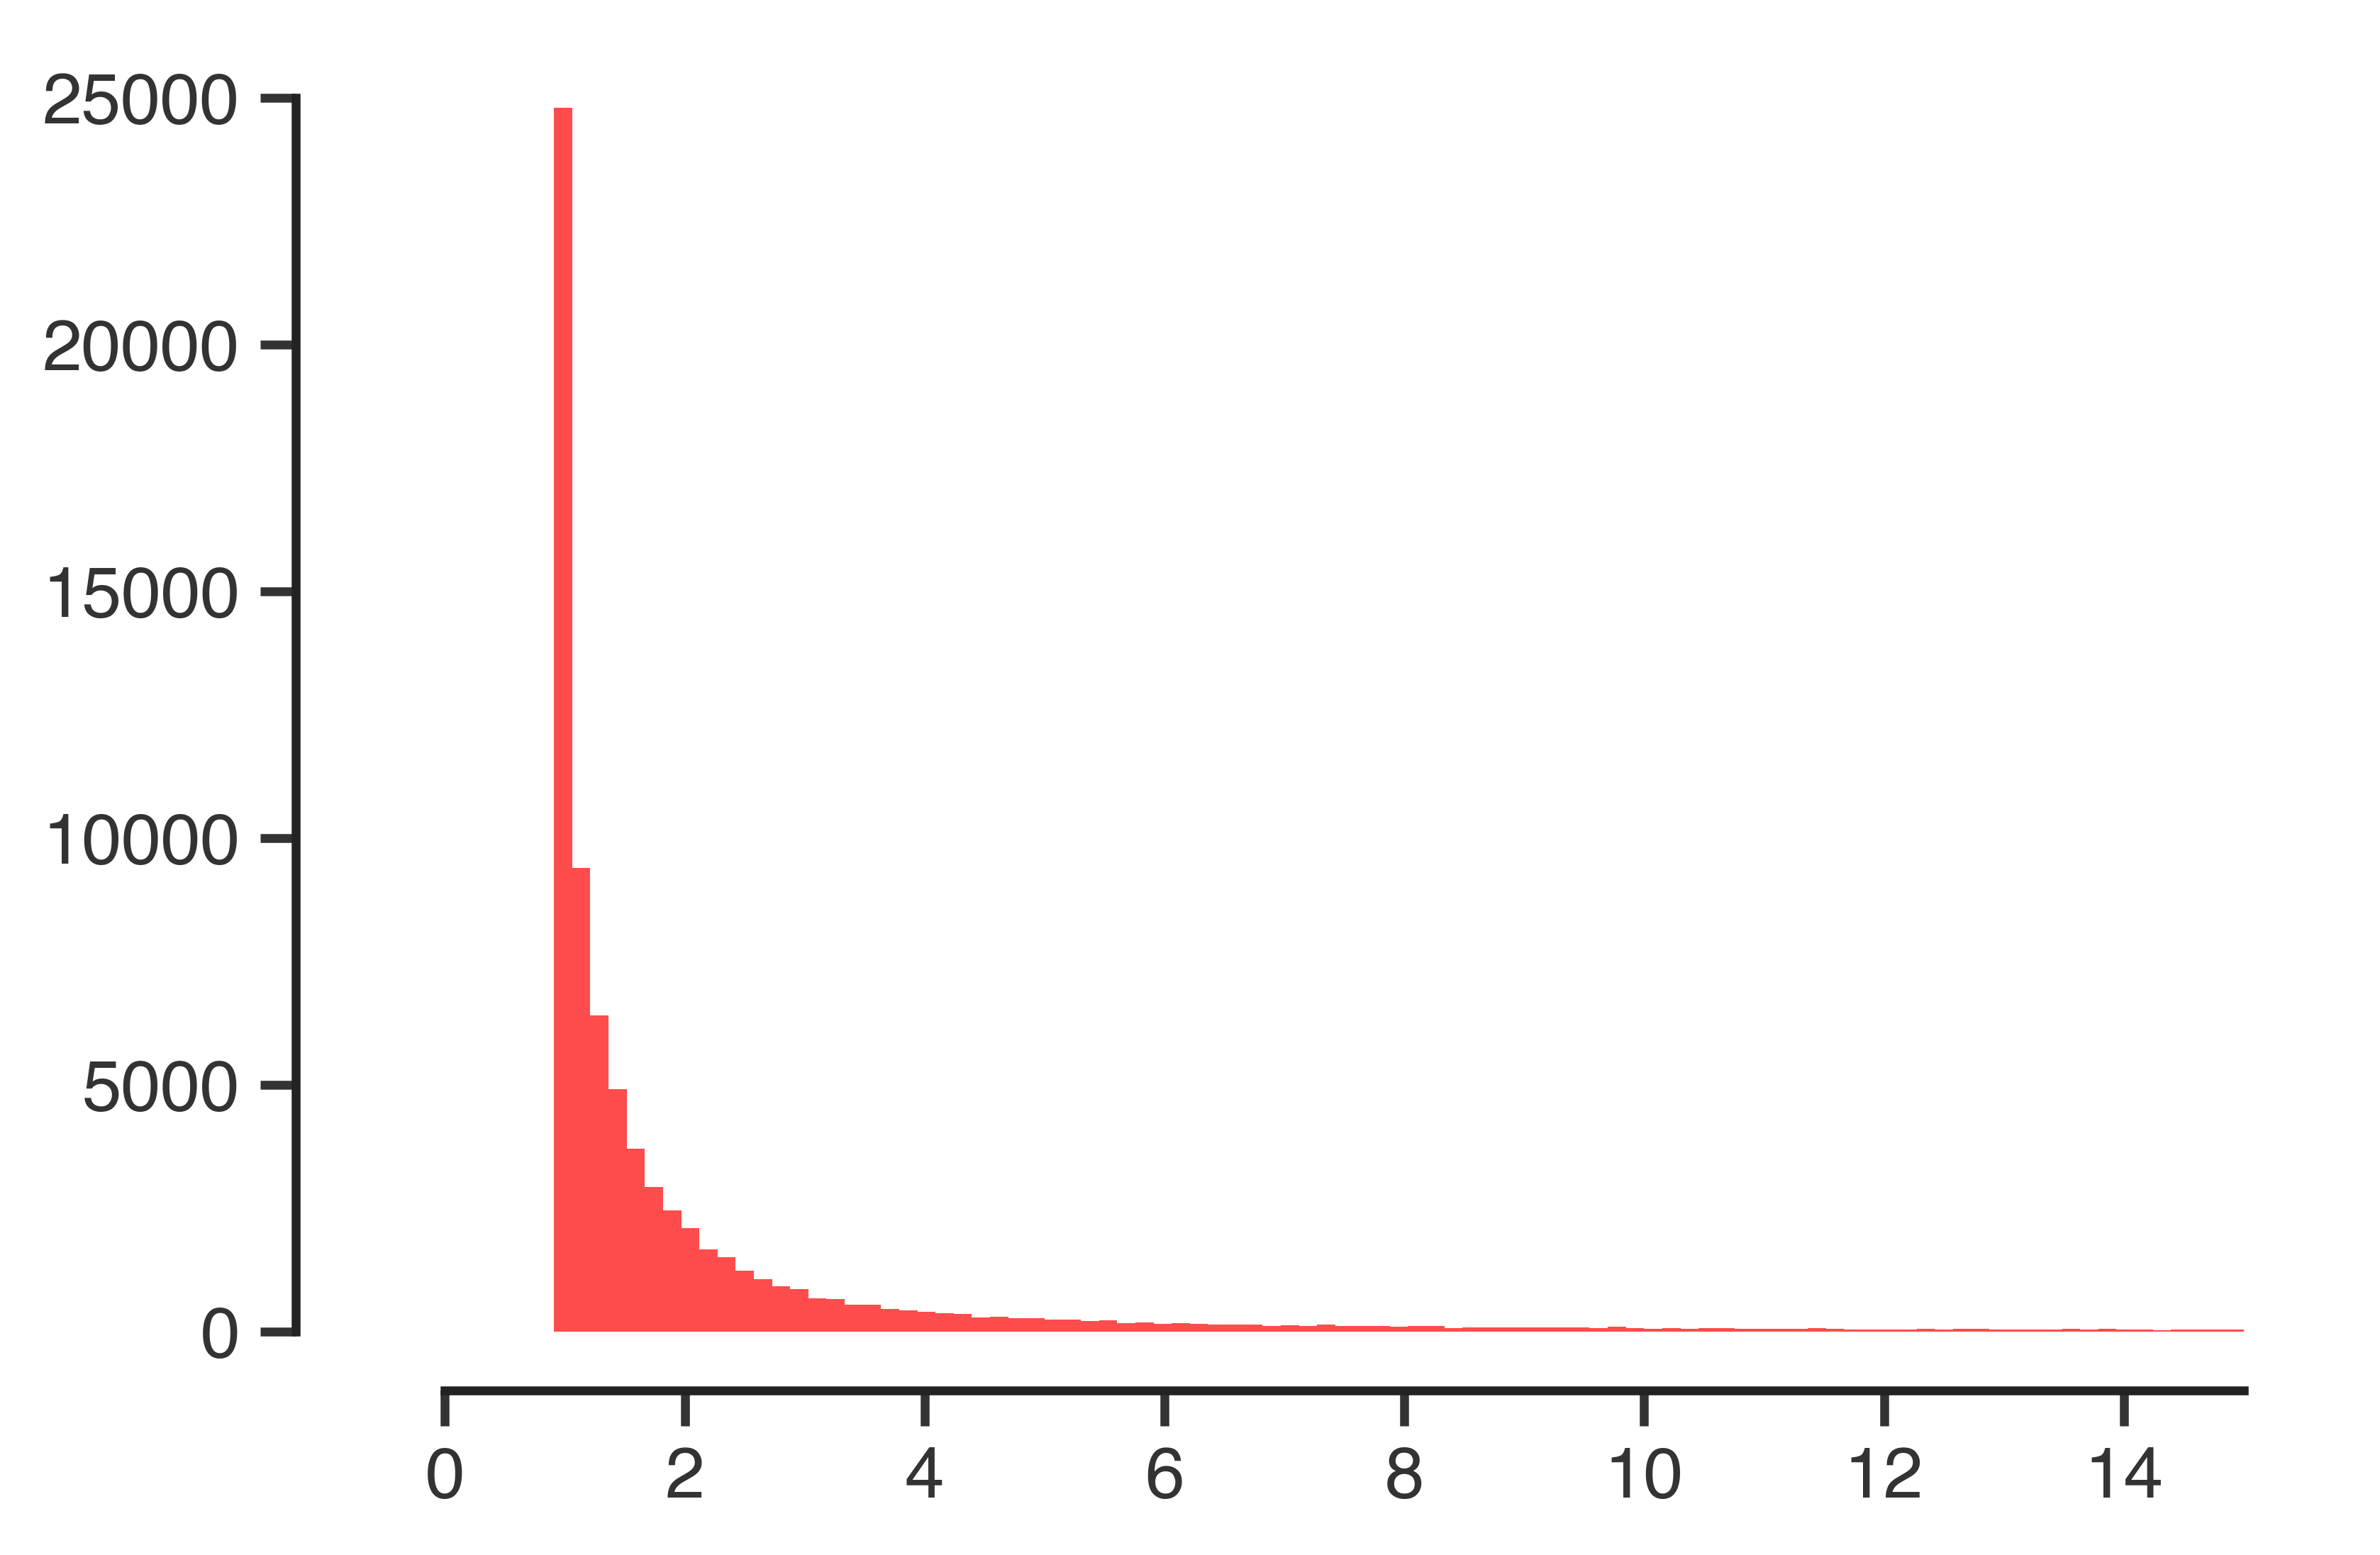

In [43]:
all_nlls = np.array([neg_ll[v] for v in variables]).flatten()

bins = np.linspace(0,15,100)
count, bins = np.histogram(all_nlls, bins=bins)
bin_width = np.mean(np.diff(bins))

plt.bar(bins[:-1] + bin_width/2.0, count, width=bin_width, color='r', alpha=0.7)
# plt.xscale('log')
plotting.adjust_spines(plt.gca())

# Sum of log likelihoods (aka product of likelihoods)  
(and max)

In [44]:
sum_neg_ll = collections.defaultdict(list)
max_neg_ll = collections.defaultdict(list)
# fit gaussian to control data for each variable!
# but wait, we don't have to! we already normalized
standard_normal = ss.norm(loc=0., scale=1.0)

for v in variables:
    neg_logpdf = -standard_normal.logpdf(normalized_experimental[v])
    sum_neg_ll[v] = np.sum(neg_logpdf)
    max_neg_ll[v] = np.max(neg_logpdf)

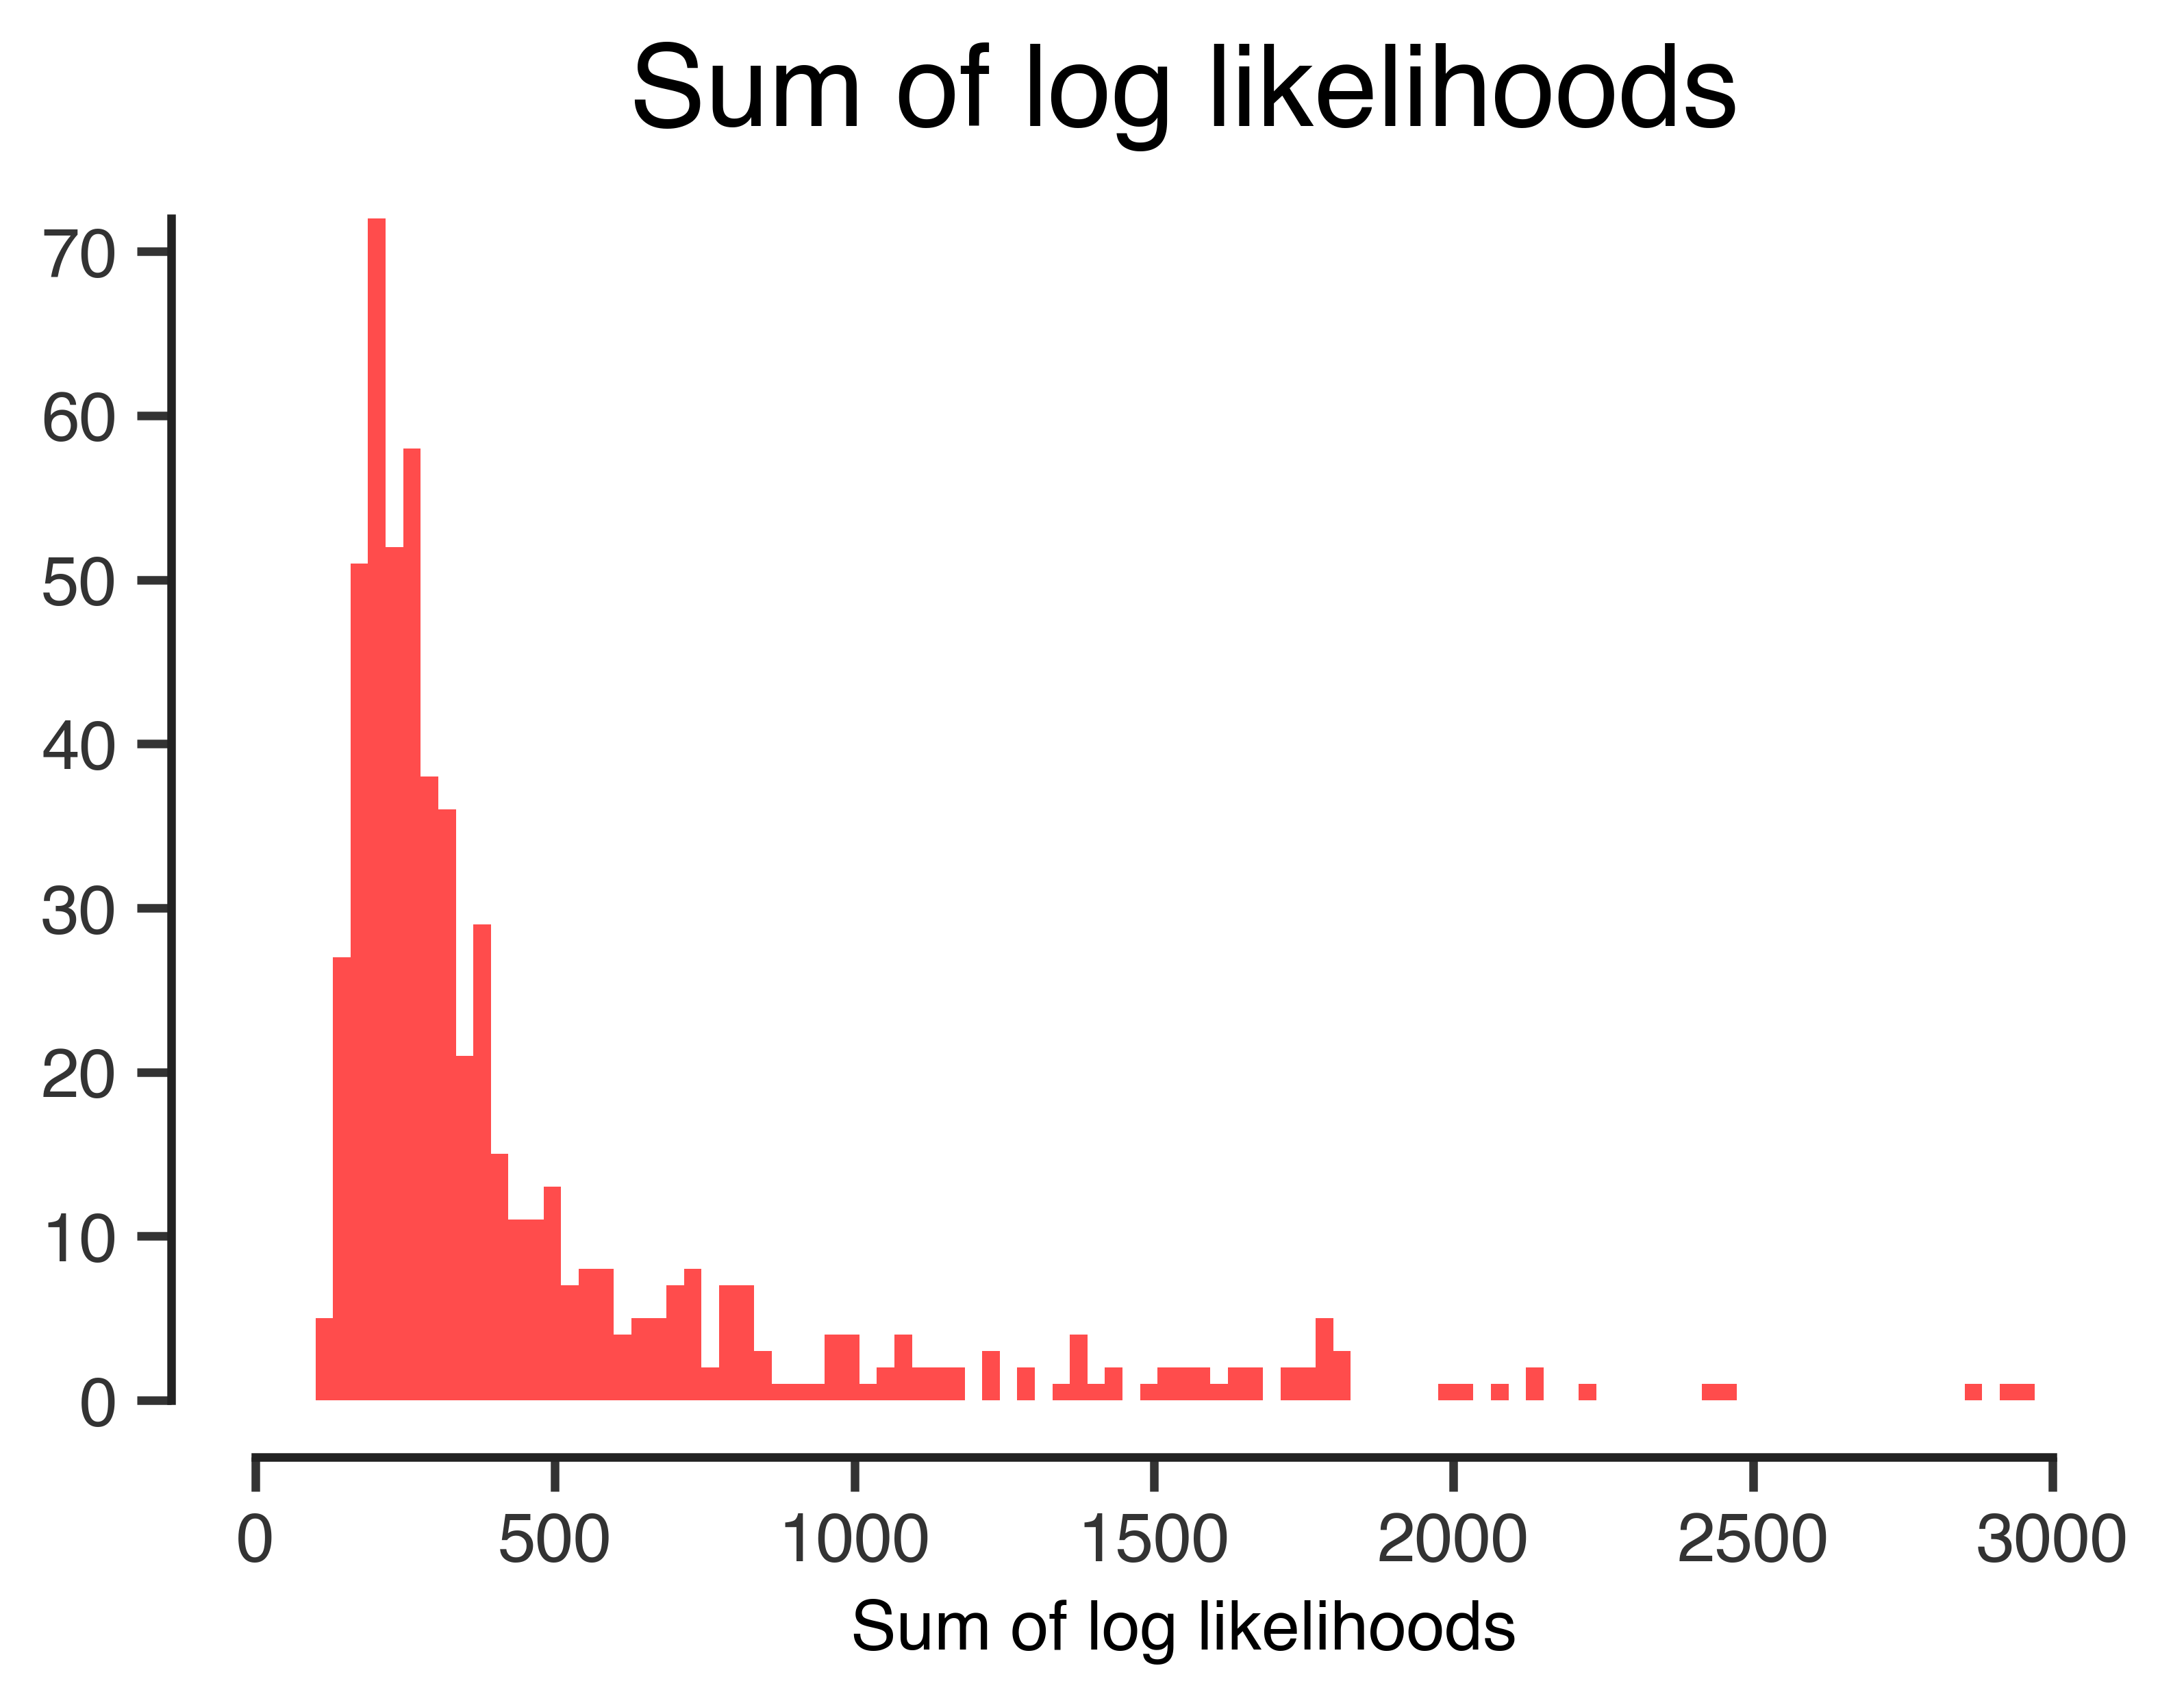

In [45]:
sum_nlls = np.array([sum_neg_ll[v] for v in variables]).flatten()
# max_nlls = np.array([max_neg_ll[v] for v in variables]).flatten()


bins = np.linspace(100,3000,100)
count, bins = np.histogram(sum_nlls, bins=bins)
bin_width = np.mean(np.diff(bins))

plt.bar(bins[:-1] + bin_width/2.0, count, width=bin_width, color='r', alpha=0.7)
# plt.xscale('log')
plotting.adjust_spines(plt.gca())
plt.title('Sum of log likelihoods')
plt.xlabel('Sum of log likelihoods')

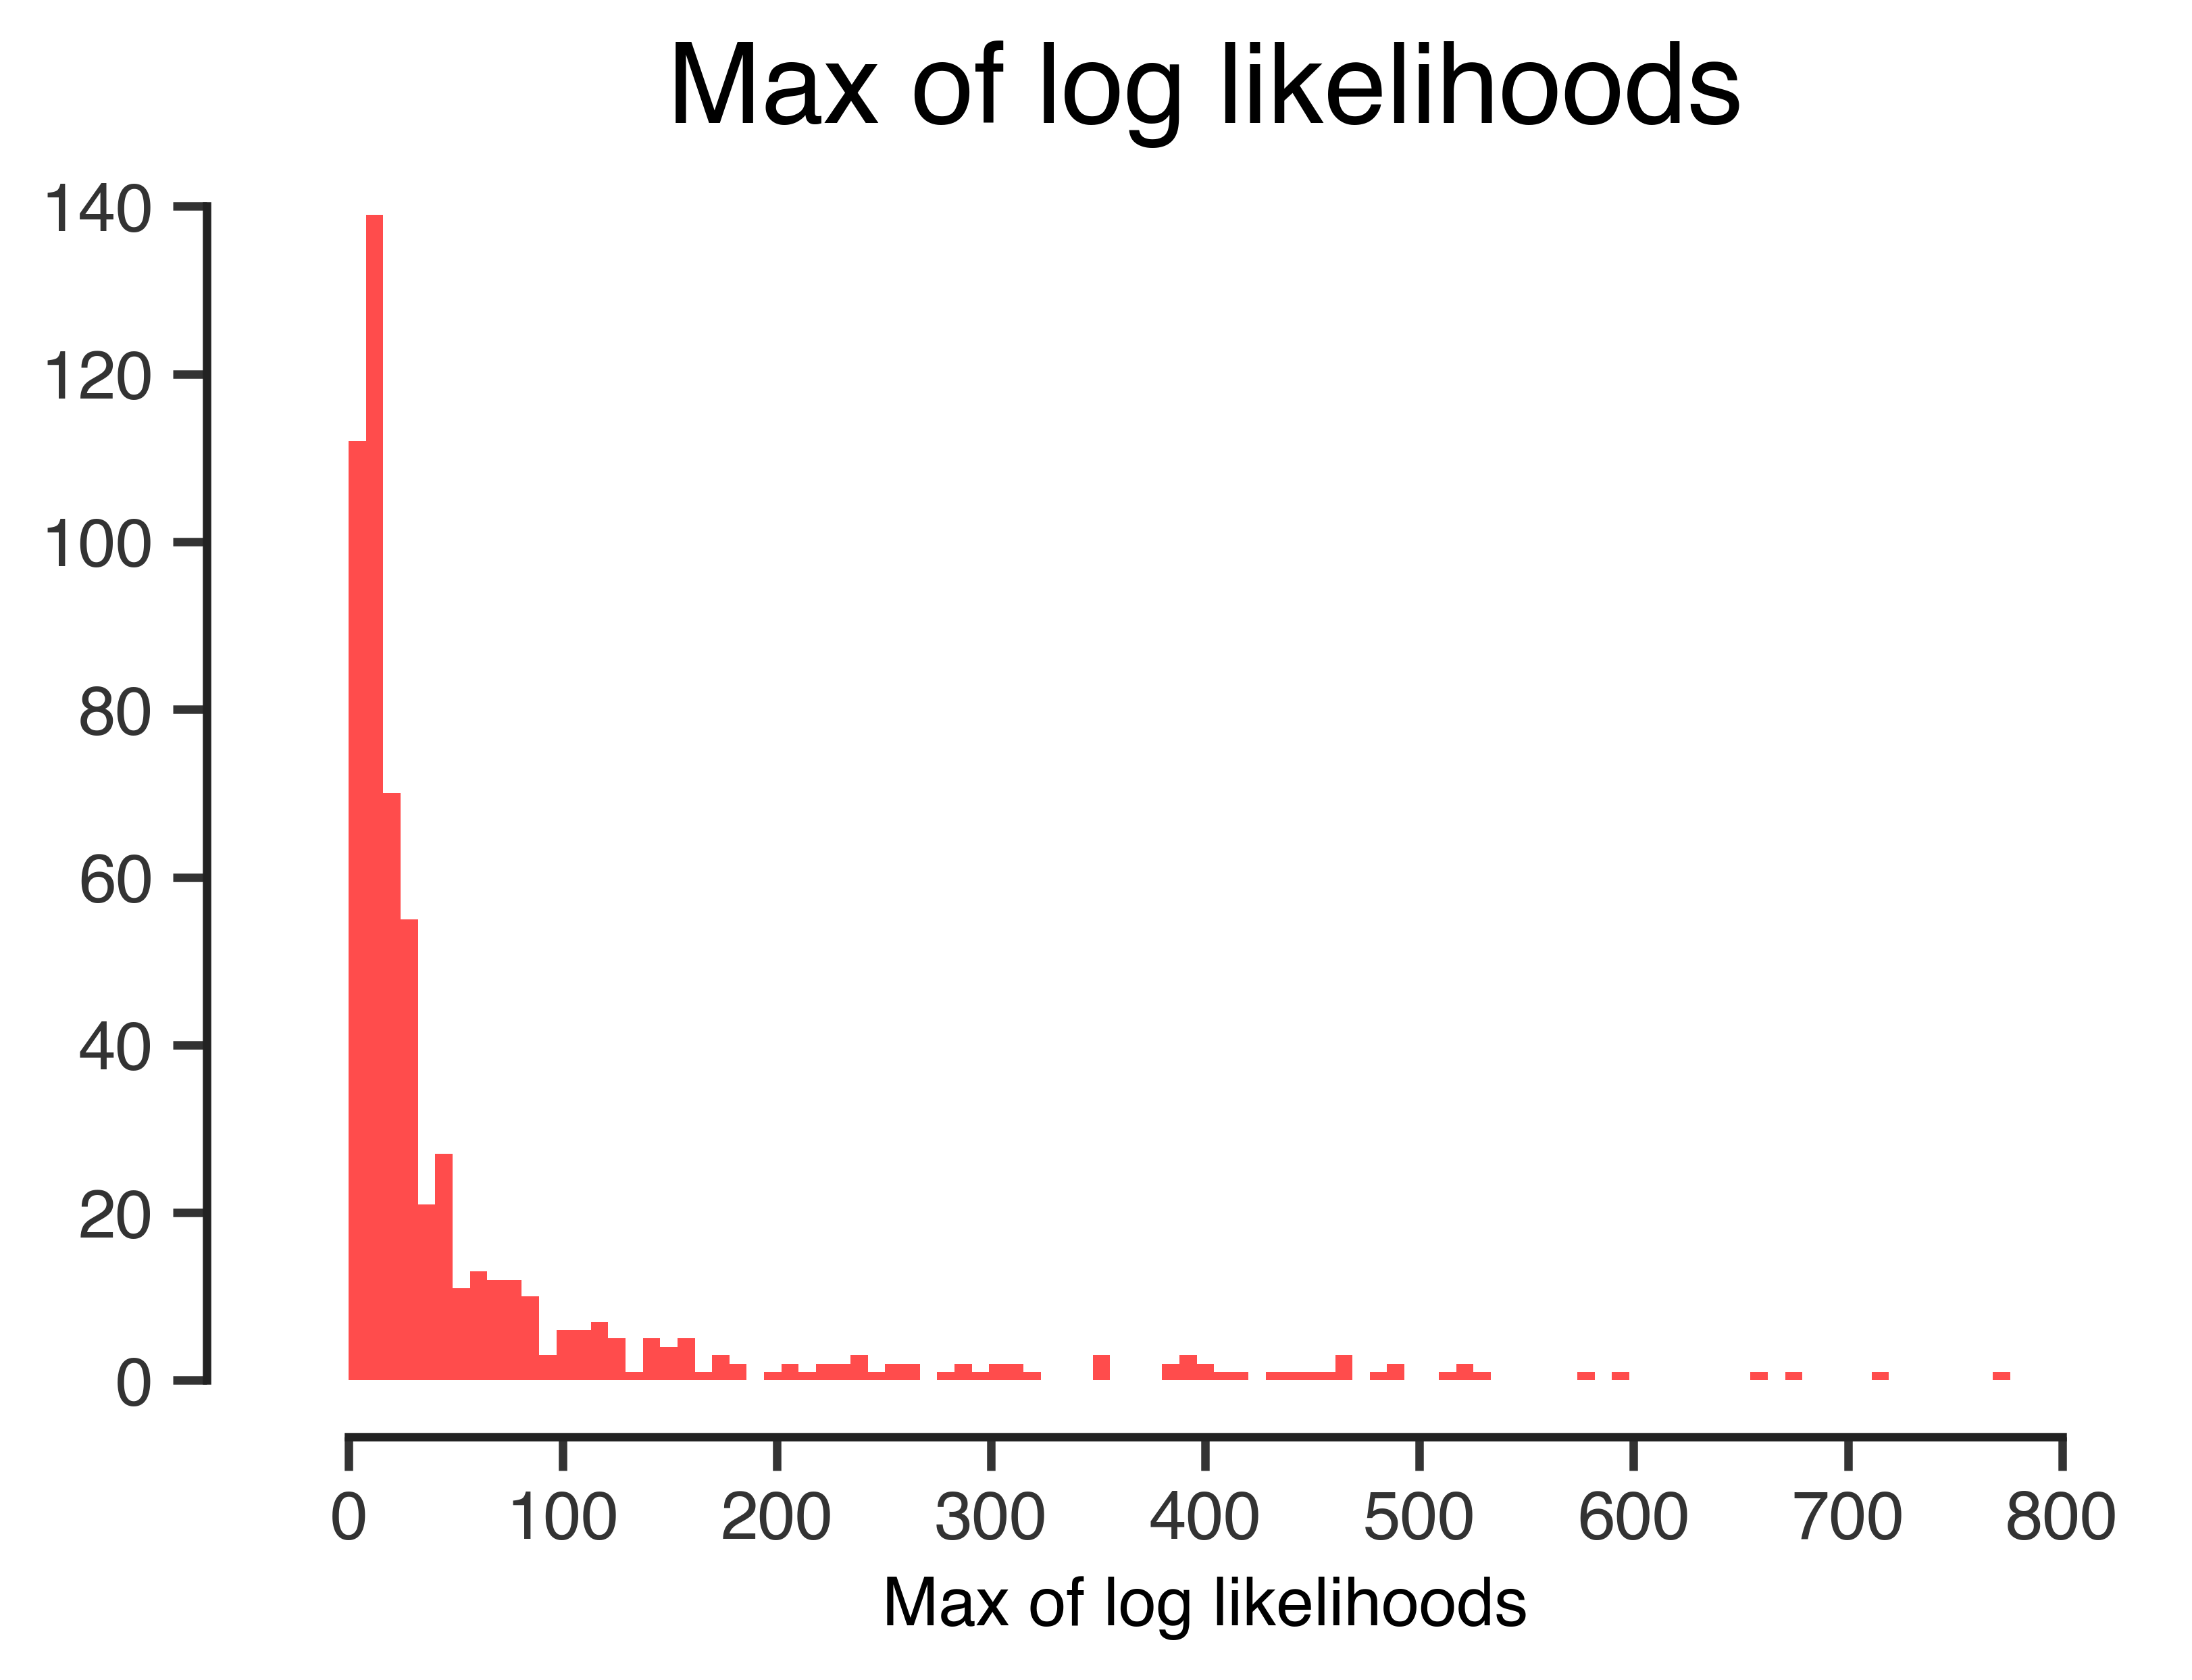

In [46]:
max_nlls = np.array([max_neg_ll[v] for v in variables]).flatten()
# max_nlls = np.array([max_neg_ll[v] for v in variables]).flatten()


bins = np.linspace(0,800,100)
count, bins = np.histogram(max_nlls, bins=bins)
bin_width = np.mean(np.diff(bins))

plt.bar(bins[:-1] + bin_width/2.0, count, width=bin_width, color='r', alpha=0.7)
# plt.xscale('log')
plotting.adjust_spines(plt.gca())
plt.title('Max of log likelihoods')
plt.xlabel('Max of log likelihoods')

In [47]:
import operator

In [48]:
least_likely_data = sorted(sum_neg_ll.items(), key=operator.itemgetter(1), reverse=True)

In [49]:
for i in range(10):
    print(least_likely_data[i])

('itaconate', 810230.33516927483)
('ALT', 214907.65286574414)
('IFN-g', 160192.35013916669)
('Erythrocyte-B', 114381.71793760544)
('AST', 59145.876309140127)
('orotate', 39470.331234565077)
('MCP-1', 33171.656903271105)
('methylsuccinate', 28122.900710049842)
('g/d T Cells', 26715.801465181976)
('IL-12P70', 23474.289876918501)


In [50]:
least_likely_max_data = sorted(max_neg_ll.items(), key=operator.itemgetter(1), reverse=True)

In [51]:
for i in range(10):
    print(least_likely_max_data[i])

('ALT', 82133.847392006996)
('itaconate', 80561.748939807425)
('IFN-g', 30139.139566754569)
('AST', 25417.025016032429)
('IL-23', 19815.170565516546)
('IL-2', 16697.116178945191)
('IL-12P70', 11358.393886147958)
('formiminoglutamate', 10472.459249917343)
('Erythrocyte-B', 9100.3874418751966)
('IL-3', 7689.5385224384036)


# Part 2

## Look at distribution of control - is it normal?

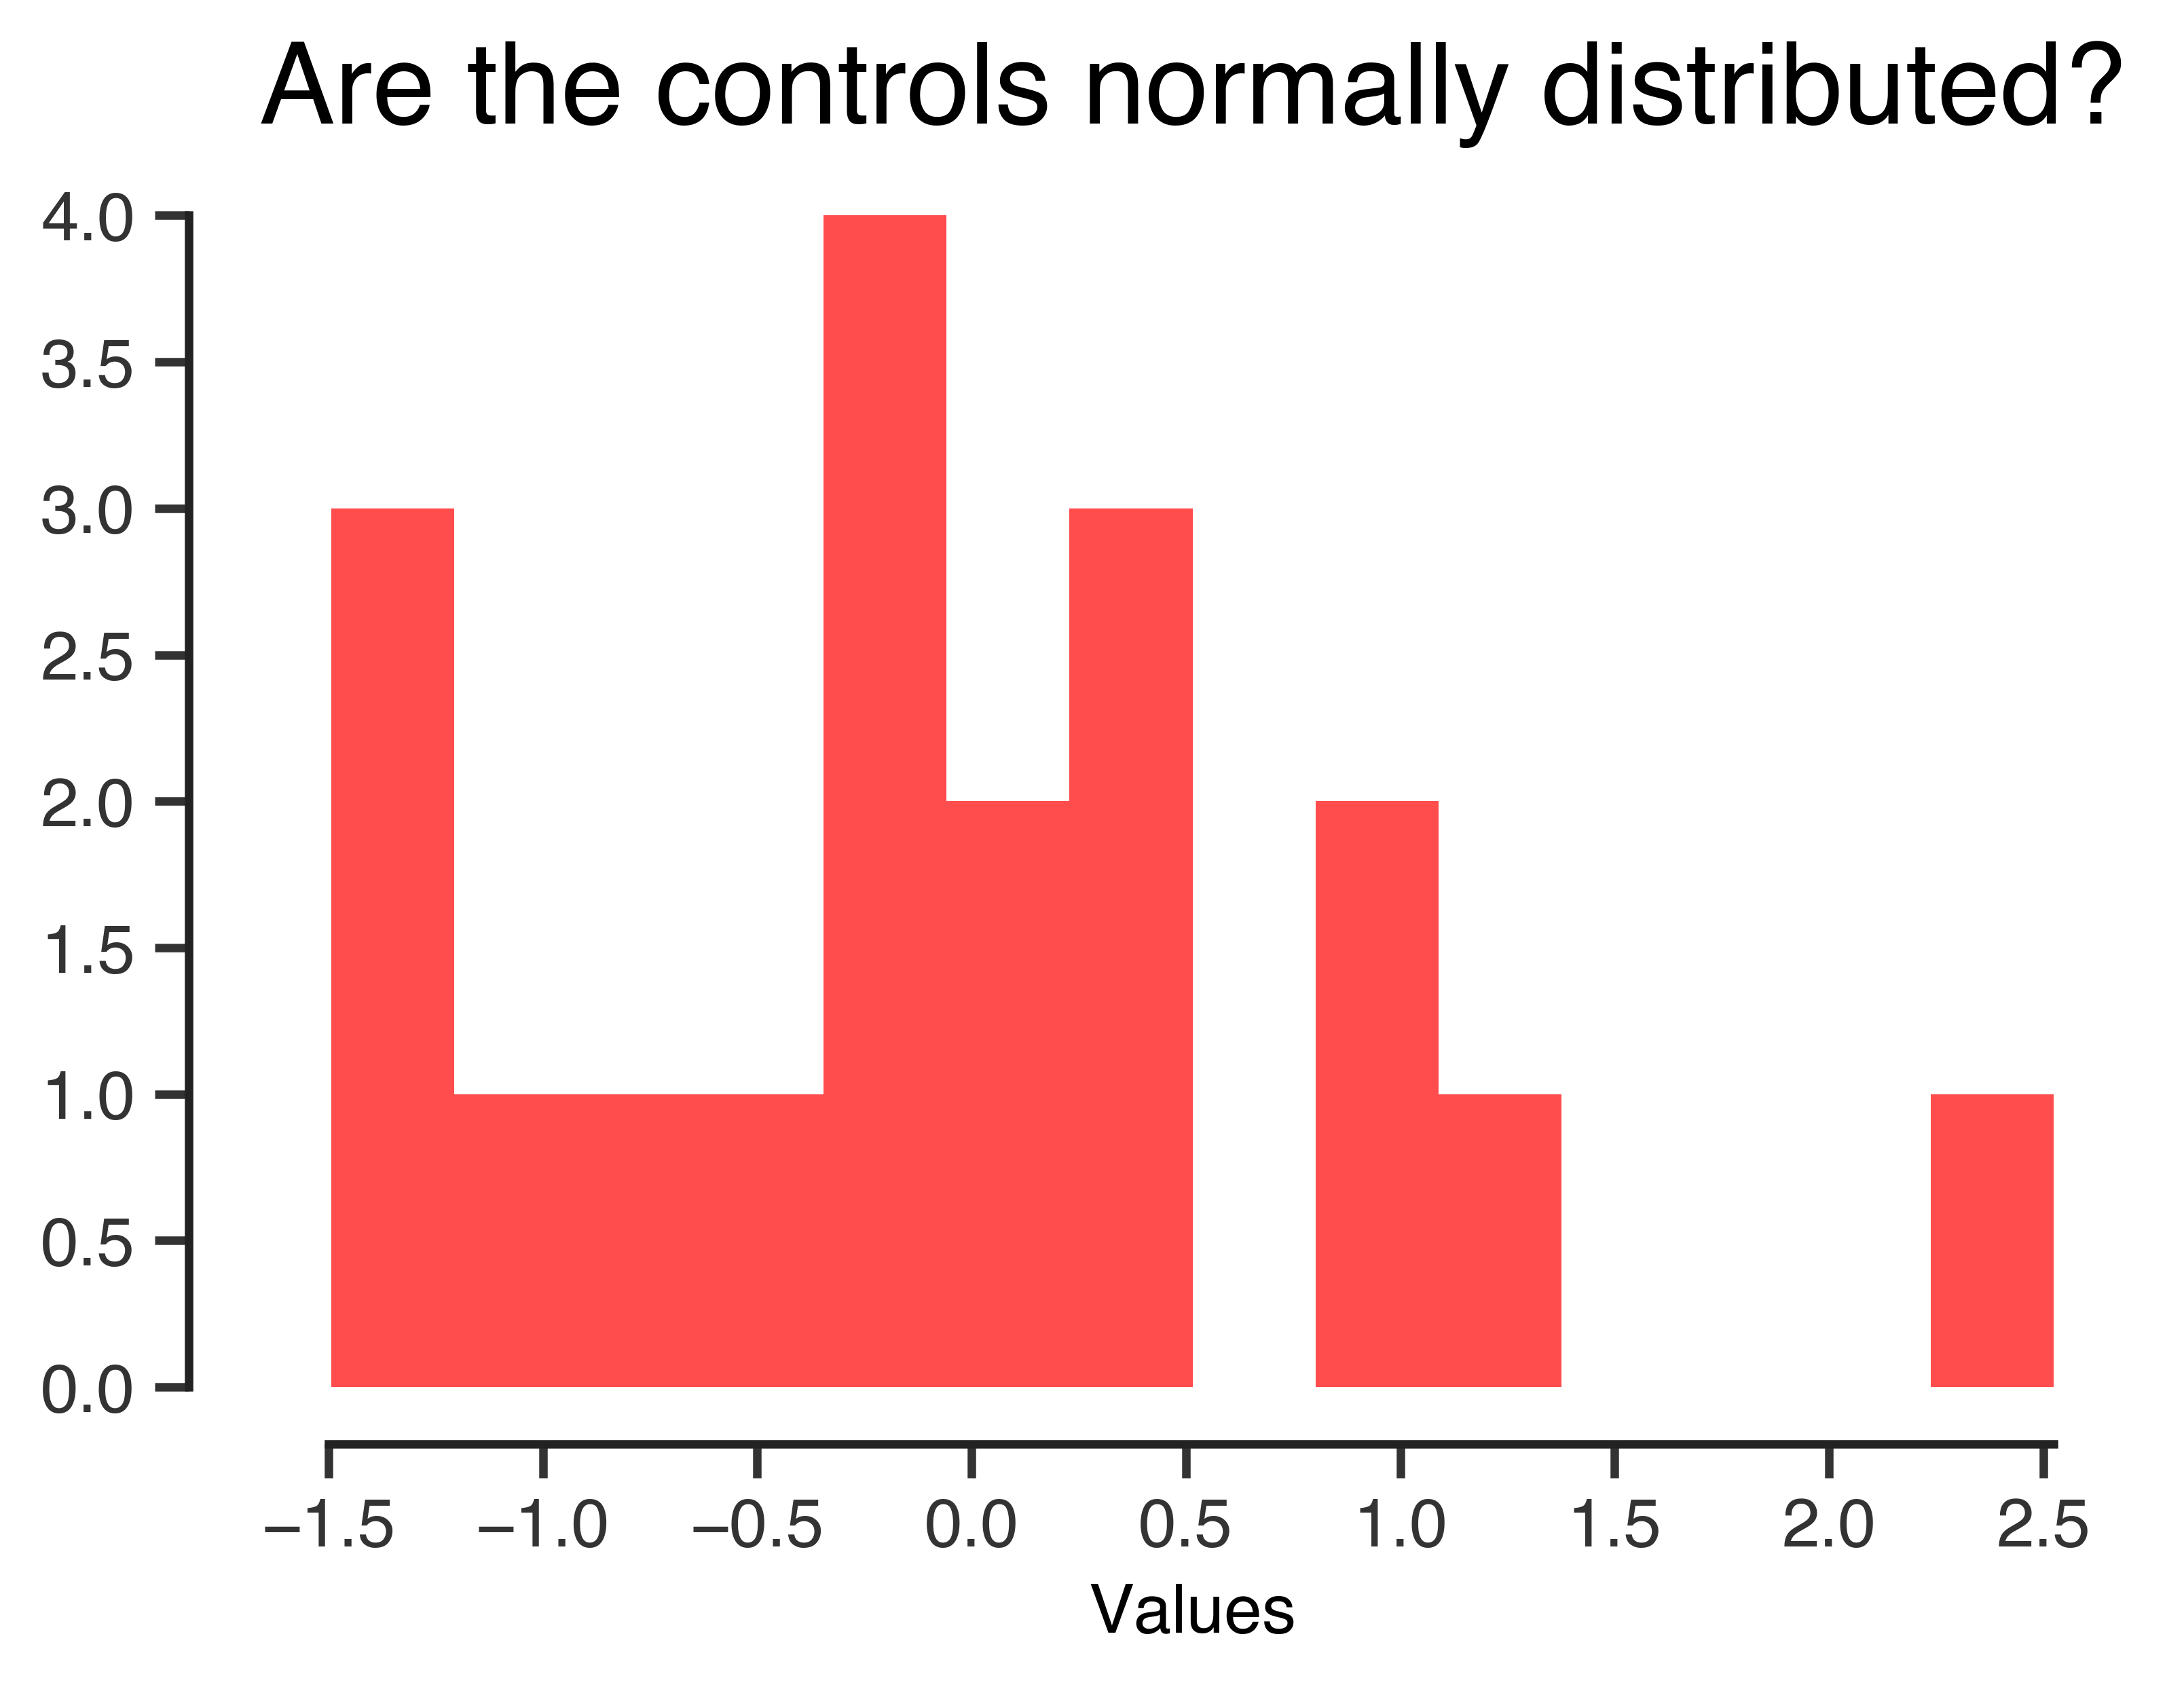

In [52]:
this_var = normalized_control[v]
this_var = this_var[~np.isnan(this_var)]
bins = np.linspace(np.nanmin(this_var),np.nanmax(this_var),15)

count, bins = np.histogram(this_var, bins=bins)
bin_width = np.mean(np.diff(bins))

plt.bar(bins[:-1] + bin_width/2.0, count, width=bin_width, color='r', alpha=0.7)
# plt.xscale('log')
plotting.adjust_spines(plt.gca())
plt.title('Are the controls normally distributed?')
plt.xlabel('Values')

In [53]:
this_var = normalized_control[v]
this_var = this_var[~np.isnan(this_var)]
this_fit = ss.gamma.fit(this_var)
print(this_fit)

(5.7093991368344241, -2.4648020650476239, 0.43170949885120019)


In [54]:
ss.gamma.pdf(this_var, *this_fit)

array([ 0.17120827,  0.32796377,  0.14564959,  0.28925443,  0.0304979 ,
        0.21102478,  0.39400996,  0.34608418,  0.17142975,  0.40106015,
        0.41414593,  0.19916859,  0.28941669,  0.39488455,  0.41409575,
        0.15116533,  0.39068838,  0.28747363,  0.36528619])

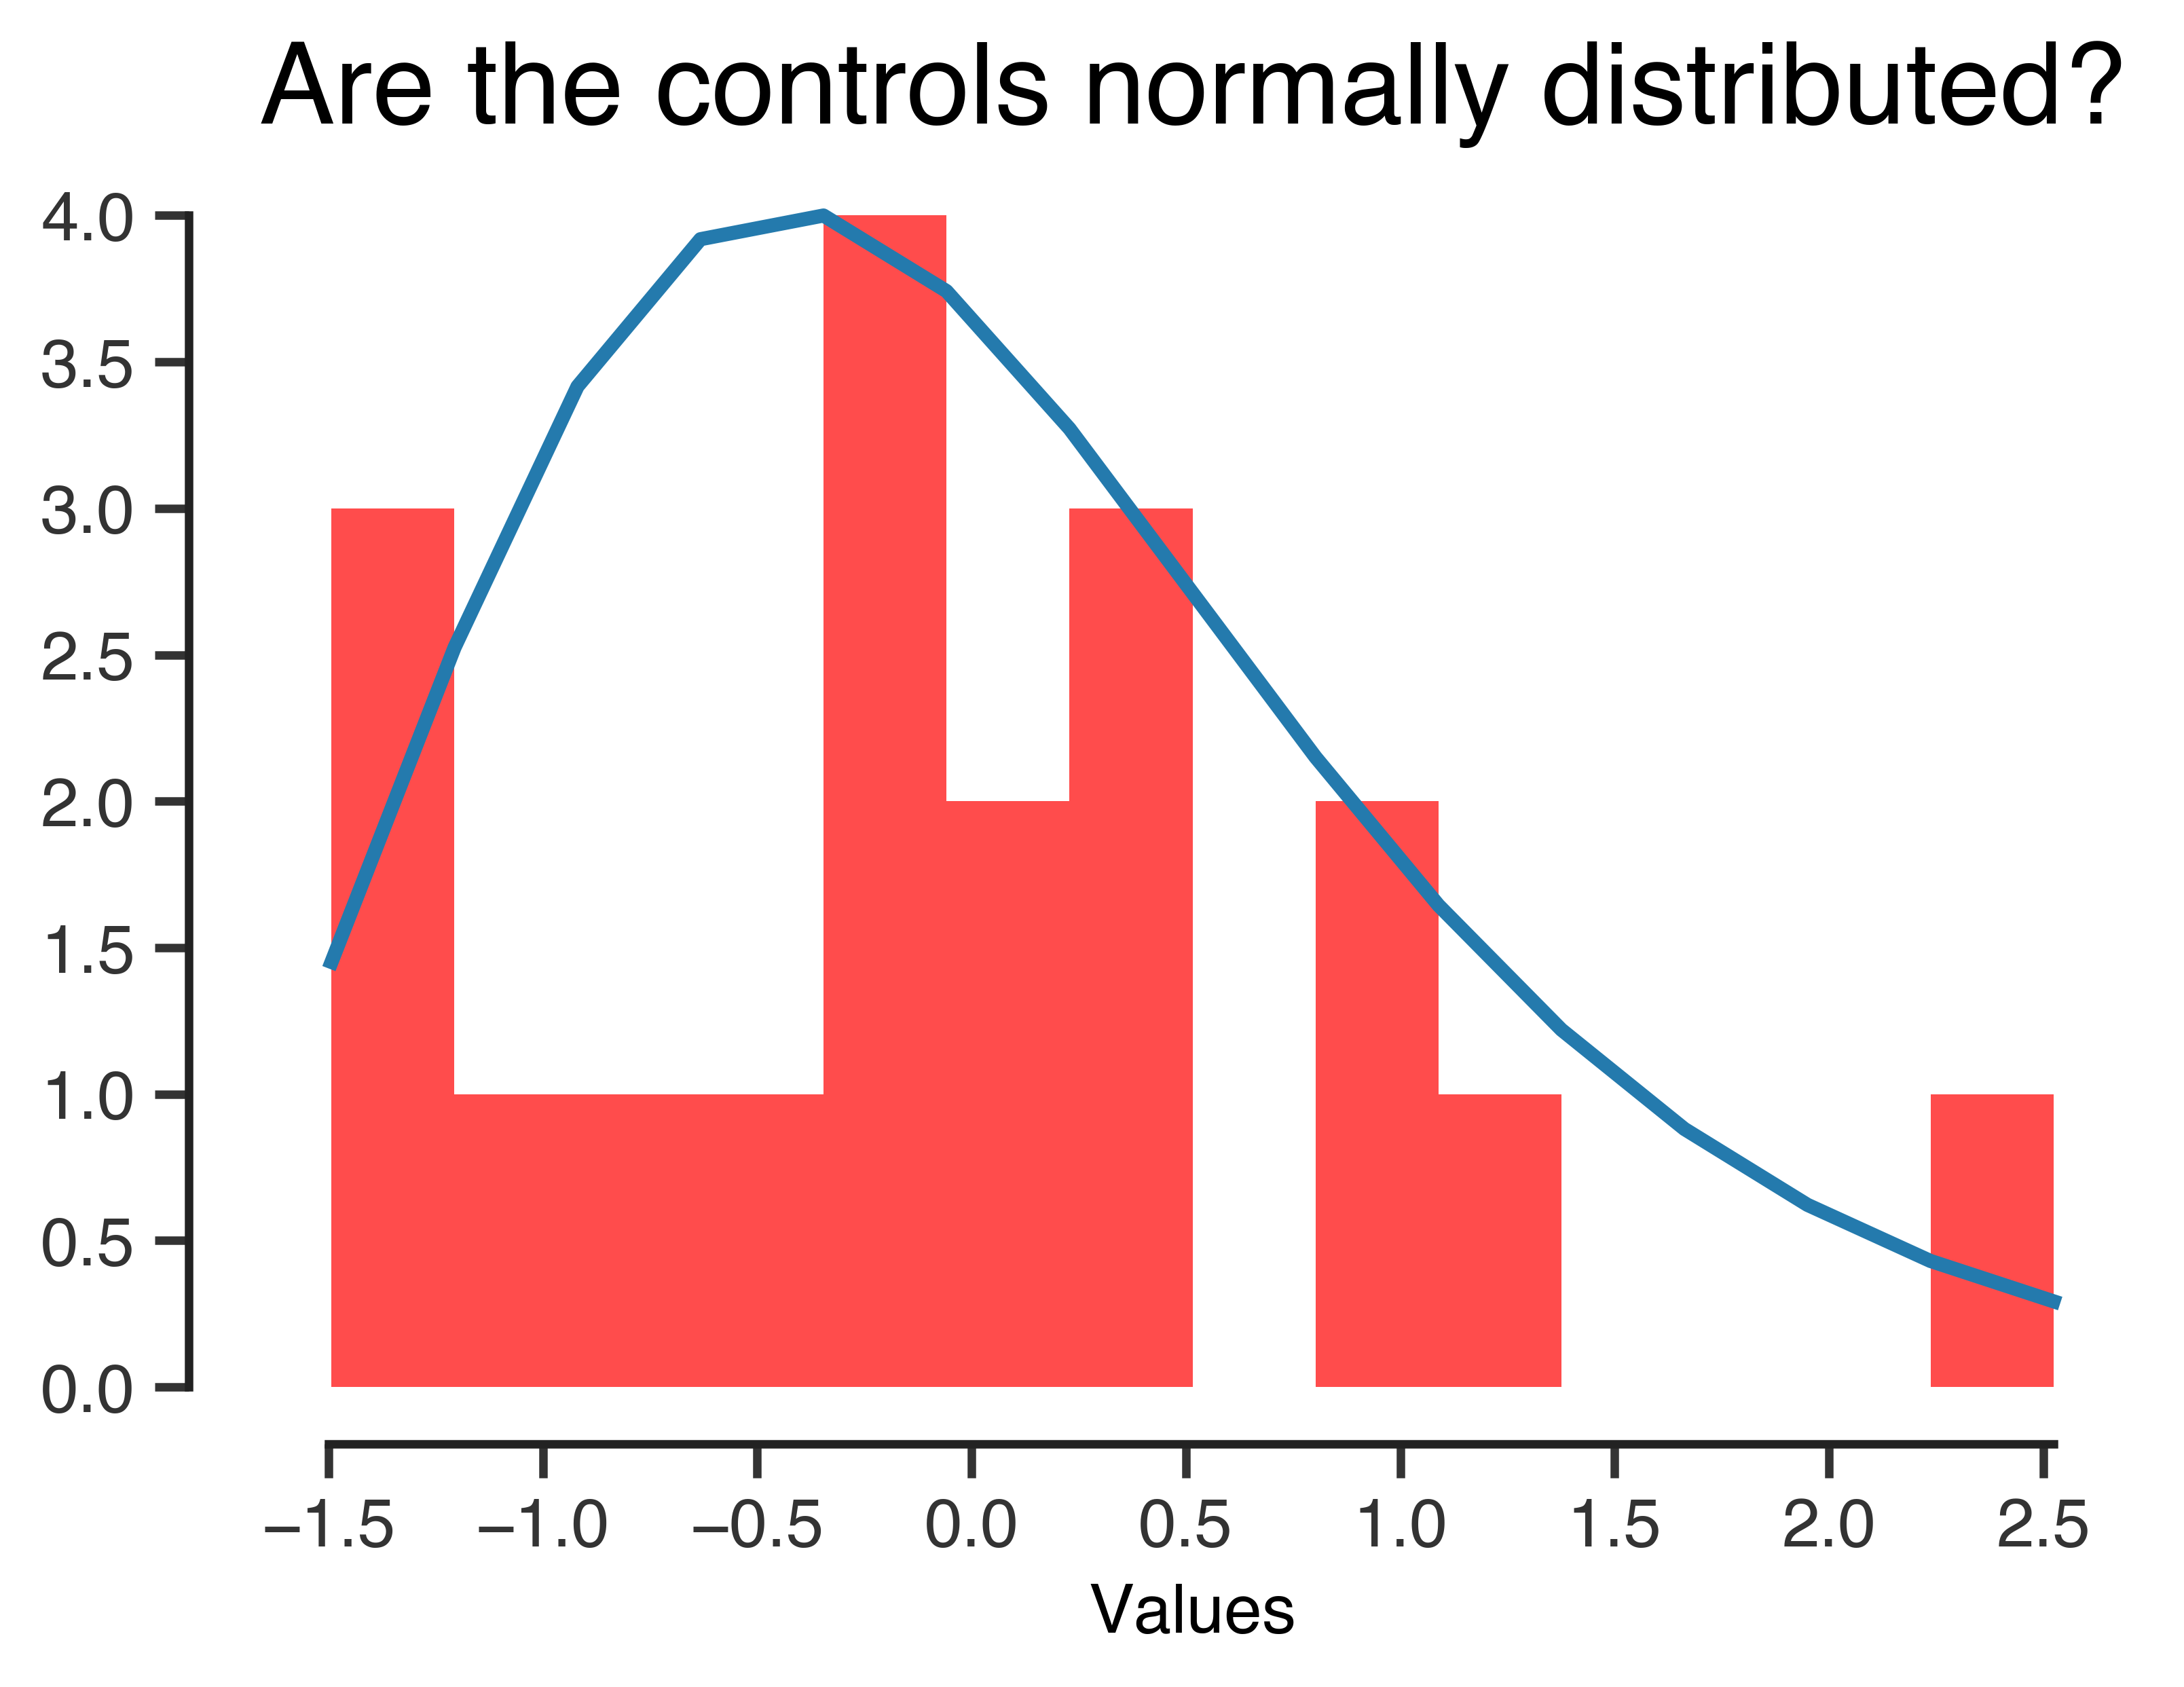

In [55]:
this_var = normalized_control[v]
this_var = this_var[~np.isnan(this_var)]

# fit it!
this_fit = ss.gamma.fit(this_var)
bins = np.linspace(np.nanmin(this_var),np.nanmax(this_var),15)
probs = ss.gamma.pdf(bins, *this_fit)

count, bins = np.histogram(this_var, bins=bins)
bin_width = np.mean(np.diff(bins))

plt.bar(bins[:-1] + bin_width/2.0, count, width=bin_width, color='r', alpha=0.7)
# plt.xscale('log')
plotting.adjust_spines(plt.gca())
plt.title('Are the controls normally distributed?')
plt.xlabel('Values')

# plt.plot(bins, probs, 'c')
plt.plot(bins, probs*np.max(count)/np.max(probs))

In [56]:
gamma_log_likelihoods = collections.defaultdict(list)
normal_log_likelihoods = collections.defaultdict(list)
for v in variables:
    this_var = normalized_control[v]
    this_var = this_var[~np.isnan(this_var)]
    gamma_fit = ss.gamma.fit(this_var)
    normal_fit = ss.norm.fit(this_var)
    
    gamma_log_likelihoods[v] = ss.gamma.logpdf(this_var, *gamma_fit)
    normal_log_likelihoods[v] = ss.norm.logpdf(this_var, *normal_fit)

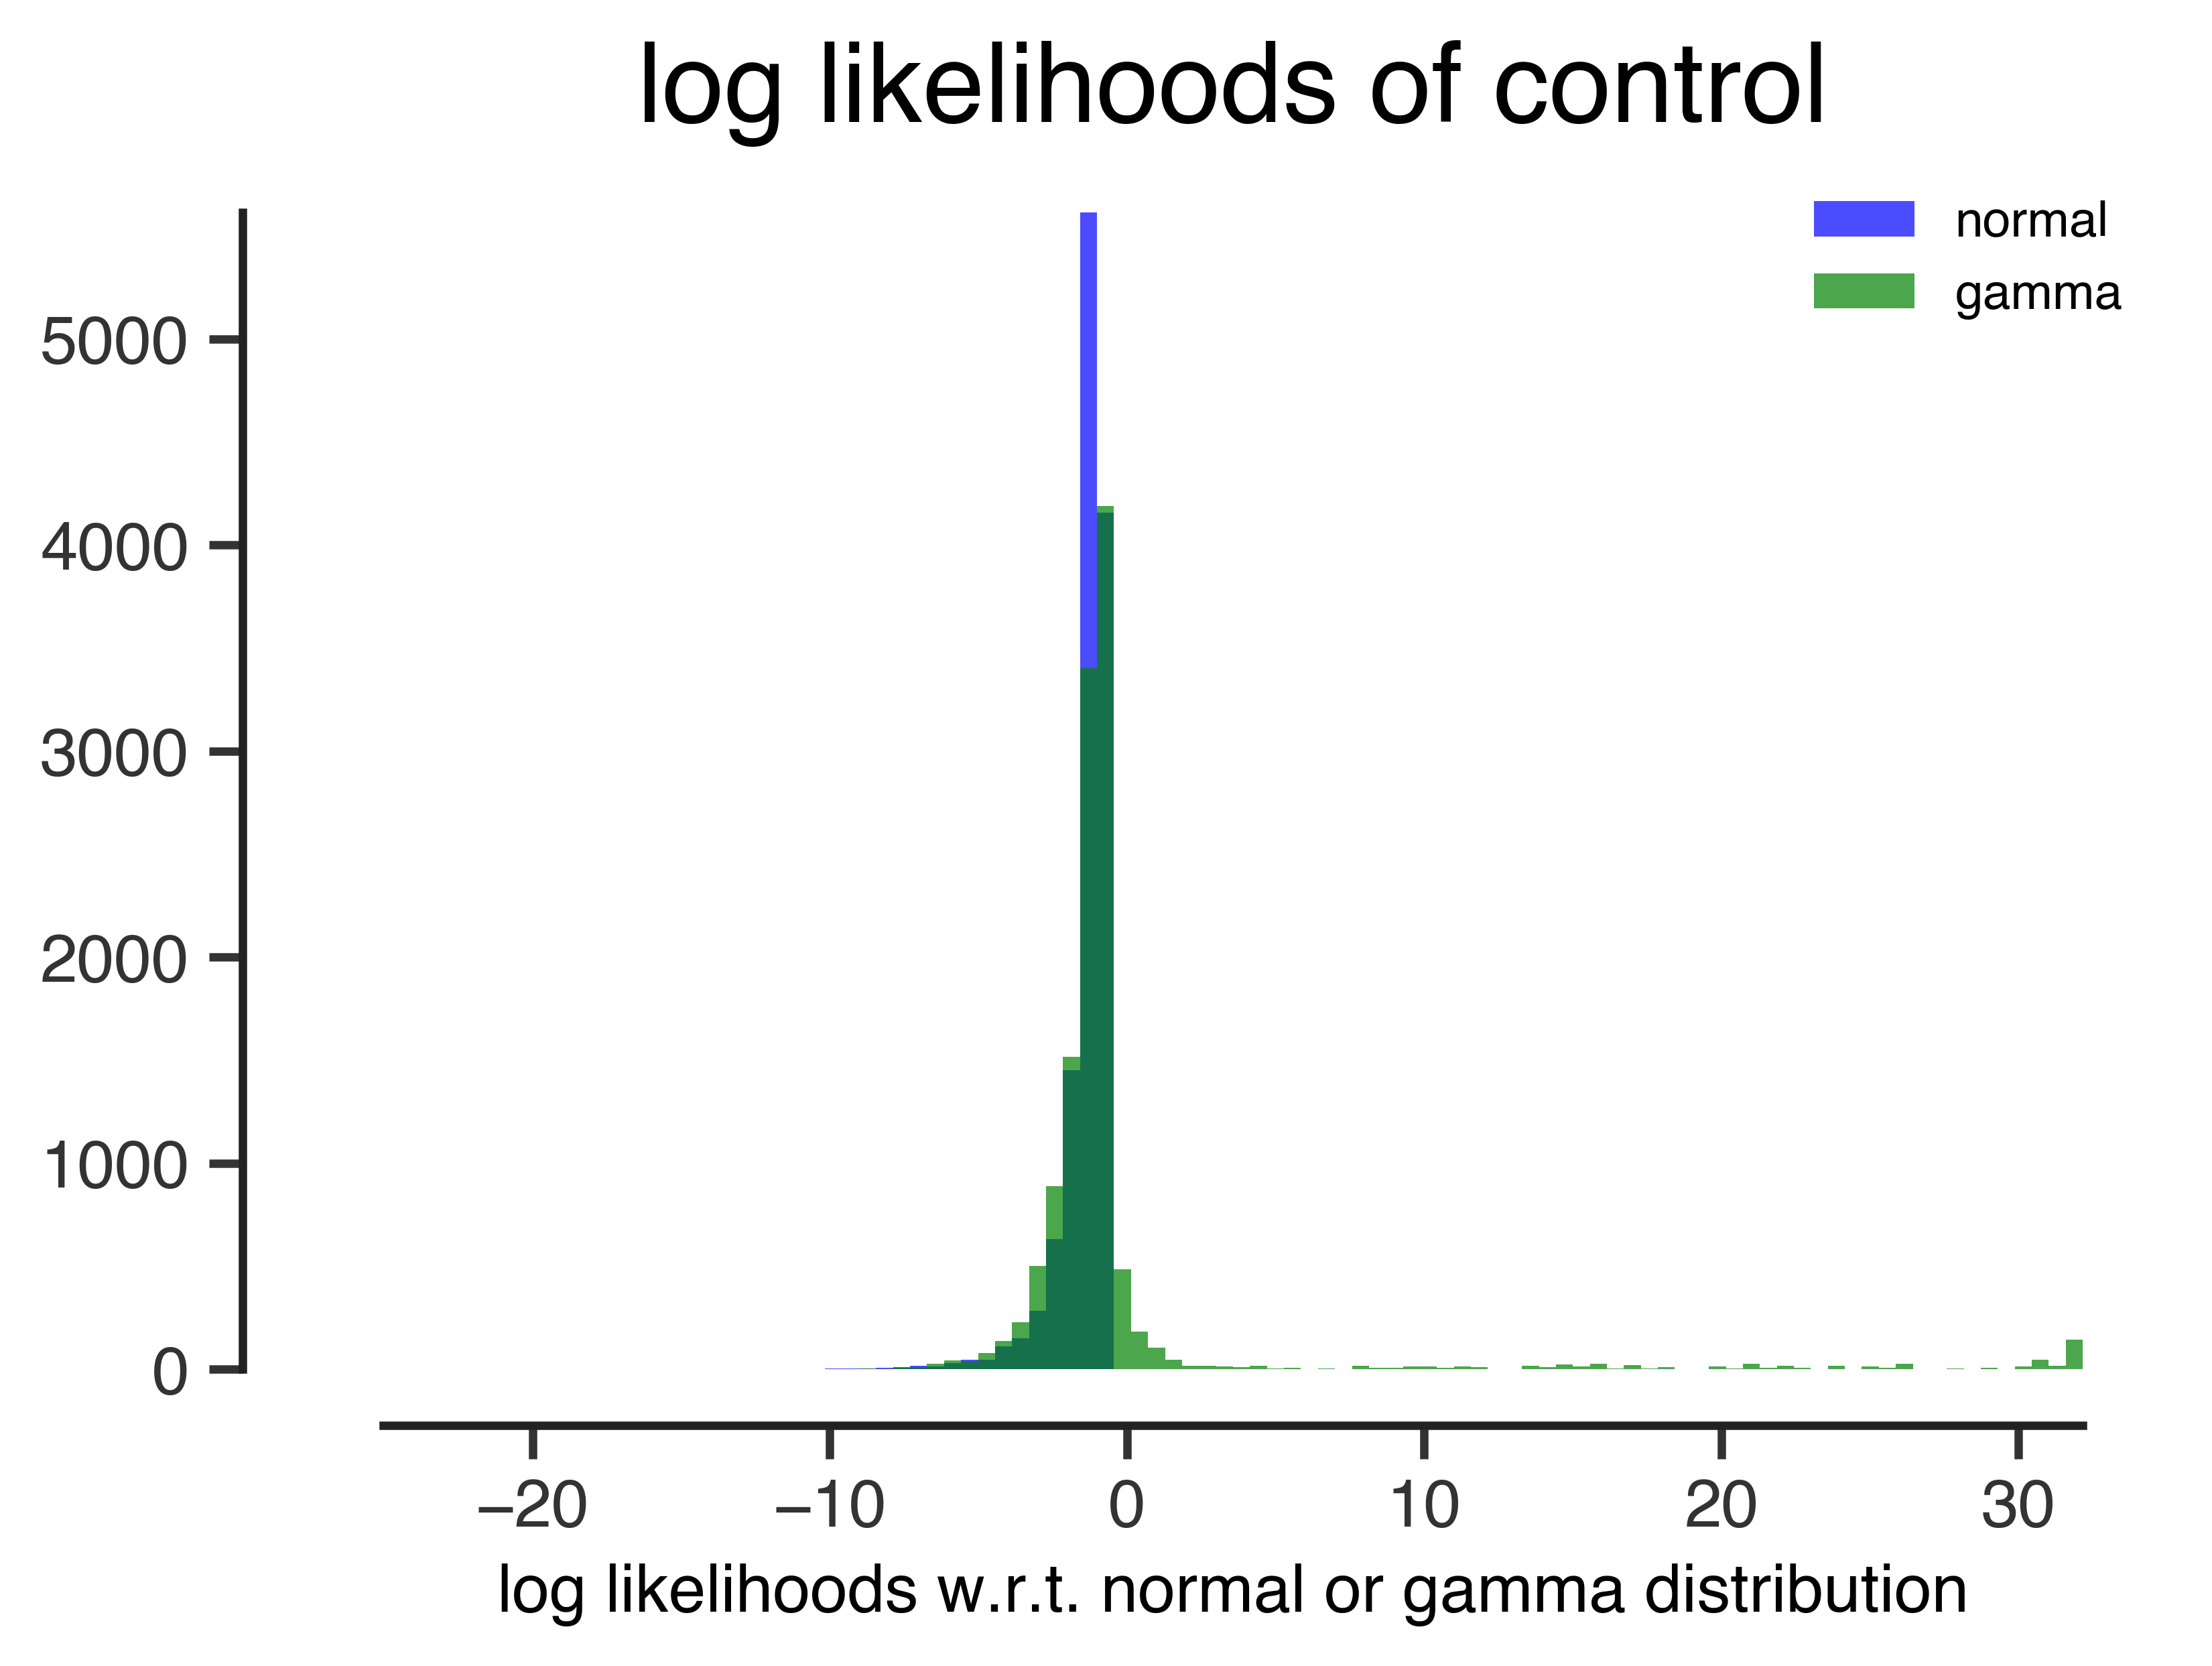

In [57]:
gamma_lls = []
normal_lls = []
for v in variables:
    gamma_lls.extend(gamma_log_likelihoods[v])
    normal_lls.extend(normal_log_likelihoods[v])

# bins = np.linspace(-7,0,100)
gamma_count, bins = np.histogram(gamma_lls, bins=100)
normal_count, bins = np.histogram(normal_lls, bins=bins)
bin_width = np.mean(np.diff(bins))

plt.bar(bins[:-1] + bin_width/2.0, normal_count, width=bin_width, color='b', alpha=0.7, label='normal')
plt.bar(bins[:-1] + bin_width/2.0, gamma_count, width=bin_width, color='g', alpha=0.7, label='gamma')
# plt.xscale('log')
plotting.adjust_spines(plt.gca())
plt.title('log likelihoods of control')
plt.xlabel('log likelihoods w.r.t. normal or gamma distribution')
plt.legend(frameon=False, fontsize=9)

In [58]:
print('Gamma distribution has mean %0.2f and median %0.2f log likelihood' %(np.mean(gamma_lls), np.median(gamma_lls)))
print('Normal distribution has mean %0.2f and median %0.2f log likelihood' %(np.mean(normal_lls), np.median(normal_lls)))

Gamma distribution has mean -0.23 and median -1.06 log likelihood
Normal distribution has mean -1.42 and median -1.13 log likelihood


In [59]:
print('Gamma distribution has max %0.2f and min %0.2f log likelihood' %(np.max(gamma_lls), np.min(gamma_lls)))
print('Normal distribution has max %0.2f and min %0.2f log likelihood' %(np.max(normal_lls), np.min(normal_lls)))

Gamma distribution has max 32.16 and min -25.03 log likelihood
Normal distribution has max -0.92 and min -28.92 log likelihood


In [60]:
np.sum(gamma_lls)

-2858.618548012706

In [61]:
np.sum(normal_lls)

-17847.408870648374

## Print list of experimental variables w.r.t. gamma distribution

In [62]:
gamma_sum_neg_ll = collections.defaultdict(list)
gamma_max_neg_ll = collections.defaultdict(list)
# fit gaussian to control data for each variable!
# but wait, we don't have to! we already normalized
# standard_normal = ss.norm(loc=0., scale=1.0)

for v in variables:
    these_vals = normalized_control[v]
    these_vals = these_vals[~np.isnan(these_vals)]
    this_gamma = ss.gamma.fit(these_vals)
    neg_logpdf = -ss.gamma.logpdf(normalized_experimental[v], *this_gamma)
    gamma_sum_neg_ll[v] = np.sum(neg_logpdf)
    gamma_max_neg_ll[v] = np.max(neg_logpdf)

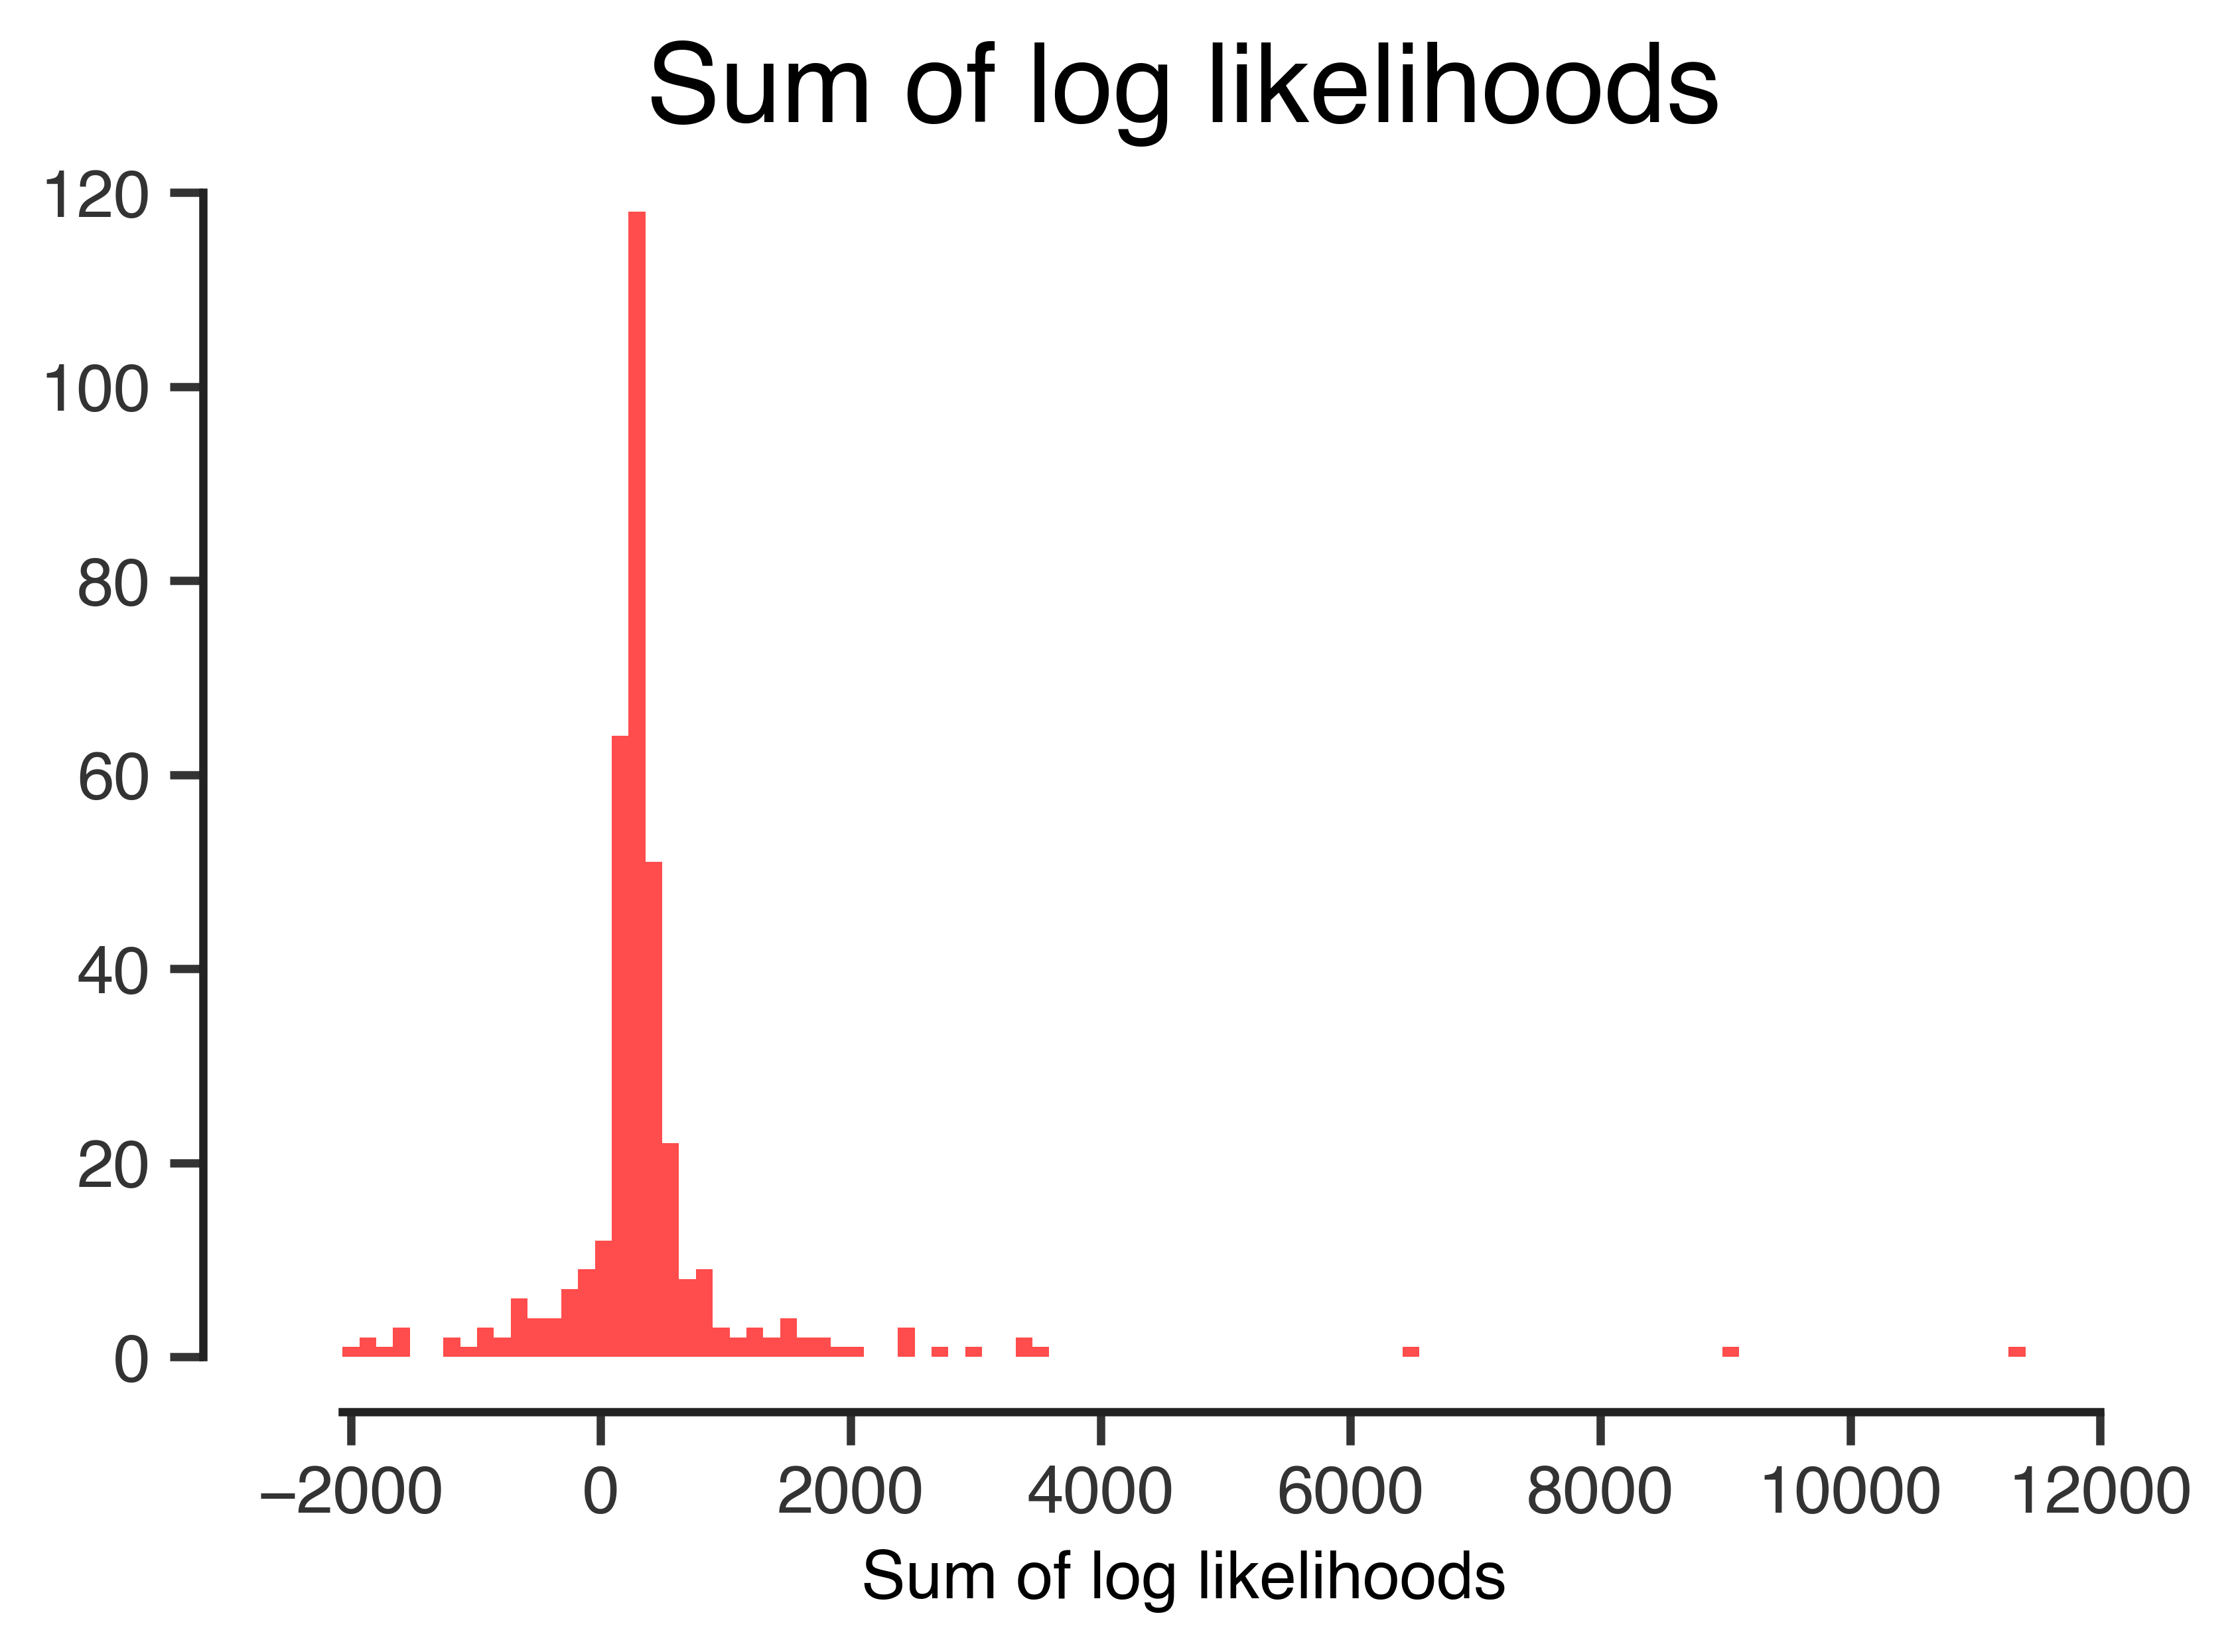

In [63]:
sum_nlls = np.array([gamma_sum_neg_ll[v] for v in variables if np.isfinite(gamma_sum_neg_ll[v])]).flatten()
sum_nlls = sum_nlls[~np.isnan(sum_nlls)]
# max_nlls = np.array([max_neg_ll[v] for v in variables]).flatten()


# bins = np.linspace(100,3000,100)
count, bins = np.histogram(sum_nlls, bins=100)
bin_width = np.mean(np.diff(bins))

plt.bar(bins[:-1] + bin_width/2.0, count, width=bin_width, color='r', alpha=0.7)
# plt.xscale('log')
plotting.adjust_spines(plt.gca())
plt.title('Sum of log likelihoods')
plt.xlabel('Sum of log likelihoods')

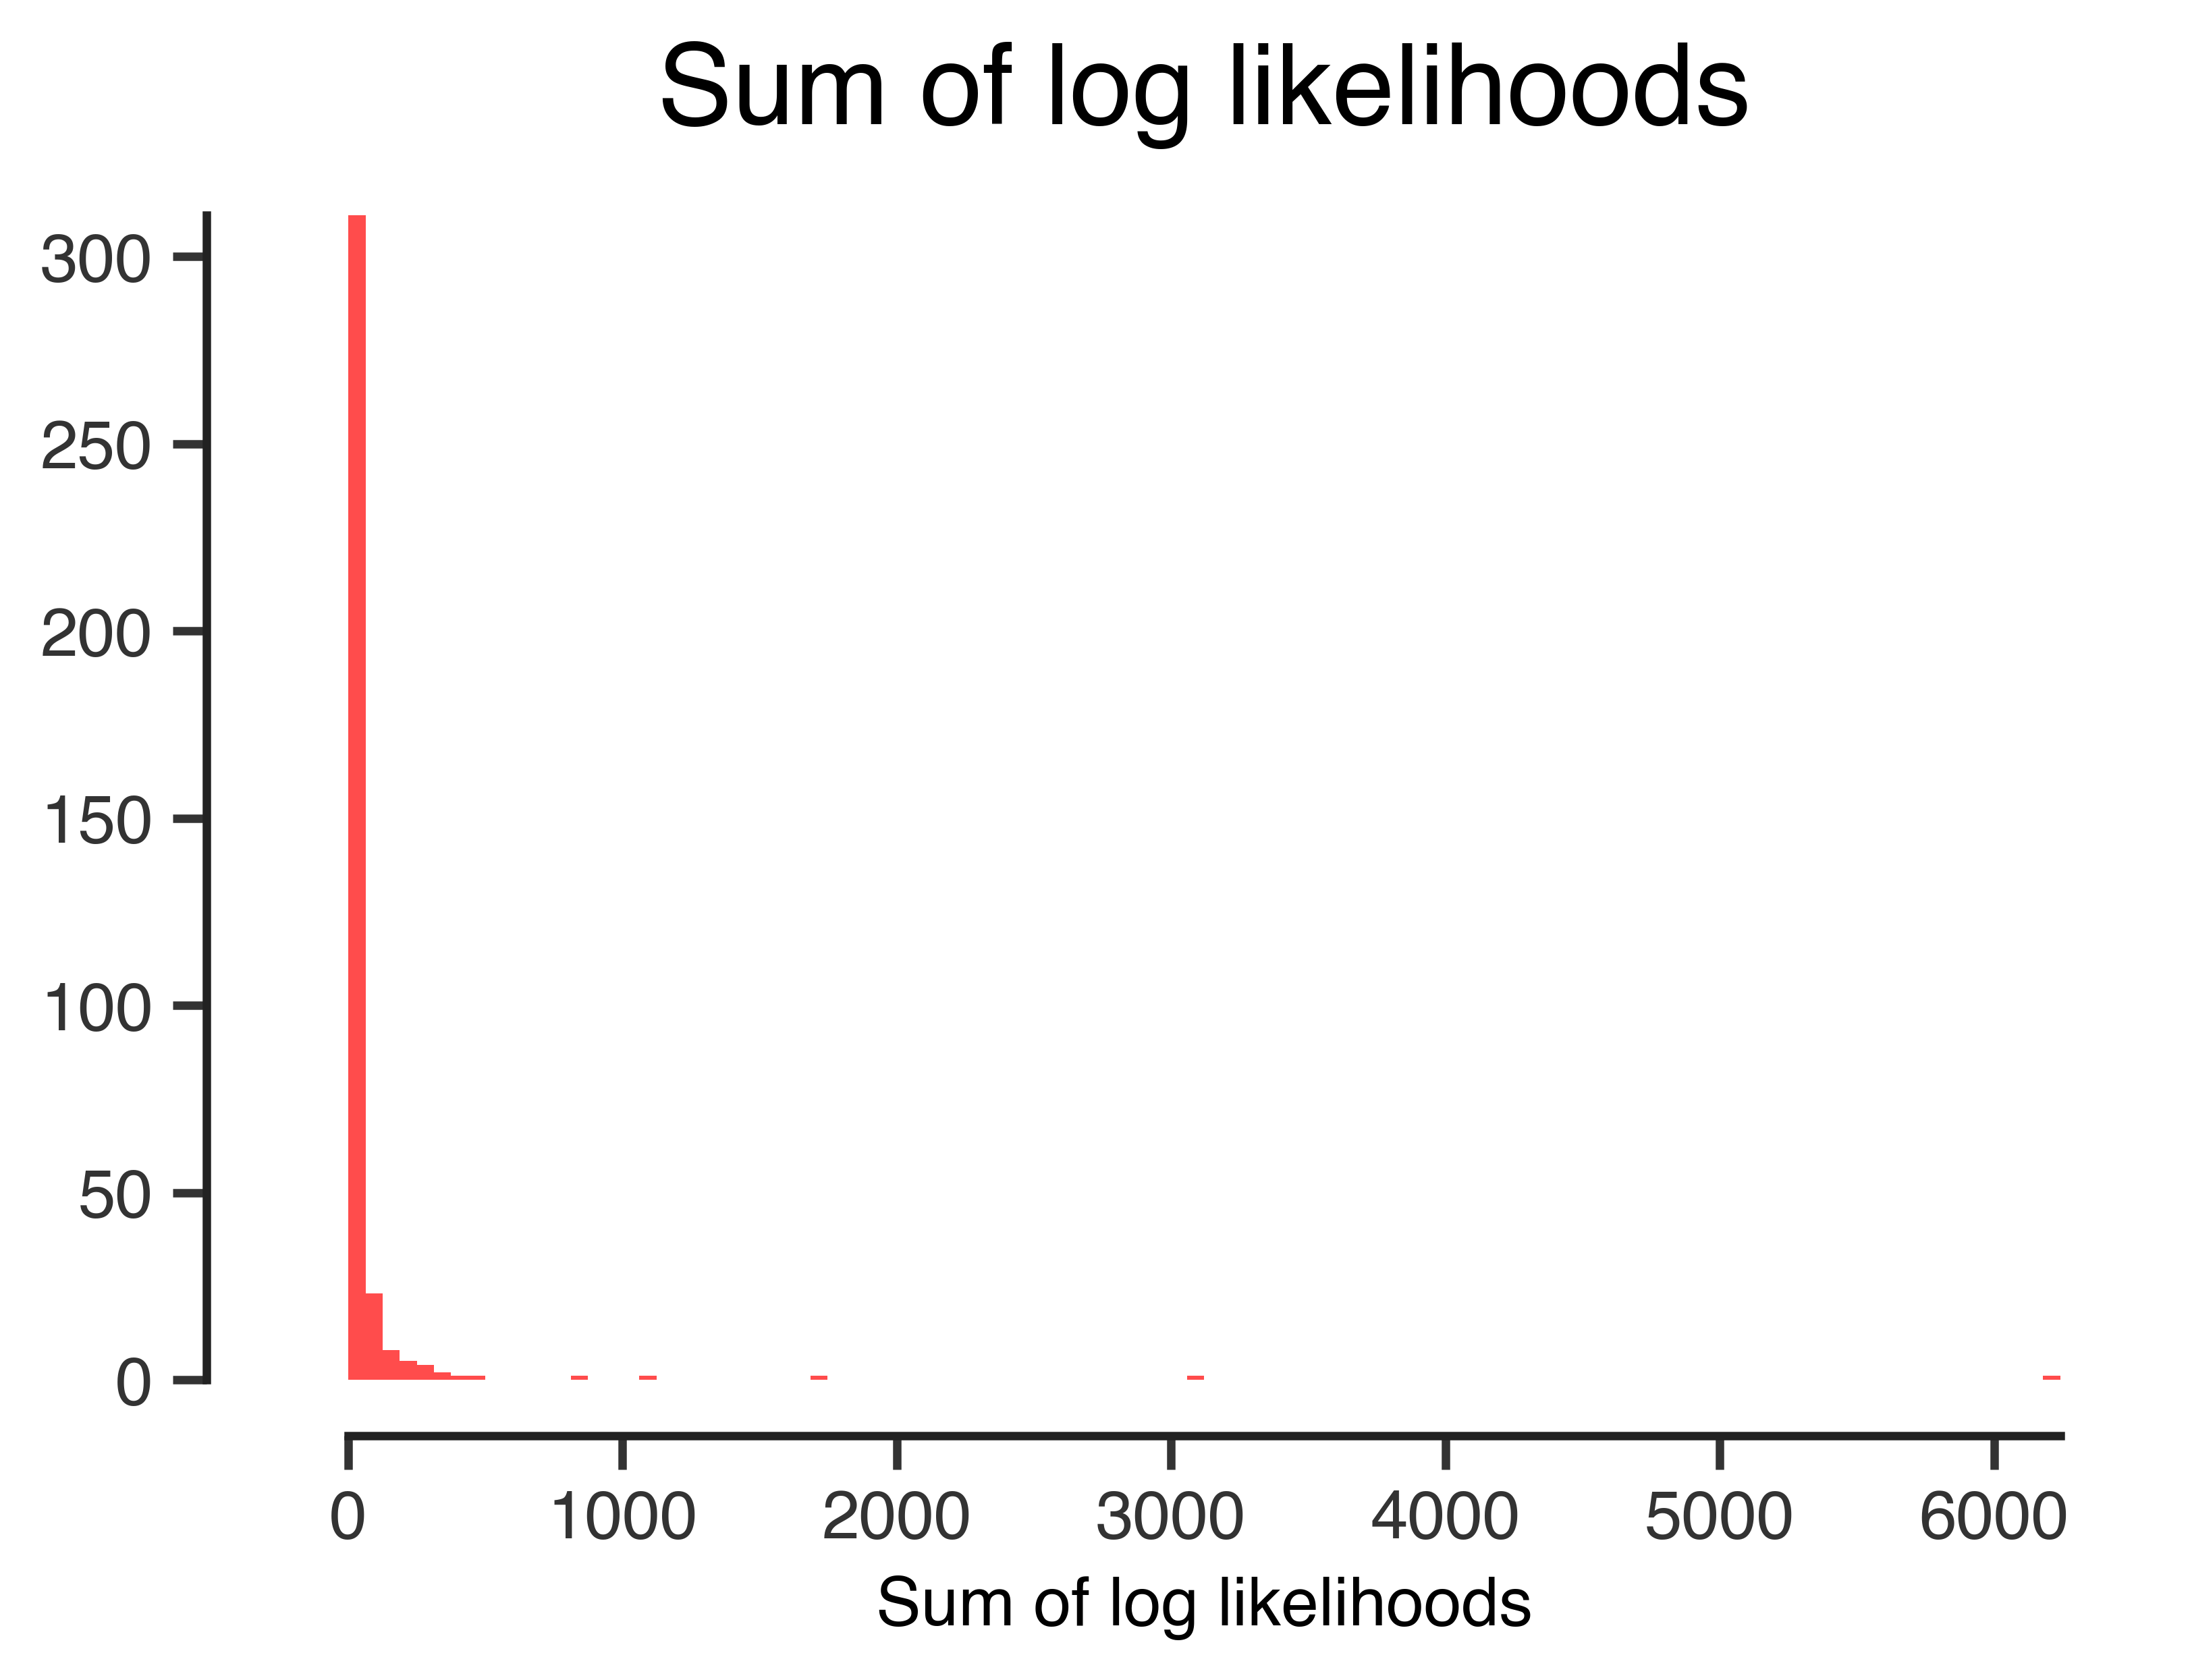

In [64]:
max_nlls = np.array([gamma_max_neg_ll[v] for v in variables if np.isfinite(gamma_max_neg_ll[v])]).flatten()
max_nlls = max_nlls[~np.isnan(max_nlls)]
# max_nlls = np.array([max_neg_ll[v] for v in variables]).flatten()


# bins = np.linspace(100,3000,100)
count, bins = np.histogram(max_nlls, bins=100)
bin_width = np.mean(np.diff(bins))

plt.bar(bins[:-1] + bin_width/2.0, count, width=bin_width, color='r', alpha=0.7)
# plt.xscale('log')
plotting.adjust_spines(plt.gca())
plt.title('Sum of log likelihoods')
plt.xlabel('Sum of log likelihoods')

In [65]:
least_likely_data = sorted(gamma_sum_neg_ll.items(), key=operator.itemgetter(1), reverse=True)
least_likely_data_max = sorted(gamma_max_neg_ll.items(), key=operator.itemgetter(1), reverse=True)

In [66]:
for i in range(10):
    print(least_likely_data[i])

('palmitoyl ethanolamide', inf)
('1-palmitoleoyl-GPC (16:1)*', inf)
('2-hydroxyoctanoate', inf)
('IL-1b', inf)
('IL-10', inf)
('gamma-glutamylglycine', inf)
('10-undecenoate (11:1n1)', inf)
('3-hydroxyoctanoate', inf)
('gamma-glutamyltyrosine', inf)
('daidzein', inf)


In [67]:
for i in range(10):
    print(least_likely_data_max[i])

('palmitoyl ethanolamide', inf)
('1-palmitoleoyl-GPC (16:1)*', inf)
('2-hydroxyoctanoate', inf)
('IL-1b', inf)
('IL-10', inf)
('gamma-glutamylglycine', inf)
('10-undecenoate (11:1n1)', inf)
('3-hydroxyoctanoate', inf)
('gamma-glutamyltyrosine', inf)
('daidzein', inf)


In [68]:
infinitely_unlikely = []
for variable_name, neg_ll in least_likely_data:
    if ~np.isfinite(gamma_sum_neg_ll[variable_name]):
        print(variable_name)
        infinitely_unlikely.append(variable_name)

palmitoyl ethanolamide
1-palmitoleoyl-GPC (16:1)*
2-hydroxyoctanoate
IL-1b
IL-10
gamma-glutamylglycine
10-undecenoate (11:1n1)
3-hydroxyoctanoate
gamma-glutamyltyrosine
daidzein
trimethylamine N-oxide
3-hydroxybutyrylcarnitine (2)
histidine
nicotinate ribonucleoside
stearoyl ethanolamide
2-oxoadipate
p-cresol sulfate
arachidoylcarnitine (C20)*
S-adenosylhomocysteine (SAH)
linolenate [alpha or gamma; (18:3n3 or 6)]
oleoyl ethanolamide
2-linoleoylglycerol (18:2)
carotene diol (1)
catechol sulfate
beta-muricholate
caproate (6:0)
N-formylmethionine
3-hydroxydecanoate
gamma-glutamyltryptophan
N-acetylaspartate (NAA)
daidzein sulfate (1)
1-oleoyl-2-arachidonoyl-GPI (18:1/20:4) *
3-methoxytyrosine
inosine
N1-Methyl-2-pyridone-5-carboxamide
palmitoyl sphingomyelin (d18:1/16:0)
homocitrulline
4-allylphenol sulfate
isoleucine
1-stearoyl-GPI (18:0)
dihomo-linolenoylcarnitine (20:3n3 or 6)*
1-palmitoyl-2-palmitoleoyl-GPC (16:0/16:1)*
palmitate (16:0)
nicotinamide
Erythrocyte-B
1-stearoyl-2-arachid

In [69]:
len(infinitely_unlikely)

274

## I realize why there are all these infinitely unlikely datasets - it's because the Gamma distribution is defined over an interval. If even one point lies outside of the interval defined for the control distribution, the support is zero.

In [73]:
gamma_sum_neg_ll = collections.defaultdict(list)
gamma_max_neg_ll = collections.defaultdict(list)
# fit gaussian to control data for each variable!
# but wait, we don't have to! we already normalized
# standard_normal = ss.norm(loc=0., scale=1.0)

for v in variables:
    these_vals = normalized_control[v]
    these_vals = these_vals[~np.isnan(these_vals)]
    this_gamma = ss.gamma.fit(these_vals)
    
    # remove nans
    experimental_vals = normalized_experimental[v]
    experimental_vals = experimental_vals[~np.isnan(experimental_vals)]
    
    # normalize experimental to have same support as normalized control
    support = np.max(these_vals) - np.min(these_vals)
    # make data go from 0 to v
    experimental_vals -= np.min(experimental_vals)
    # make data go from 0 to support
    experimental_vals *= support/np.max(experimental_vals)
    # make data go from min(control) to max(control)
    experimental_vals += np.min(these_vals)
    
    neg_logpdf = -ss.gamma.logpdf(experimental_vals, *this_gamma)
    gamma_sum_neg_ll[v] = np.sum(neg_logpdf)
    gamma_max_neg_ll[v] = np.max(neg_logpdf)

In [74]:
least_likely_data = sorted(gamma_sum_neg_ll.items(), key=operator.itemgetter(1), reverse=True)
least_likely_data_max = sorted(gamma_max_neg_ll.items(), key=operator.itemgetter(1), reverse=True)

In [76]:
for i in range(20):
    print(least_likely_data[i])

('N-palmitoyl-sphingosine (d18:1/16:0)', 360.72197813136592)
('g/d T Cells', 358.8204658942949)
('IFN-a', 348.07675306906702)
('2-hydroxybutyrate/2-hydroxyisobutyrate', 329.0245851193082)
('N-acetyl-3-methylhistidine*', 307.15012305666653)
('succinylcarnitine (C4-DC)', 291.30416926947026)
('pyruvate', 284.91806024749224)
('gamma-glutamylleucine', 284.84839335747404)
('pimeloylcarnitine/3-methyladipoylcarnitine (C7-DC)', 279.3606610547177)
('Erythrocyte-B', 277.81927215185755)
('palmitoyl dihydrosphingomyelin (d18:0/16:0)*', 273.16957749637282)
('gamma-glutamylglutamate', 273.15427362905336)
('3-(4-hydroxyphenyl)lactate', 271.9106718225346)
('mannitol/sorbitol', 271.53695305482609)
('glycerol 3-phosphate', 271.05875440350786)
('sphingomyelin (d18:1/14:0, d16:1/16:0)*', 269.44868629970773)
('sphingomyelin (d18:0/18:0, d19:0/17:0)*', 268.66626457418198)
('glycosyl-N-palmitoyl-sphingosine (d18:1/16:0)', 260.25780945096227)
('Erythrocyte-C', 256.71881579285184)
('N-acetylkynurenine (2)', 25

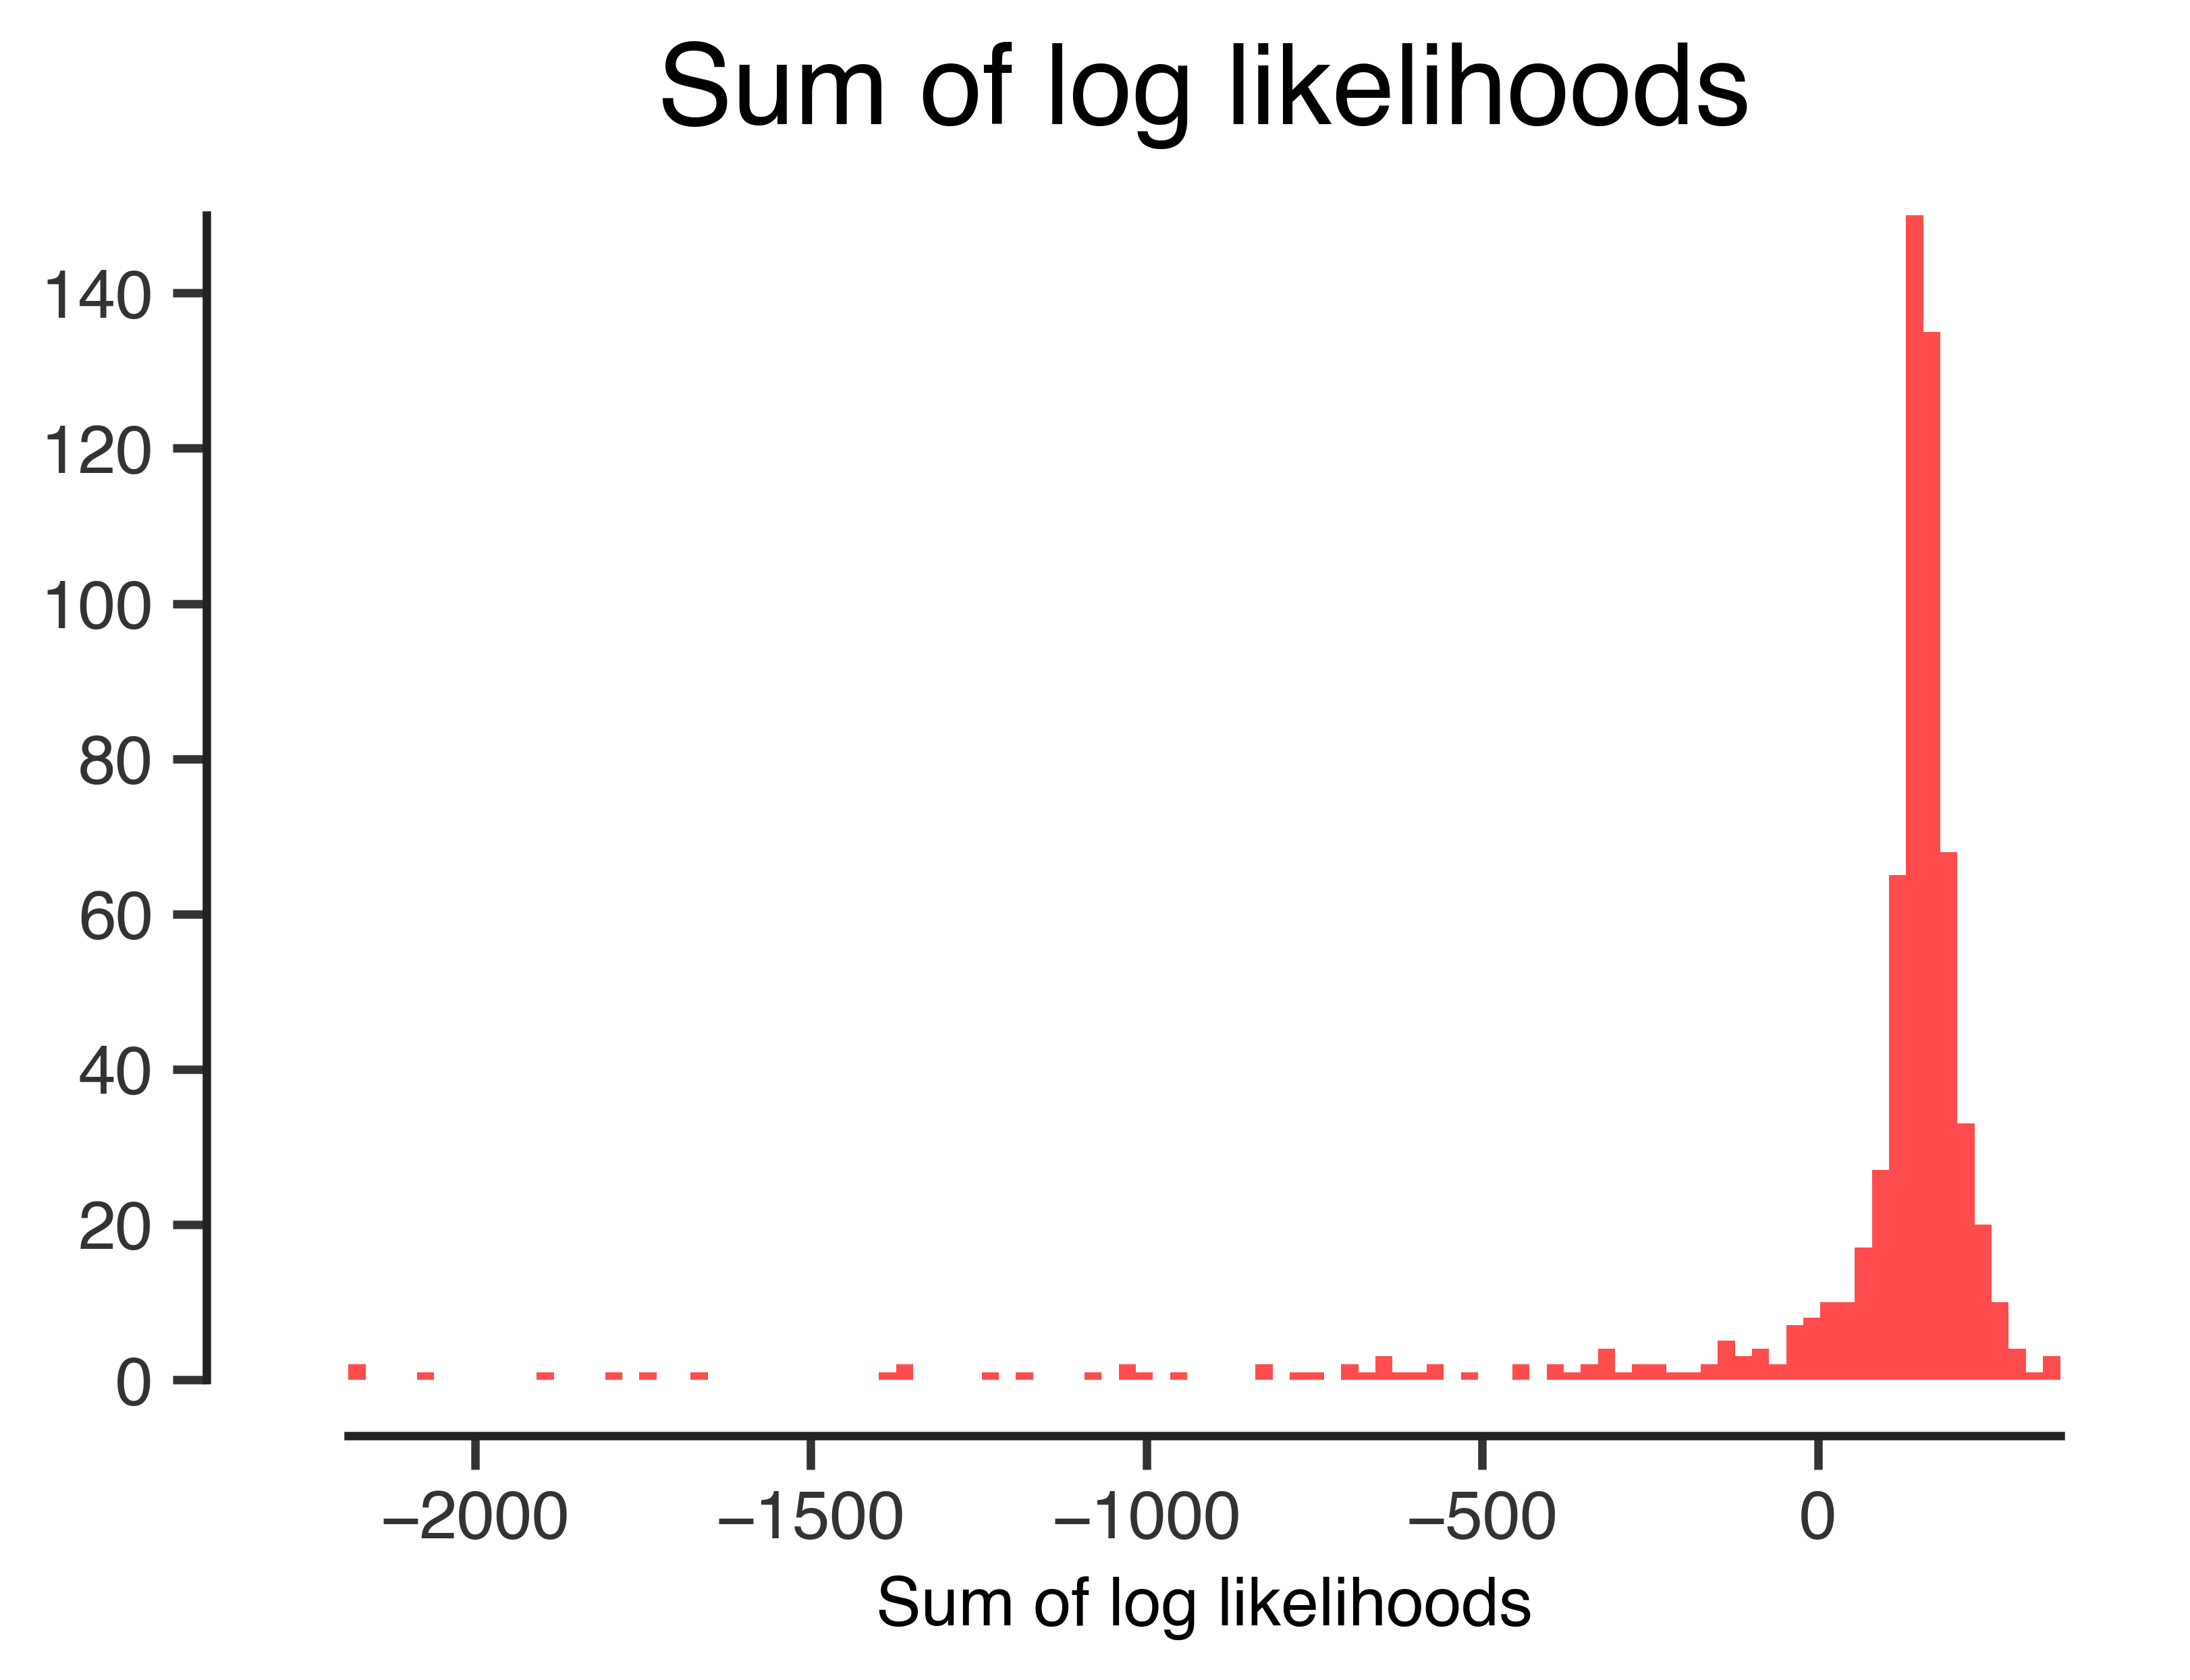

In [77]:
sum_nlls = np.array([gamma_sum_neg_ll[v] for v in variables if np.isfinite(gamma_sum_neg_ll[v])]).flatten()
sum_nlls = sum_nlls[~np.isnan(sum_nlls)]
# max_nlls = np.array([max_neg_ll[v] for v in variables]).flatten()


# bins = np.linspace(100,3000,100)
count, bins = np.histogram(sum_nlls, bins=100)
bin_width = np.mean(np.diff(bins))

plt.bar(bins[:-1] + bin_width/2.0, count, width=bin_width, color='r', alpha=0.7)
# plt.xscale('log')
plotting.adjust_spines(plt.gca())
plt.title('Sum of log likelihoods')
plt.xlabel('Sum of log likelihoods')

## Just all the way around this is the wrong way to fit Gamma distributions which have support $(0, \infty)$.

Make all variables go from 0 to some positive number

In [79]:
normalized_control = collections.defaultdict(list)
for v in variables:
    normalized_control[v] = (control_list[v] - np.nanmin(control_list[v]))/np.nanstd(control_list[v])
    normalized_control[v] = normalized_control[v][~np.isnan(normalized_control[v])]

In [80]:
normalized_experimental = collections.defaultdict(list)
for v in variables:
    normalized_experimental[v] = (experimental_list[v] - np.nanmin(experimental_list[v]))/np.nanstd(control_list[v])
    normalized_experimental[v] = normalized_experimental[v][~np.isnan(normalized_experimental[v])]

In [81]:
gamma_sum_neg_ll = collections.defaultdict(list)
gamma_max_neg_ll = collections.defaultdict(list)
# fit gaussian to control data for each variable!
# but wait, we don't have to! we already normalized
# standard_normal = ss.norm(loc=0., scale=1.0)

for v in variables:
    this_gamma = ss.gamma.fit(normalized_control[v])
    neg_logpdf = -ss.gamma.logpdf(normalized_experimental[v], *this_gamma)
    gamma_sum_neg_ll[v] = np.sum(neg_logpdf)
    gamma_max_neg_ll[v] = np.max(neg_logpdf)
    
least_likely_data = sorted(gamma_sum_neg_ll.items(), key=operator.itemgetter(1), reverse=True)
least_likely_data_max = sorted(gamma_max_neg_ll.items(), key=operator.itemgetter(1), reverse=True)

In [82]:
for i in range(10):
    print(least_likely_data[i])

('IL-3', 11880.046450996397)
('IL-12P70', 9384.2954702907628)
('itaconate', 9322.7082557015583)
('Erythrocyte-B', 9068.0033741757143)
('eicosenoylcarnitine (C20:1)*', 6642.539756919281)
('ALT', 4126.9474633767059)
('glycosyl-N-palmitoyl-sphingosine (d18:1/16:0)', 3620.8986099968392)
('orotate', 3483.0261566870031)
('g/d T Cells', 2994.0507133462474)
('1-linoleoylglycerol (18:2)', 2926.1754728850783)


In [84]:
with open('2017-03-25_Ranked_least_likely_gamma_distribution.csv', 'w') as csvfile:
    this_writer = csv.writer(csvfile, delimiter=',')
    for var_name, nllv in least_likely_data:
        this_writer.writerow([var_name, nllv])

In [85]:
with open('2017-03-25_Ranked_least_likely_gamma_distribution_max.csv', 'w') as csvfile:
    this_writer = csv.writer(csvfile, delimiter=',')
    for var_name, nllv in least_likely_data_max:
        this_writer.writerow([var_name, nllv])